# <font size='6px'><font color='#FF3206'>**Project Name**    - <font color='#3792cb'>Bike Demand Analyzer

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name -**            Ramanarayan Ransingh

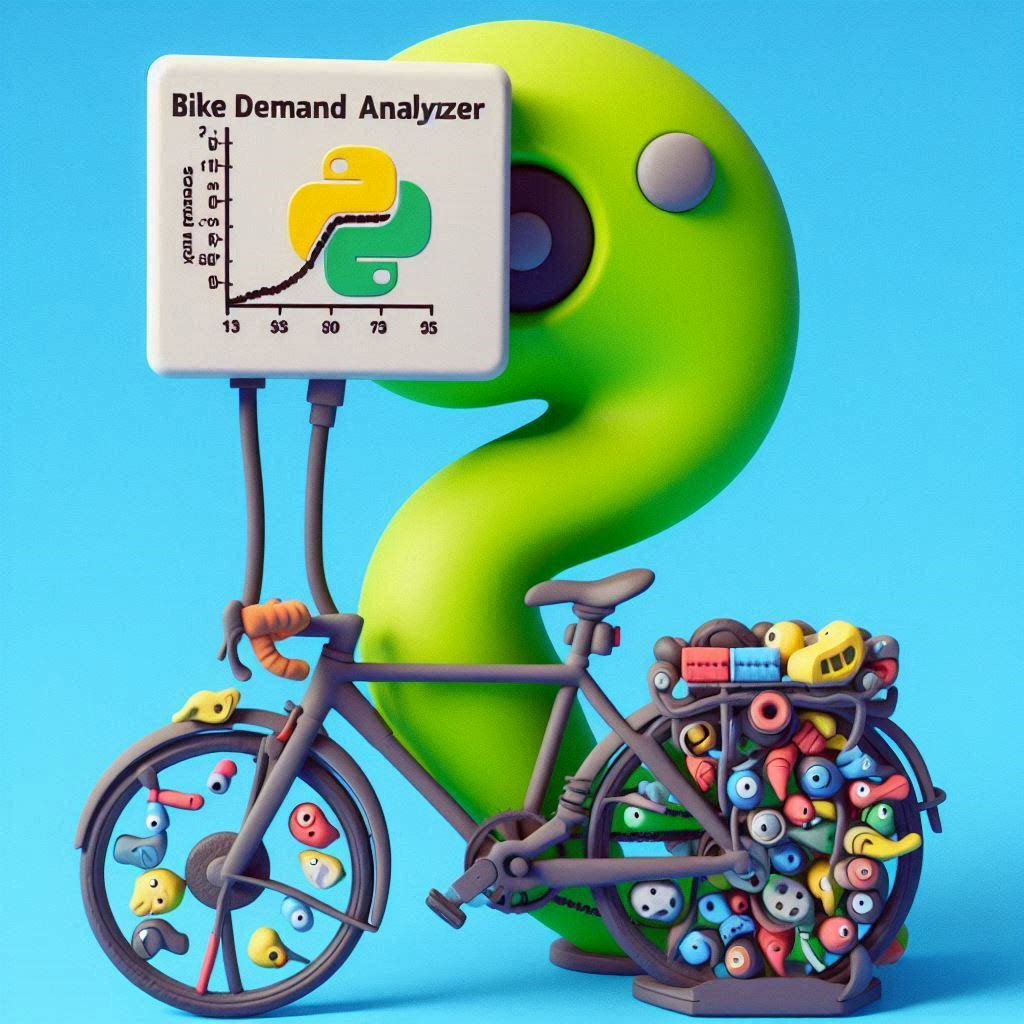

In [1]:
from IPython.display import Image, display

display(Image(filename='images\Designer.png', width=850))


# **Project Summary -**

# **Bike Demand Prediction using Machine Learning**

Accurately predicting bike rental demand is crucial for optimizing inventory and pricing strategies in bike-sharing companies. This project leverages **regression-based supervised machine learning** to forecast bike demand based on various factors.

### **Project Overview**
- **Dataset**: Utilized a rich dataset from a bike-sharing service, including rental counts, timestamps, weather conditions, seasonality, holidays, and operational status.
- **Data Preparation**: After thorough **preprocessing** and **data cleaning**, the dataset was split into **training** and **test sets** for model development.

### **Model Development**
- Experimented with several **model architectures** and fine-tuned **hyperparameters** to identify the most accurate model.
- **Evaluation Metrics**: The model's performance was assessed using **Mean Absolute Error (MAE)**, **Root Mean Squared Error (RMSE)**, and **R-squared (R²)**.
- Achieved an impressive **R² of 0.94** and a **MAE of just 2.04** on the test set, indicating highly accurate predictions.

### **Key Insights**
- Conducted **ablation studies** to pinpoint the most influential features.
- **Temperature** and weather/seasonal factors were identified as the primary drivers of bike rental demand.

This project demonstrates the effectiveness of machine learning in predicting bike rental demand and highlights the importance of key features in enhancing model performance.


# **Problem Statement**

## **Optimizing Urban Mobility with Rental Bike Demand Prediction**

Rental bikes are increasingly common in urban areas, enhancing mobility and reducing waiting times. Ensuring that rental bikes are available and accessible at the right time is crucial for maintaining a stable supply. The key challenge is accurately predicting the hourly bike count needed for a steady supply.

> **Objective**: Develop a highly accurate model with a low **Mean Absolute Error (MAE)** and a high **R-squared (R²)** value. The model will also uncover the key factors driving bike demand, enabling the bike-sharing company to make informed, data-driven decisions to optimize their operations.


# ***Let's Begin !***

## ***1. Know Your Data***

# **Loading Dataset and Importing Modules**

## Import Libraries

In [2]:
# Import Libraries

#data visualization libraries(matplotlib,seaborn, plotly)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

# Datetime library for manipulating Date columns.
from datetime import datetime
import datetime as dt


# from sci-kit library scaling, transforming and labeling functions are brought
# which is used to change raw feature vectors into a representation that is more
# suitable for the downstream estimators.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer


# Importing various machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')


### Load Data

In [3]:
data_path = r"resources\SeoulBikeData.csv"
bike_df = pd.read_csv(data_path,encoding="latin")
bike_df.shape

(8760, 14)

# **Understand More About The Data**

### Dataset First View

In [4]:
# Viewing the data of top 5 rows to take a glimps of the data
bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [5]:
# View the data of bottom 5 rows to take a glimps of the data
bike_df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(bike_df.shape)

(8760, 14)


In [7]:
#Getting all the columns
print("Features of the dataset:")
bike_df.columns

Features of the dataset:


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

## Dataset Information

In [8]:
#check details about the data set
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## Duplicate Values

In [9]:
# Checking for duplicate rows in the DataFrame
duplicate_count = bike_df.duplicated().sum()
total_rows = len(bike_df)

print(f"Total number of rows: {total_rows}")
print(f"Number of duplicate rows: {duplicate_count}")
print(f"Is the data duplicated? {'Yes' if duplicate_count > 0 else 'No'}")
print(f"Number of unique rows: {total_rows - duplicate_count}")


Total number of rows: 8760
Number of duplicate rows: 0
Is the data duplicated? No
Number of unique rows: 8760


### Check Unique Values for each variable.

In [10]:
# Check Unique Values for each variable.

# bike_df.nunique()
for i in bike_df.columns.tolist():
  print(f"No. of unique values in {i} is {bike_df[i].nunique()}.")

No. of unique values in Date is 365.
No. of unique values in Rented Bike Count is 2166.
No. of unique values in Hour is 24.
No. of unique values in Temperature(°C) is 546.
No. of unique values in Humidity(%) is 90.
No. of unique values in Wind speed (m/s) is 65.
No. of unique values in Visibility (10m) is 1789.
No. of unique values in Dew point temperature(°C) is 556.
No. of unique values in Solar Radiation (MJ/m2) is 345.
No. of unique values in Rainfall(mm) is 61.
No. of unique values in Snowfall (cm) is 51.
No. of unique values in Seasons is 4.
No. of unique values in Holiday is 2.
No. of unique values in Functioning Day is 2.


## Missing Values / Null values

In [11]:
# Missing Values/Null Values Count
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

## Visualizing the missing values

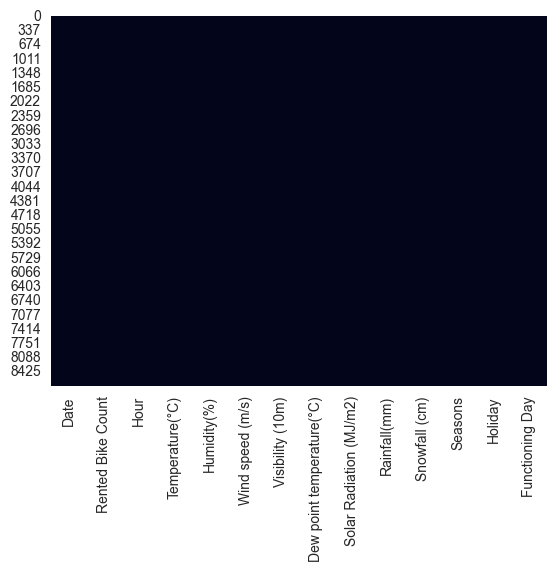

In [12]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap

sns.heatmap(bike_df.isnull(), cbar=False);

### What did you know about your dataset?

* There are 8760 observation and 14 features.
* In a day we have 24 hours and we have 365 days a year so 365 multiplied by 24 = 8760, which represents the number of line in the dataset
* There are no null values.
* Dataset has all unique values i.e., there is no duplicate, which means data is free from bias as duplicates which can cause problems in downstream analysis, such as biasing results or making it difficult to accurately summarize the data.
* Date has some object data types, it should be datetime data type.

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
print(f'Features: {bike_df.columns.to_list()}')

Features: ['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']


In [14]:
#Looking for the description of the dataset to get insights of the data
bike_df.describe().T

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

## Features description

**Breakdown of Our Features:**

**Date** : *The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str*, we need to convert into datetime format.

**Rented Bike Count** : *Number of rented bikes per hour which our dependent variable and we need to predict that, type : int*

**Hour**: *The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.*

**Temperature(°C)**: *Temperature in Celsius, type : Float*

**Humidity(%)**: *Humidity in the air in %, type : int*

**Wind speed (m/s)** : *Speed of the wind in m/s, type : Float*

**Visibility (10m)**: *Visibility in m, type : int*

**Dew point temperature(°C)**: *Temperature at the beggining of the day, type : Float*

**Solar Radiation (MJ/m2)**: *Sun contribution, type : Float*

**Rainfall(mm)**: *Amount of raining in mm, type : Float*

**Snowfall (cm)**: *Amount of snowing in cm, type : Float*

**Seasons**: *Season of the year, type : str, there are 4 season's in data we need to convert them into redable format*.

**Holiday**: *If the day  is holiday period or not, type: str*

**Functioning Day**: *If the day is a Functioning Day or not, type : str*


# **Preprocessing the dataset**

**Why do we need to handle missing values?**
* ***The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first***

#### Missing Values/Null Values

In [15]:
# Missing Values/Null Values Count
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

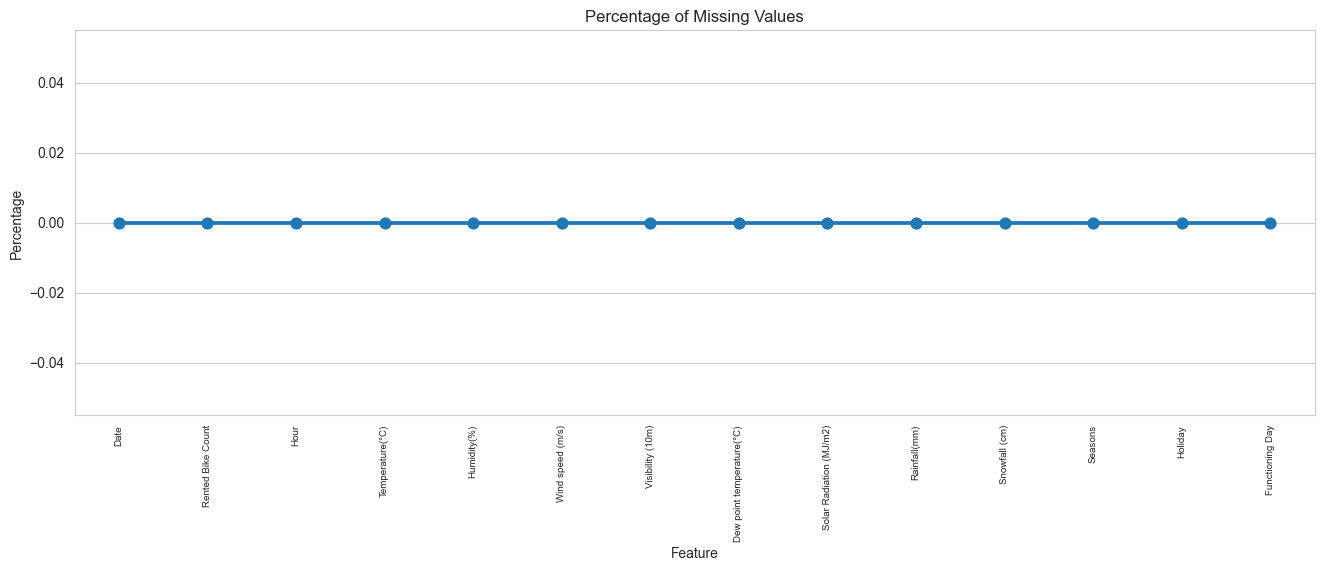

In [16]:
# Visualizing the missing values
# Calculate the percentage of missing values
missing = pd.DataFrame((bike_df.isnull().sum() * 100) / bike_df.shape[0]).reset_index()
missing.columns = ['Feature', 'Percentage']  # Rename columns for clarity

# Plotting
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='Feature', y='Percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.show()

* ***As we can see above there are no missing value presents thankfully***

## Duplicate values

**Why is it important to remove duplicate records from my data?**
* **"Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. By removing duplication in our data set,  Time and money are saved by not sending identical communications multiple times to the same person.**

In [17]:
# Checking Duplicate Values
value=len(bike_df[bike_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


* ***In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.***

* ***Some of  the columns name in the dataset are too large and clumsy so we change them into some simple name, and it don't affect our end results.***

## Changing column name

In [18]:
#Rename the complex columns name
bike_df=bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

* ***Python read "Date" column as a object type basically it reads as a string, as the date column is very important to analyze the users behaviour so we need to convert it into datetime format then we split it into 3 column i.e 'year', 'month', 'day'as a category data type.***


## Breaking date column

In [19]:
# Changing the "Date" column into three "year","month","day" column
bike_df['Date'] = bike_df['Date'].str.replace('-', '/')
bike_df['Date'] = bike_df['Date'].apply(lambda x: dt.datetime.strptime(x, "%d/%m/%Y"))

In [20]:
bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()

In [21]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
bike_df['weekdays_weekend']=bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','day','year'],axis=1)

* ***So we convert the "date" column into 3 different column i.e "year","month","day".***
* ***The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november so if i consider this is a one year then we don't need the "year" column so we drop it***.
* ***The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column***.

In [22]:
bike_df.head()

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_Day  month  weekdays_weekend  
0  No Holiday             Yes     12                 0  
1  No Holiday             Yes     12                 0  
2  No Holiday             Yes     12                 0  
3  No Holiday             Yes     12                 0  
4  No Holiday             Yes     12                 0

In [23]:
bike_df['weekdays_weekend'].value_counts()

weekdays_weekend
0    6264
1    2496
Name: count, dtype: int64

## Changing data type

In [24]:
#Change the int64 column into catagory column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  bike_df[col]=bike_df[col].astype('category')

In [25]:
#let's check the result of data type
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

In [26]:
bike_df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

## ***4. Data Visualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# **Exploratory Data Analysis Of The Data Set**

**Why do we perform EDA?**
* ***An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.***

## **Univariate Analysis**

**Why do you do univariate analysis?**
* ***The key objective of Univariate analysis is to simply describe the data to find patterns within the data.***

## **Analysis of Dependent Variable:**

**What is a dependent variable in data analysis?**
* ***we analyse our dependent variable,A dependent variable is a variable whose value will change depending on the value of another variable.***

## **Analysation of categorical variables**

* ***Our dependent variable is "Rented Bike Count" so we need to analysis this column with the other columns by using some visualisation plot.first we analyze the category data type then we proceed with the numerical data type***

#### Month

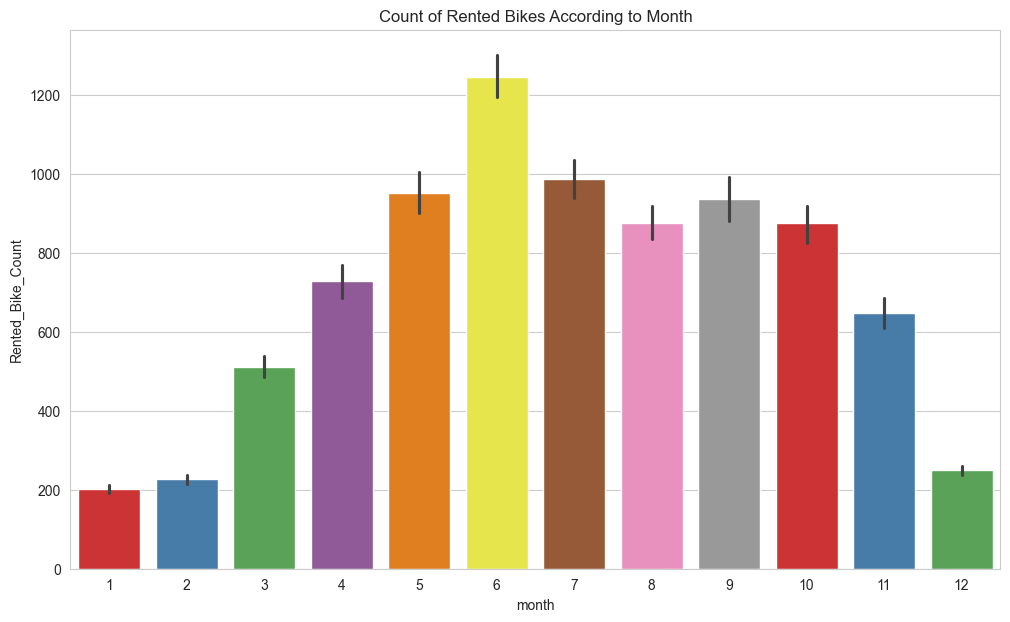

In [27]:
#anlysis of data by vizualisation

fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(data=bike_df, x='month', y='Rented_Bike_Count', ax=ax, palette='Set1')
ax.set(title='Count of Rented Bikes According to Month')
plt.show()

* ***From the above bar plot we can clearly say that, from the month 5 to 10
 (May - October) the demand of the rented bike is high as compare to other months.These months came inside the summer season.***

#### weekdays_weekend

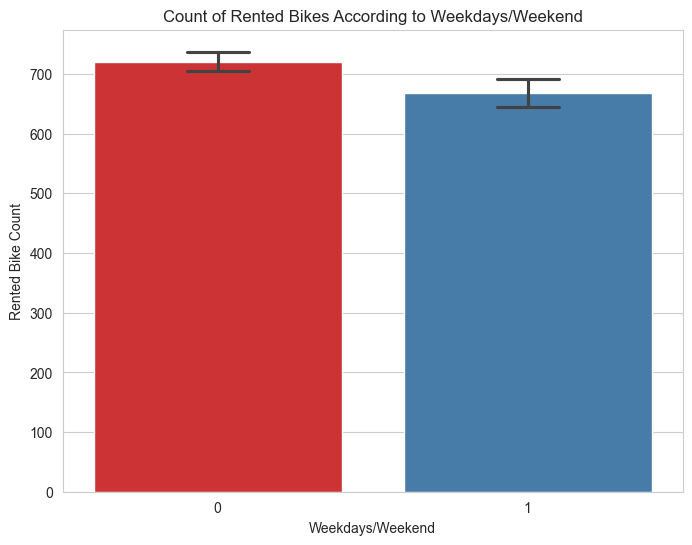

In [28]:
#anlysis of data by vizualisation

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=bike_df, x='weekdays_weekend', y='Rented_Bike_Count', ax=ax, palette='Set1', capsize=0.2)

# Set title and labels
ax.set(title='Count of Rented Bikes According to Weekdays/Weekend', xlabel='Weekdays/Weekend', ylabel='Rented Bike Count')

plt.show()

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

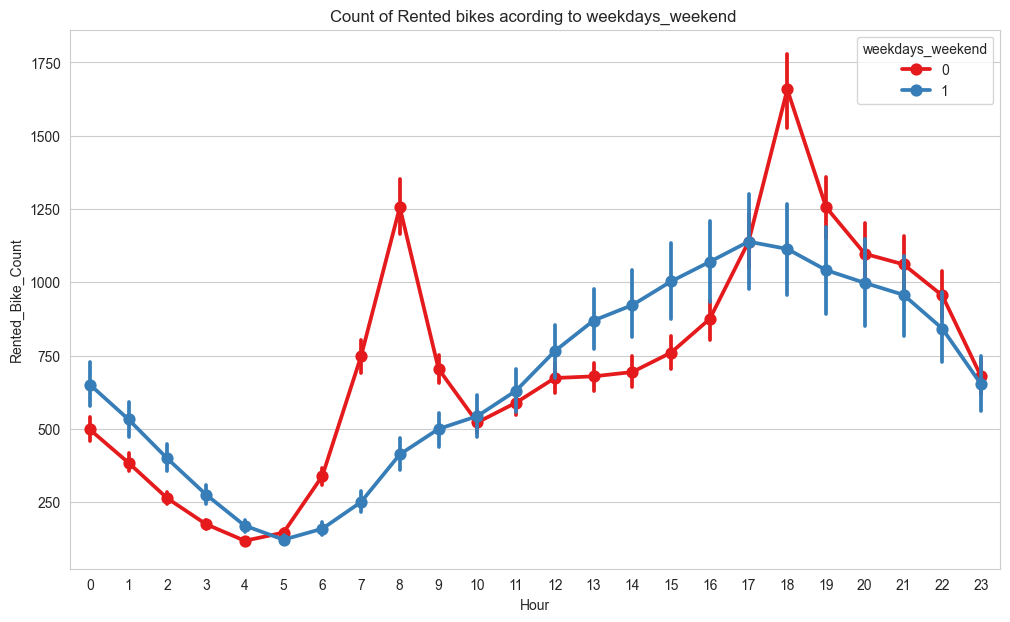

In [29]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,7))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='weekdays_weekend',ax=ax,palette='Set1')
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

* ***From the above point plot and bar plot we can say that, in the week days which represent in red colur show that the demand of the bike higher because of the office.***
***Peak Time are 7 am to 9 am and 5 pm to 7 pm***
***The orange colur represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases.***   

#### Hour 

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

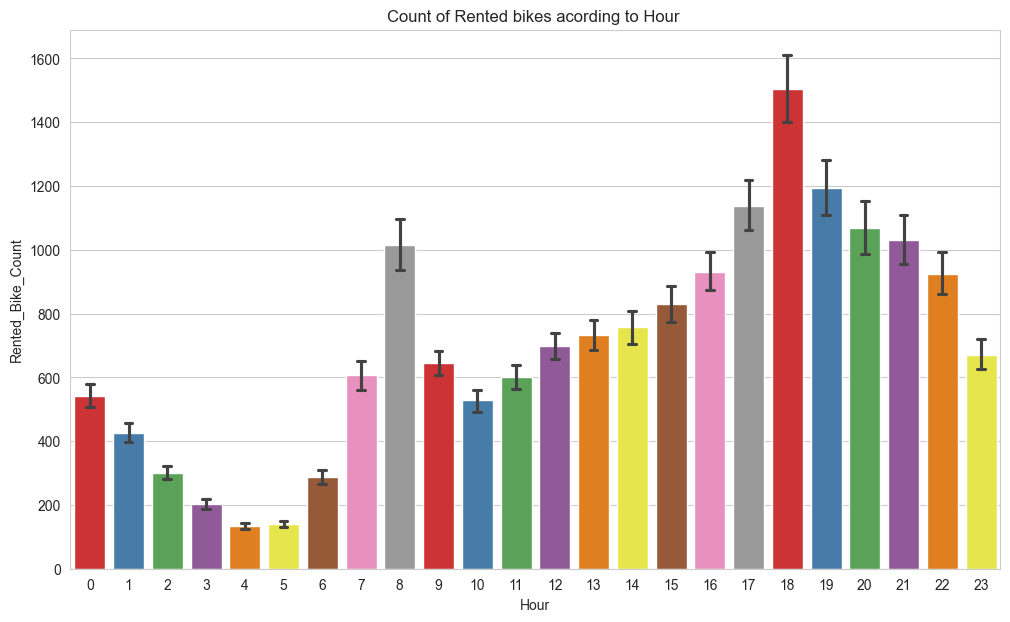

In [30]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,7))
sns.barplot(data=bike_df,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2,palette='Set1')
ax.set(title='Count of Rented bikes acording to Hour ')

* ***In the above plot which shows, the use of rented bike according the hours and the data are from all over the year.***

* ***generally people use rented bikes during their working hour from 7am to 9am and 5pm to 7pm.***   

#### Functioning Day

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

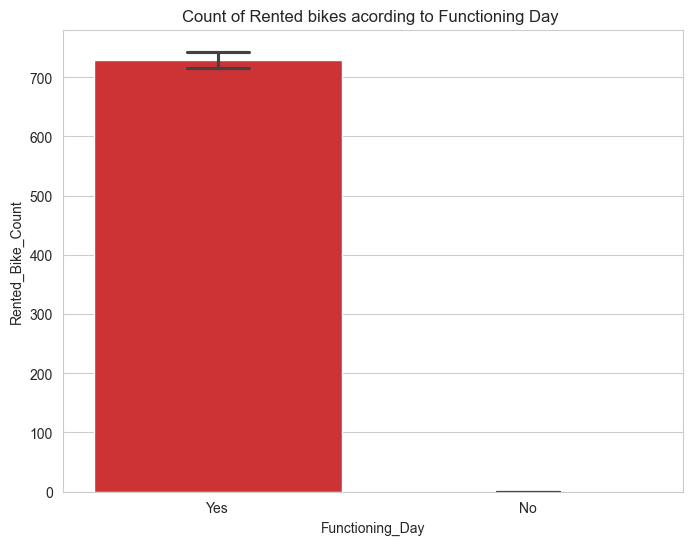

In [31]:
#anlysis of data by vizualisation

fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=bike_df,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2,palette='Set1')
ax.set(title='Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

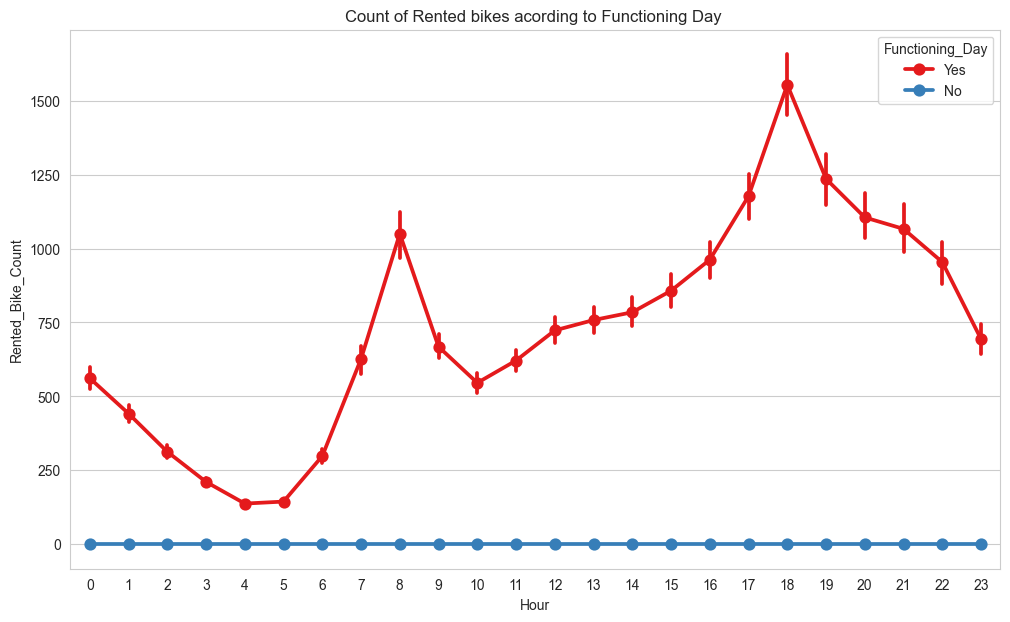

In [32]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,7))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day',ax=ax,palette='Set1')
ax.set(title='Count of Rented bikes acording to Functioning Day ')

* ***In the above bar plot and point plot which shows the use of rented bike in functioning day or non functioning day, and it clearly shows that,***
* ***Peoples don't use reneted bikes in no functioning day.***

#### Seasons

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

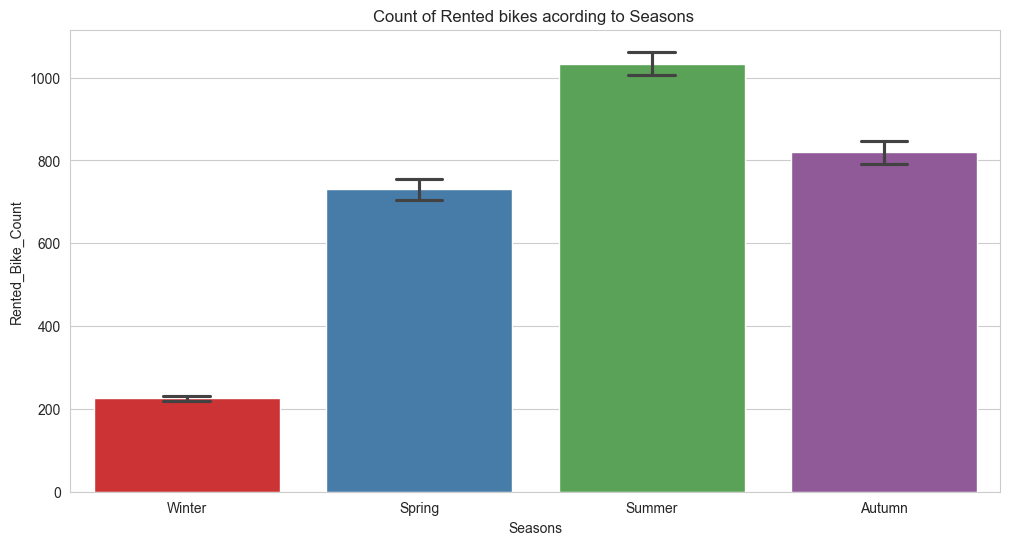

In [33]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(data=bike_df,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2,palette='Set1')
ax.set(title='Count of Rented bikes acording to Seasons ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

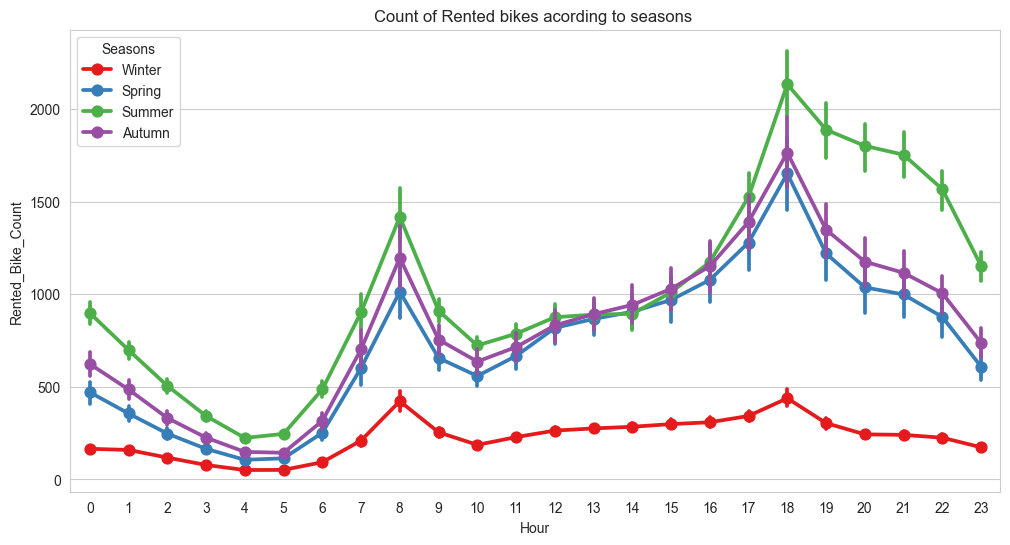

In [34]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,6))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax,palette='Set1')
ax.set(title='Count of Rented bikes acording to seasons ')

* ***In the above bar plot and point plot which shows, the use of rented bike in four different seasons, and it clearly shows that,***
* ***In summer season the use of rented bike is high and peak time is 7am-9am and 5pm-7pm.***
* ***In winter season the use of rented bike is very low maybe because of snowfall, fog, cold etc.***

#### Holiday

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

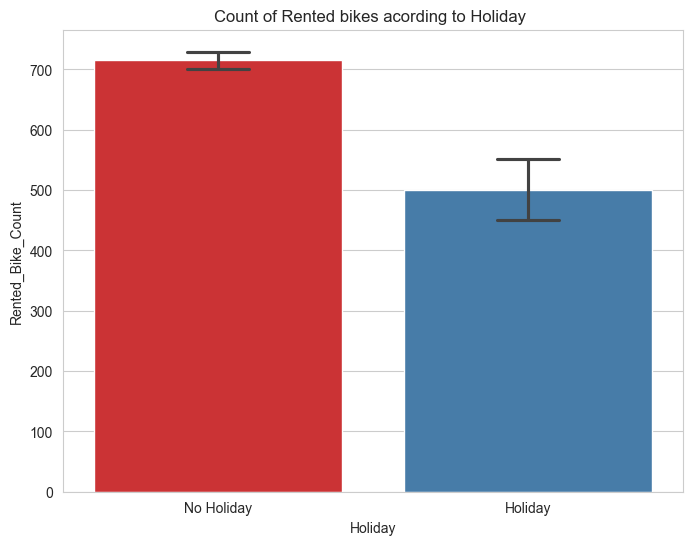

In [35]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=bike_df,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2,palette='Set1')
ax.set(title='Count of Rented bikes acording to Holiday ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

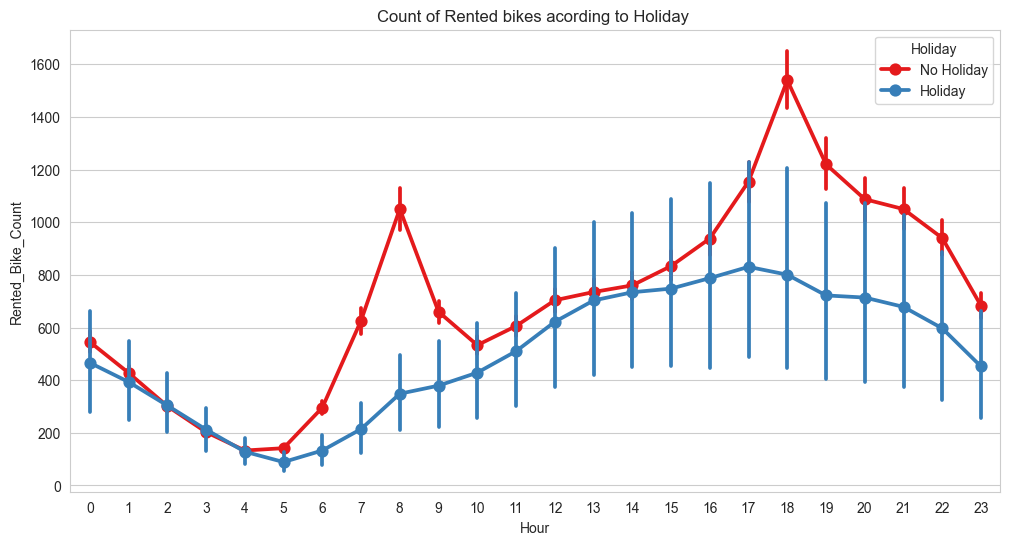

In [36]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,6))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Holiday',ax=ax,palette='Set1')
ax.set(title='Count of Rented bikes acording to Holiday ')

* ***In the above bar plot and point plot which shows the use of rented bike in a holiday, and it clearly shows that,***
* ***In holiday, people uses the rented bike from 2pm-8pm***

## **Analyze of Numerical variables**

**What is Numerical Data**

* ***Numerical data is a data type expressed in numbers, rather than natural language description. Sometimes called quantitative data, numerical data is always collected in number form. Numerical data differentiates itself from other number form data types with its ability to carry out arithmetic operations with these numbers.***

## <b> Pays little attention to the skewness of our numerical features

In [37]:
# separate numerical features from the dataframe
numeric_features= bike_df.select_dtypes(exclude=['object','category'])
numeric_features

Rented_Bike_Count  Temperature  Humidity  Wind_speed  Visibility  \
0                   254         -5.2        37         2.2        2000   
1                   204         -5.5        38         0.8        2000   
2                   173         -6.0        39         1.0        2000   
3                   107         -6.2        40         0.9        2000   
4                    78         -6.0        36         2.3        2000   
...                 ...          ...       ...         ...         ...   
8755               1003          4.2        34         2.6        1894   
8756                764          3.4        37         2.3        2000   
8757                694          2.6        39         0.3        1968   
8758                712          2.1        41         1.0        1859   
8759                584          1.9        43         1.3        1909   

      Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  
0                     -17.6              0.0       0.0       0.0  
1                     -17.6              0.0       0.0       0.0  
2                     -17.7              0.0       0.0       0.0  
3                     -17.6              0.0       0.0       0.0  
4                     -18.6              0.0       0.0       0.0  
...                     ...              ...       ...       ...  
8755                  -10.3              0.0       0.0       0.0  
8756                   -9.9              0.0       0.0       0.0  
8757                   -9.9              0.0       0.0       0.0  
8758                   -9.8              0.0       0.0       0.0  
8759                   -9.3              0.0       0.0       0.0  

[8760 rows x 9 columns]

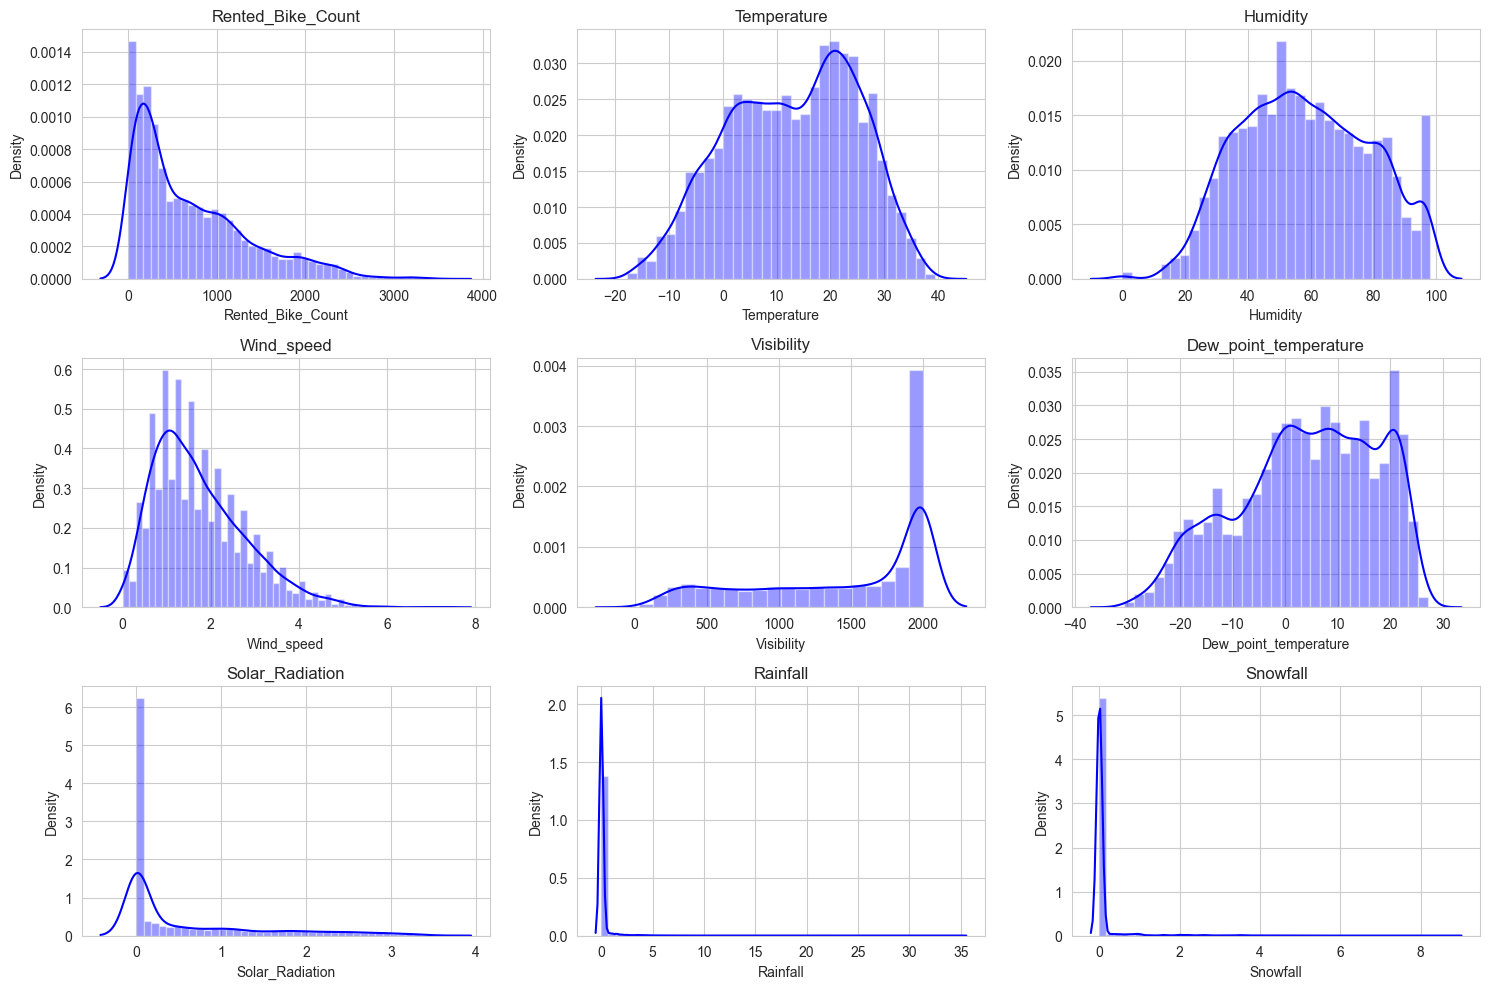

In [38]:
# printing displots to analyze the distribution of all numerical features

n=1
plt.figure(figsize=(15,10))
for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.distplot(bike_df[i],color='blue')
  plt.title(i)
  plt.tight_layout()

## Right skewed columns are
Rented Bike Count (Its also our Dependent variable),
Wind speed (m/s),
Solar Radiation (MJ/m2),
Rainfall(mm),
Snowfall (cm),

## Left skewed columns are
Visibility (10m),
Dew point temperature(°C)

## <b> Lets try to find how is the relation of numerical features with our dependent variable

## Numerical VS Rented Bike Count

### Temperature

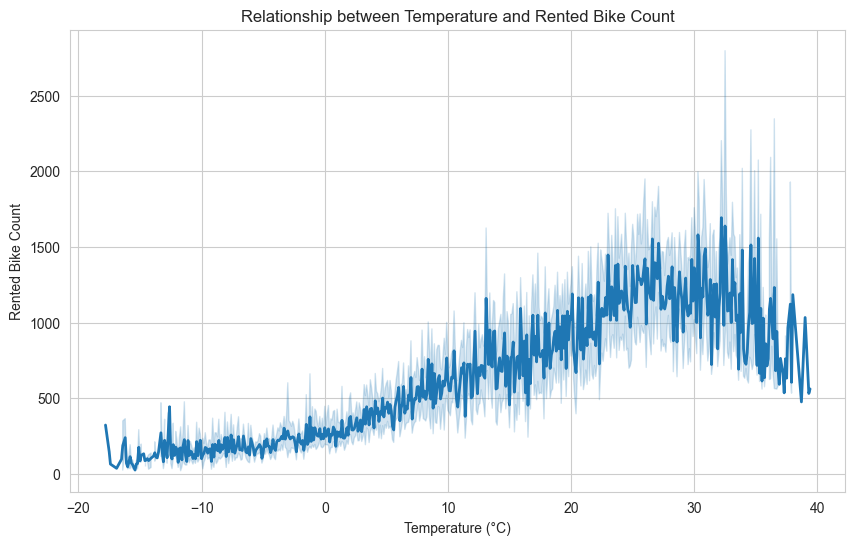

In [39]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature"

plt.figure(figsize=(10, 6))
sns.lineplot(x='Temperature', y='Rented_Bike_Count', data=bike_df, linewidth=2)
plt.title('Relationship between Temperature and Rented Bike Count')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')

plt.show()


* ***From the above plot we see that, people like to ride bikes when it is hot around 25°C in average***

### Dew Point Temperature

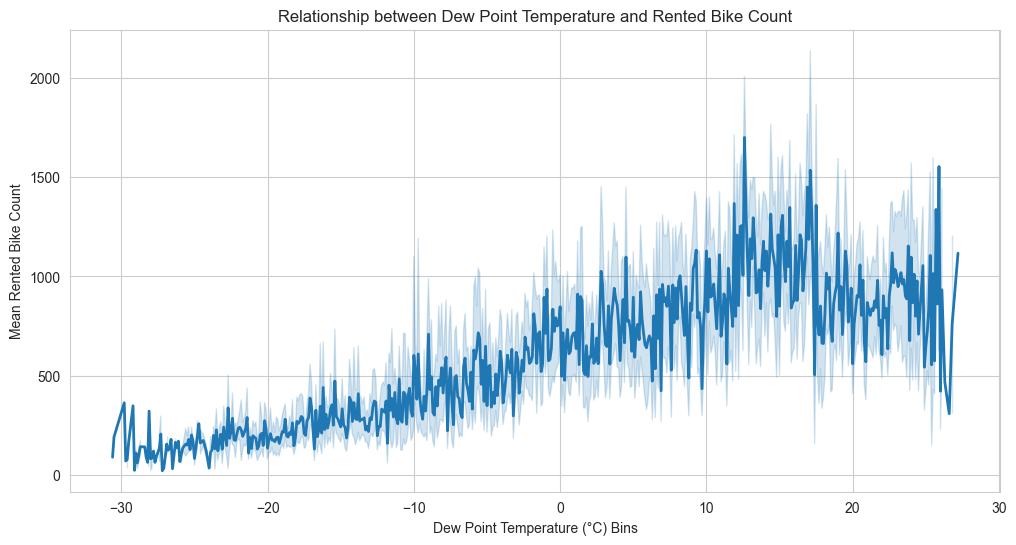

In [40]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Dew_point_temperature"

# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Dew_point_temperature', y='Rented_Bike_Count', data=bike_df, linewidth=2)
plt.title('Relationship between Dew Point Temperature and Rented Bike Count')
plt.xlabel('Dew Point Temperature (°C) Bins')
plt.ylabel('Mean Rented Bike Count')

plt.show()

* ***From the above plot of "Dew_point_temperature', is almost same as the 'temperature' there is some similarity present we can check it in our next step.***

### Solar Radiation

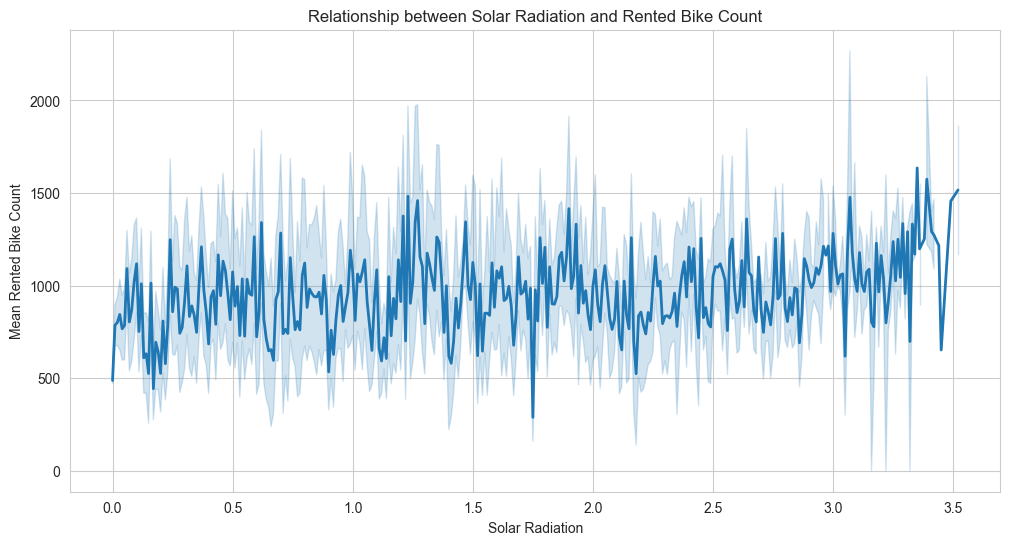

In [41]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation"

plt.figure(figsize=(12, 6))
sns.lineplot(x='Solar_Radiation', y='Rented_Bike_Count', data=bike_df, linewidth=2)
plt.title('Relationship between Solar Radiation and Rented Bike Count')
plt.xlabel('Solar Radiation')
plt.ylabel('Mean Rented Bike Count')

plt.show()

* ***from the above plot we see that, the amount of rented bikes is huge, when there is solar radiation, the count of rents is around 1000***

### Snow Fall

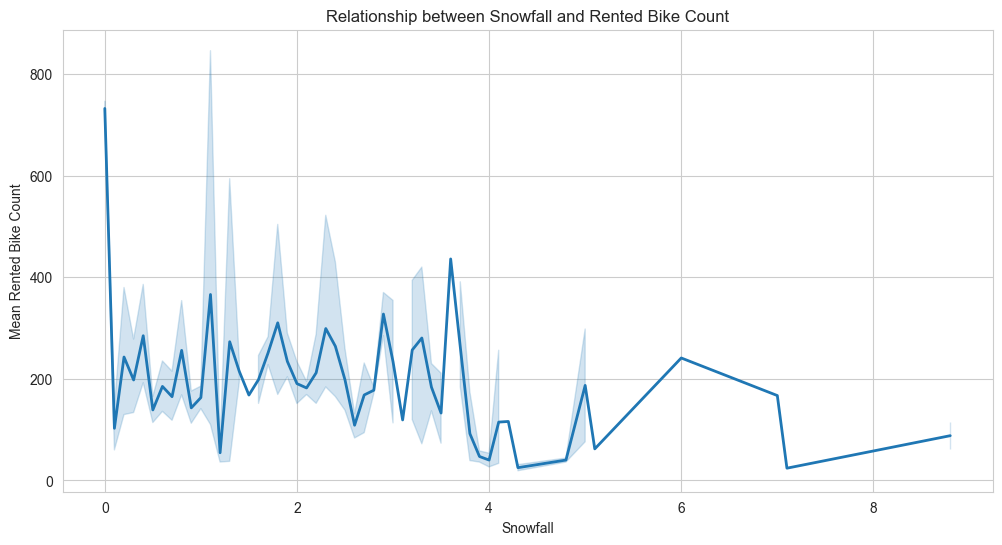

In [42]:
# Group by Snowfall and calculate the mean Rented_Bike_Count

plt.figure(figsize=(12, 6))
sns.lineplot(x='Snowfall', y='Rented_Bike_Count', data=bike_df, linewidth=2)
plt.title('Relationship between Snowfall and Rented Bike Count')
plt.xlabel('Snowfall')
plt.ylabel('Mean Rented Bike Count')

plt.show()


* ***We can see from the plot that, on the y-axis, the amount of rented bike is very low. When we have more than 4 cm of snow, the bike rents is much lower***

### Rain Fall

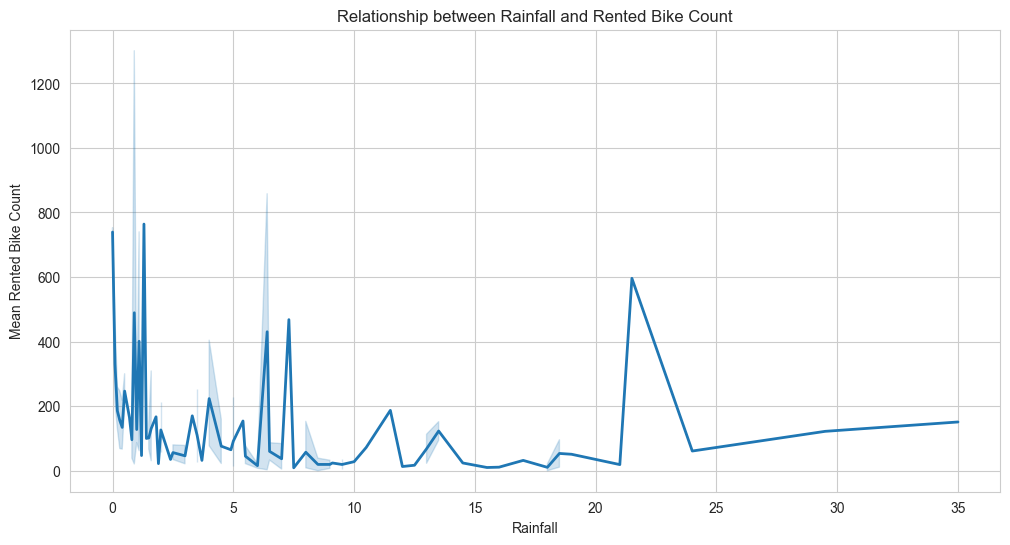

In [43]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall"

plt.figure(figsize=(12, 6))
sns.lineplot(x='Rainfall', y='Rented_Bike_Count', data=bike_df, linewidth=2)
plt.title('Relationship between Rainfall and Rented Bike Count')
plt.xlabel('Rainfall')
plt.ylabel('Mean Rented Bike Count')

plt.show()

* ***We can see from the above plot that, even if it rains a lot the demand of of rent bikes is not decreasing, here for example even if we have 20 mm of rain there is a big peak of rented bikes***

### Wind Speed

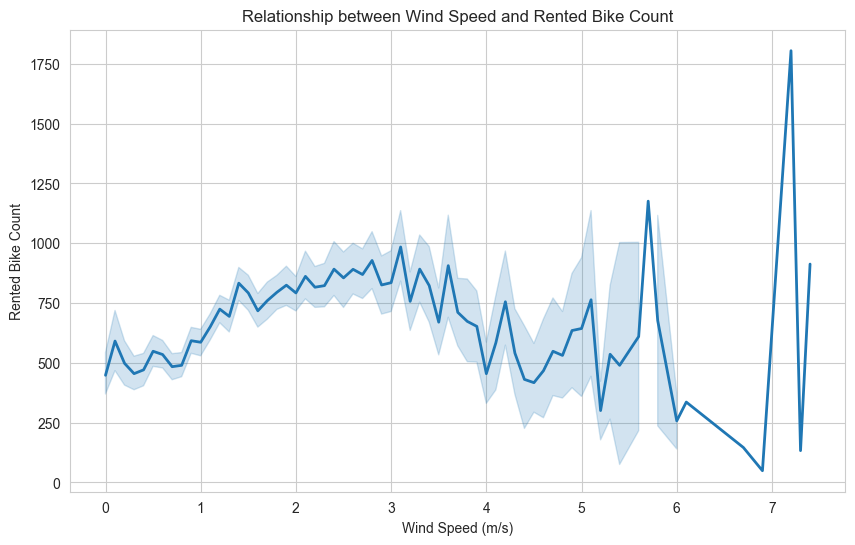

In [44]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Wind_speed"

plt.figure(figsize=(10, 6))
sns.lineplot(x='Wind_speed', y='Rented_Bike_Count', data=bike_df, linewidth=2)
plt.title('Relationship between Wind Speed and Rented Bike Count')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

* ***We can see from the above plot that, the demand of rented bike is uniformly distribute despite of wind speed but when the speed of wind is 7 m/s then the demand of bike also increase that clearly means people love to ride bikes when its little windy.***

### **REGRESSION PLOT**

* ***The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.***

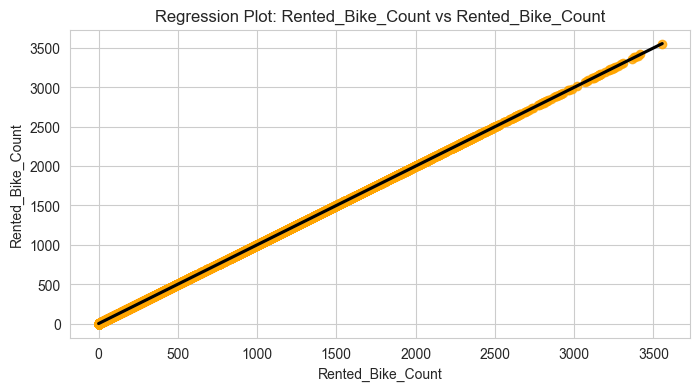

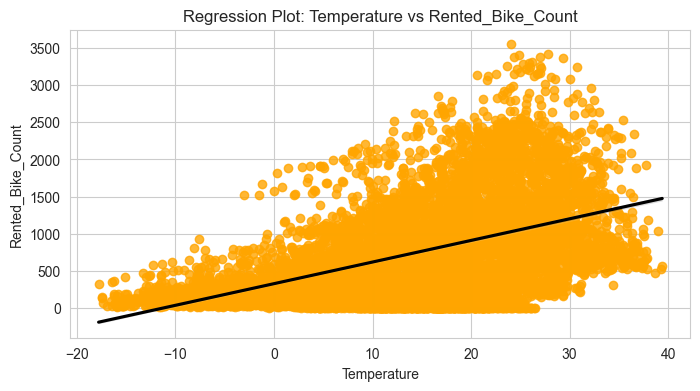

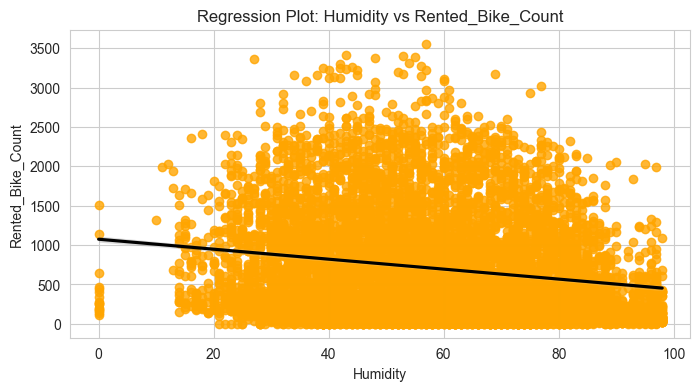

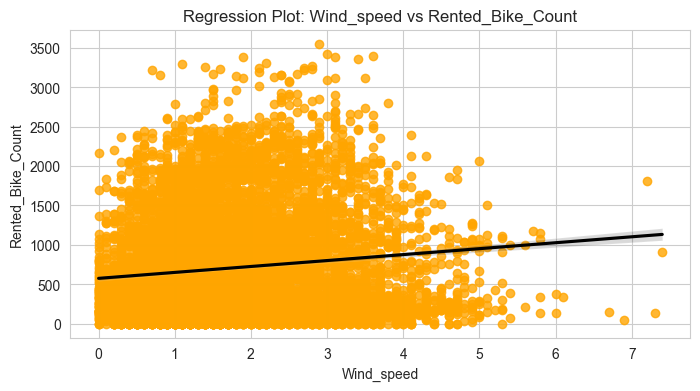

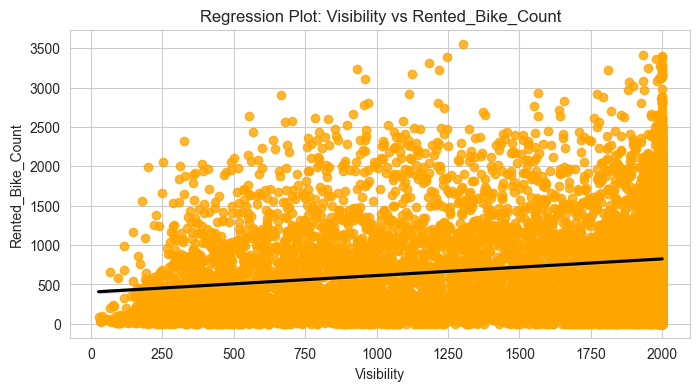

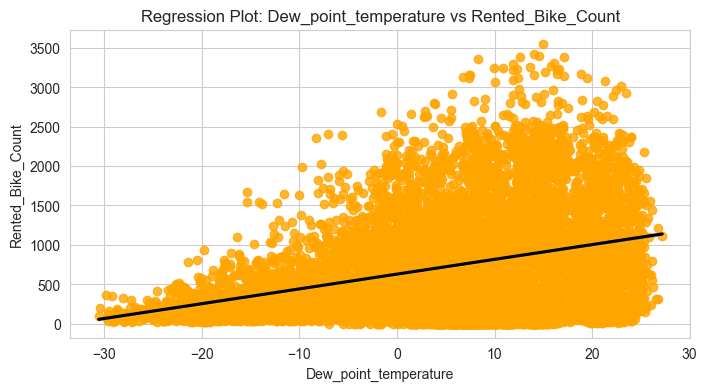

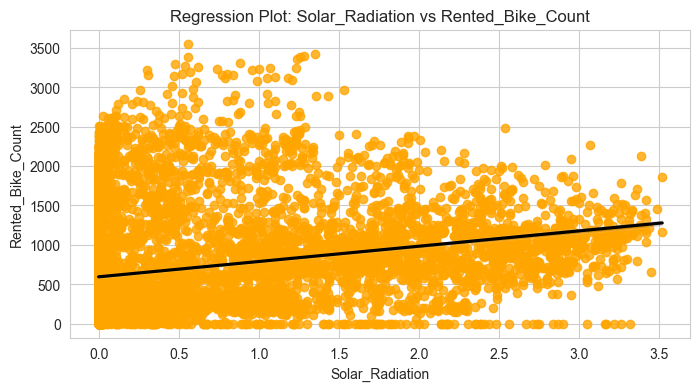

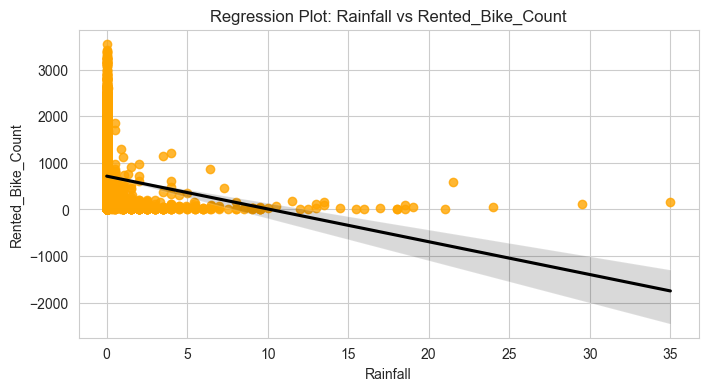

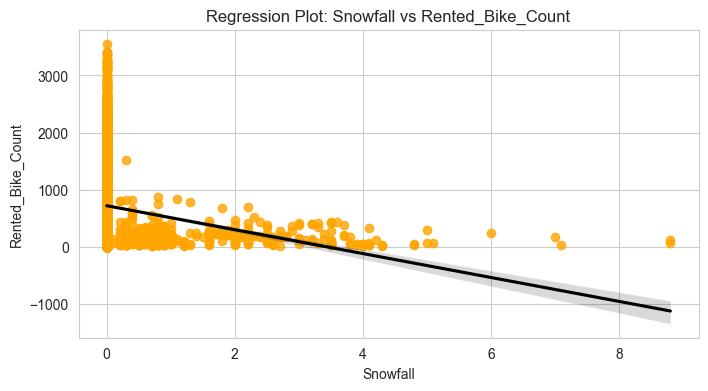

In [45]:
#printing the regression plot for all the numerical features

for col in numeric_features:
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.regplot(x=bike_df[col], y=bike_df['Rented_Bike_Count'], scatter_kws={"color": 'orange'}, line_kws={"color": "black"})
    plt.title(f"Regression Plot: {col} vs Rented_Bike_Count")
    plt.xlabel(col)
    plt.ylabel("Rented_Bike_Count")
    plt.show()  # Display each plot individually



* ***From the above regression plot of all numerical features we see that the columns  'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively related to the target variable.***


* ***which means the rented bike count increases with increase of these features.***
* ***'Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.***

## **Normalise Rented_Bike_Count column data**

* ***The data normalization (also referred to as data pre-processing) is a basic element of data mining. It means transforming the data, namely converting the source data in to another format that allows processing data effectively. The main purpose of data normalization is to minimize or even exclude duplicated data***

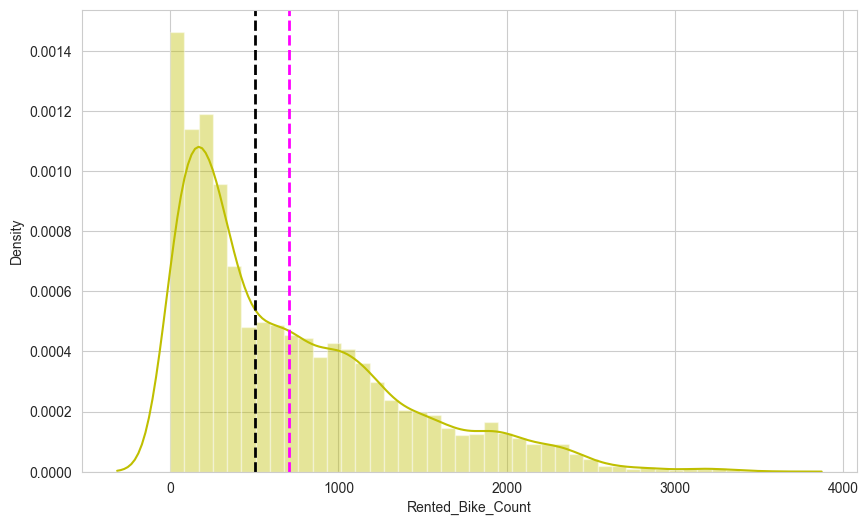

In [46]:
#Distribution plot of Rented Bike Count

plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(bike_df['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(bike_df['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(bike_df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

* ***The above graph shows that, Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.***

**Finding Outliers and treatment**

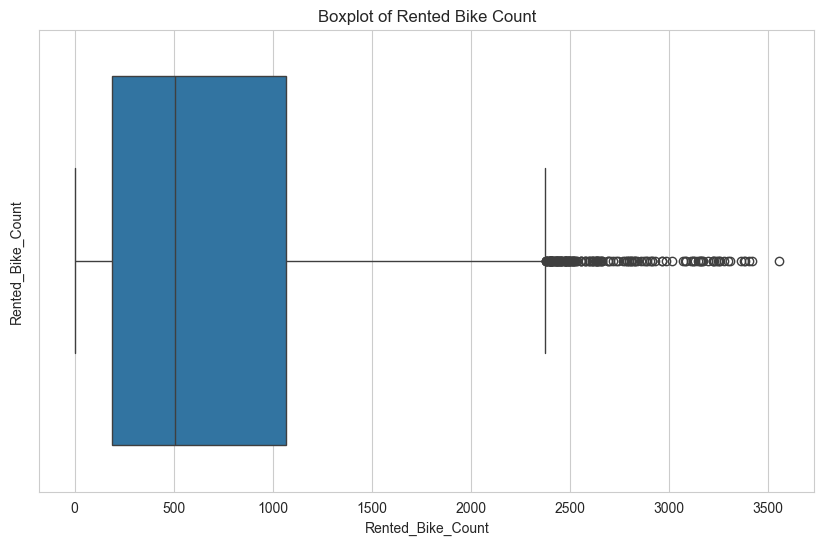

In [47]:
plt.figure(figsize=(10, 6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=bike_df['Rented_Bike_Count'])
plt.title('Boxplot of Rented Bike Count')
plt.show()

### Outlier Treatment

In [48]:
# outliers treatments
bike_df.loc[bike_df['Rainfall']>=4,'Rainfall']= 4
bike_df.loc[bike_df['Solar_Radiation']>=2.5,'Solar_Radiation']=2.5
bike_df.loc[bike_df['Snowfall']>2,'Snowfall']= 2
bike_df.loc[bike_df['Wind_speed']>=4,'Wind_speed']= 4


* ***we have applied outlier treatment techniques to the dataset by replacing the outliers with the maximum values.***

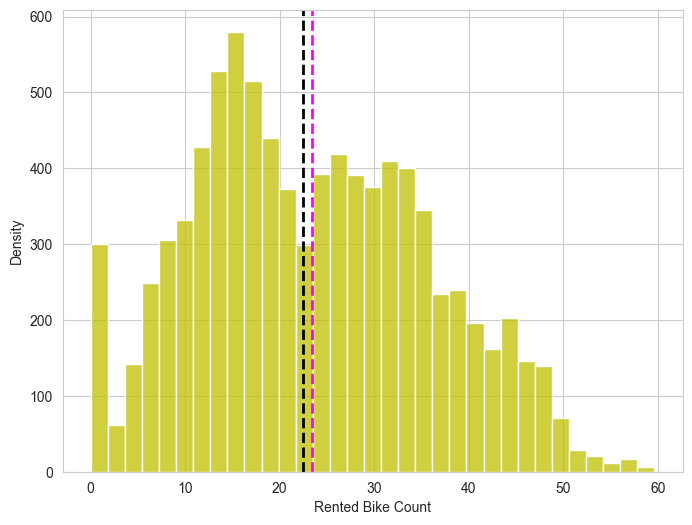

In [49]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(8,6))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.histplot(np.sqrt(bike_df['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

* ***Since we have generic rule of applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.***

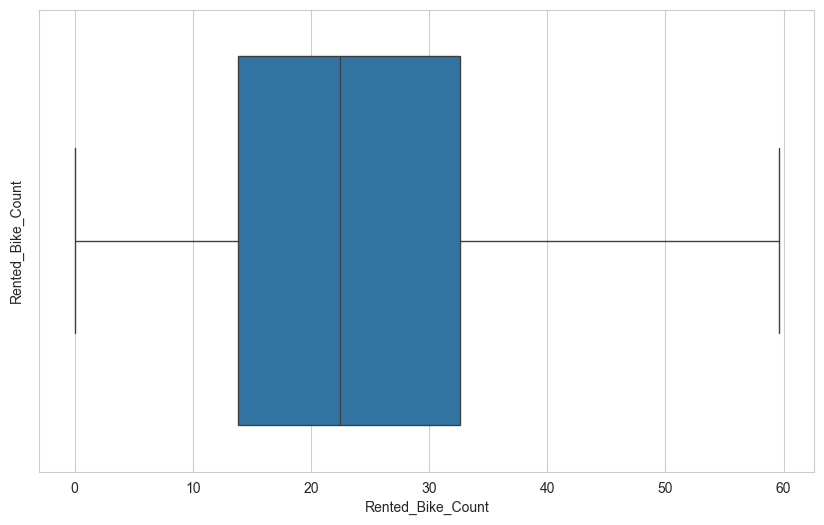

In [50]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(bike_df['Rented_Bike_Count']))
plt.show()

* ***After applying Square root to the Rented Bike Count column, we find that there is no outliers present.***

In [51]:
data_Frame_Correlation = bike_df[['Rented_Bike_Count','Temperature','Humidity','Wind_speed','Visibility','Dew_point_temperature',
   'Solar_Radiation','Rainfall','Snowfall']].corr()
data_Frame_Correlation

Rented_Bike_Count  Temperature  Humidity  Wind_speed  \
Rented_Bike_Count               1.000000     0.538558 -0.199780    0.131549   
Temperature                     0.538558     1.000000  0.159371   -0.031368   
Humidity                       -0.199780     0.159371  1.000000   -0.341432   
Wind_speed                      0.131549    -0.031368 -0.341432    1.000000   
Visibility                      0.199280     0.034794 -0.543090    0.173683   
Dew_point_temperature           0.379788     0.912798  0.536894   -0.174233   
Solar_Radiation                 0.265658     0.350679 -0.467236    0.342995   
Rainfall                       -0.174224     0.061274  0.331631   -0.038813   
Snowfall                       -0.160917    -0.263134  0.087086    0.008140   

                       Visibility  Dew_point_temperature  Solar_Radiation  \
Rented_Bike_Count        0.199280               0.379788         0.265658   
Temperature              0.034794               0.912798         0.350679   
Humidity                -0.543090               0.536894        -0.467236   
Wind_speed               0.173683              -0.174233         0.342995   
Visibility               1.000000              -0.176630         0.151105   
Dew_point_temperature   -0.176630               1.000000         0.090541   
Solar_Radiation          0.151105               0.090541         1.000000   
Rainfall                -0.238378               0.168386        -0.105920   
Snowfall                -0.109306              -0.195743        -0.080470   

                       Rainfall  Snowfall  
Rented_Bike_Count     -0.174224 -0.160917  
Temperature            0.061274 -0.263134  
Humidity               0.331631  0.087086  
Wind_speed            -0.038813  0.008140  
Visibility            -0.238378 -0.109306  
Dew_point_temperature  0.168386 -0.195743  
Solar_Radiation       -0.105920 -0.080470  
Rainfall               1.000000 -0.002297  
Snowfall              -0.002297  1.000000

## **Checking of Correlation between variables**

### Checking in OLS Model

**Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable**

In [52]:
#import the module
#assign the 'x','y' value
import statsmodels.api as sm
X = bike_df[[ 'Temperature','Humidity',
       'Wind_speed', 'Visibility','Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall']]
Y = bike_df['Rented_Bike_Count']
bike_df.head()

Rented_Bike_Count Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254    0         -5.2        37         2.2        2000   
1                204    1         -5.5        38         0.8        2000   
2                173    2         -6.0        39         1.0        2000   
3                107    3         -6.2        40         0.9        2000   
4                 78    4         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_Day month weekdays_weekend  
0  No Holiday             Yes    12                0  
1  No Holiday             Yes    12                0  
2  No Holiday             Yes    12                0  
3  No Holiday             Yes    12                0  
4  No Holiday             Yes    12                0

In [53]:
#add a constant column
X = sm.add_constant(X)
X

const  Temperature  Humidity  Wind_speed  Visibility  \
0       1.0         -5.2        37         2.2        2000   
1       1.0         -5.5        38         0.8        2000   
2       1.0         -6.0        39         1.0        2000   
3       1.0         -6.2        40         0.9        2000   
4       1.0         -6.0        36         2.3        2000   
...     ...          ...       ...         ...         ...   
8755    1.0          4.2        34         2.6        1894   
8756    1.0          3.4        37         2.3        2000   
8757    1.0          2.6        39         0.3        1968   
8758    1.0          2.1        41         1.0        1859   
8759    1.0          1.9        43         1.3        1909   

      Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  
0                     -17.6              0.0       0.0       0.0  
1                     -17.6              0.0       0.0       0.0  
2                     -17.7              0.0       0.0       0.0  
3                     -17.6              0.0       0.0       0.0  
4                     -18.6              0.0       0.0       0.0  
...                     ...              ...       ...       ...  
8755                  -10.3              0.0       0.0       0.0  
8756                   -9.9              0.0       0.0       0.0  
8757                   -9.9              0.0       0.0       0.0  
8758                   -9.8              0.0       0.0       0.0  
8759                   -9.3              0.0       0.0       0.0  

[8760 rows x 9 columns]

In [54]:
## fit an OLS model

model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     744.3
Date:                Tue, 08 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:48:12   Log-Likelihood:                -66827.
No. Observations:                8760   AIC:                         1.337e+05
Df Residuals:                    8751   BIC:                         1.337e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   699.4173    106.562      6.563      0.000     490.531     908.304
Temperature              40.3283      4.160      9.695      0.000      32.175      48.482
Humidity                 -8.5913      1.193     -7.203      0.000     -10.929      -6.253
Wind_speed               62.4552      5.951     10.495      0.000      50.790      74.121
Visibility               -0.0137      0.011     -1.254      0.210      -0.035       0.008
Dew_point_temperature    -5.0068      4.394     -1.139      0.255     -13.621       3.607
Solar_Radiation        -124.1270      9.254    -13.413      0.000    -142.267    -105.987
Rainfall               -162.0914     11.237    -14.425      0.000    -184.118    -140.065
Snowfall                 53.2592     19.061      2.794      0.005      15.895      90.623
==============================================================================
Omnibus:                      965.203   Durbin-Watson:                   0.344
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1618.702
Skew:                           0.770   Prob(JB):                         0.00
Kurtosis:                       4.436   Cond. No.                     3.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* **R sqauare and Adj Square are near to each other. 40% of variance in the Rented Bike count is  explained by the model.**
*  **For F statistic , P value is less than 0.05 for 5% levelof significance.**
*  **P value of dew point temp and visibility are very high and they are not significant.**

*  **Omnibus tests the skewness and kurtosis of the residuals. Here the value of Omnibus is high., it shows we have skewness in our data.**
*  **The condition number is large, 3.11e+04. This might indicate that there are strong multicollinearity or other numerical problems**   
*  **Durbin-Watson tests for autocorrelation of the residuals. Here value is less than 0.5. We can say that there exists a positive auto correlation among the variables.**

In [55]:
X.corr()

const  Temperature  Humidity  Wind_speed  Visibility  \
const                    NaN          NaN       NaN         NaN         NaN   
Temperature              NaN     1.000000  0.159371   -0.031368    0.034794   
Humidity                 NaN     0.159371  1.000000   -0.341432   -0.543090   
Wind_speed               NaN    -0.031368 -0.341432    1.000000    0.173683   
Visibility               NaN     0.034794 -0.543090    0.173683    1.000000   
Dew_point_temperature    NaN     0.912798  0.536894   -0.174233   -0.176630   
Solar_Radiation          NaN     0.350679 -0.467236    0.342995    0.151105   
Rainfall                 NaN     0.061274  0.331631   -0.038813   -0.238378   
Snowfall                 NaN    -0.263134  0.087086    0.008140   -0.109306   

                       Dew_point_temperature  Solar_Radiation  Rainfall  \
const                                    NaN              NaN       NaN   
Temperature                         0.912798         0.350679  0.061274   
Humidity                            0.536894        -0.467236  0.331631   
Wind_speed                         -0.174233         0.342995 -0.038813   
Visibility                         -0.176630         0.151105 -0.238378   
Dew_point_temperature               1.000000         0.090541  0.168386   
Solar_Radiation                     0.090541         1.000000 -0.105920   
Rainfall                            0.168386        -0.105920  1.000000   
Snowfall                           -0.195743        -0.080470 -0.002297   

                       Snowfall  
const                       NaN  
Temperature           -0.263134  
Humidity               0.087086  
Wind_speed             0.008140  
Visibility            -0.109306  
Dew_point_temperature -0.195743  
Solar_Radiation       -0.080470  
Rainfall              -0.002297  
Snowfall               1.000000

* ***From the OLS model we find that the 'Temperature' and  'Dew_point_temperature' are highly correlated so we need to drop one of them.***
* ***For droping them we check the (P>|t|) value from above table and we can see that the 'Dew_point_temperature' value is higher so we need to drop Dew_point_temperature column***
* ***For clarity, we use visualisation i.e heatmap in next step***


### **Heatmap**

#### **A correlation Heatmap is a type of graphical representation that displays the correlation matrix, which helps to determine the correlation between different variables.**

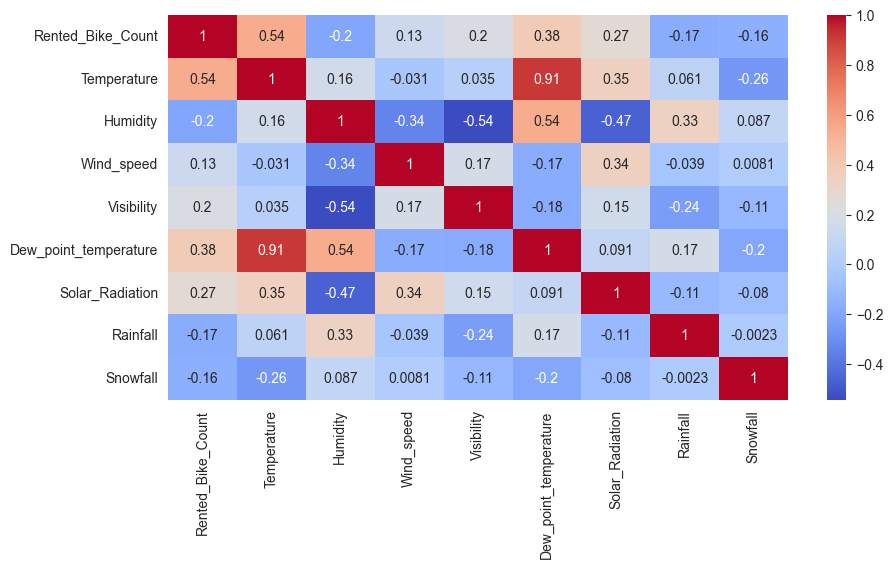

In [56]:
plt.figure(figsize=(10,5))
sns.heatmap(data_Frame_Correlation, cmap='coolwarm', annot=True)
plt.show()

**We can observe on the heatmap that on the target variable line, the most positively correlated variables to the rent are**:
* the temperature
* the dew point temperature
* the solar radiation

**And most negatively correlated variables are**:
* humidity
* rainfall

* ***From the above correlation heatmap, We see that there is a positive
correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it won't affect the outcome of our analysis. And they have the same variations, so we can drop the column 'Dew point temperature(°C)'.***

In [57]:
# drop the Dew point temperature column
bike_df=bike_df.drop(['Dew_point_temperature'],axis=1)

In [58]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  month              8760 non-null   category
 13  weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.7+ KB


## **Feature Engineering & Data Pre-processing**

## Create the dummy variables

**A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables.**

### One Hot Encoding

In [59]:
#Assign all categorical features to a variable
categorical_features=list(bike_df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

### one hot encoding

**A one hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.**

In [60]:
#creat a copy
bike_df_copy = bike_df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    bike_df_copy = one_hot_encoding(bike_df_copy, col)
bike_df_copy.head()

Rented_Bike_Count  Temperature  Humidity  Wind_speed  Visibility  \
0                254         -5.2        37         2.2        2000   
1                204         -5.5        38         0.8        2000   
2                173         -6.0        39         1.0        2000   
3                107         -6.2        40         0.9        2000   
4                 78         -6.0        36         2.3        2000   

   Solar_Radiation  Rainfall  Snowfall  Hour_1  Hour_2  ...  month_4  month_5  \
0              0.0       0.0       0.0   False   False  ...    False    False   
1              0.0       0.0       0.0    True   False  ...    False    False   
2              0.0       0.0       0.0   False    True  ...    False    False   
3              0.0       0.0       0.0   False   False  ...    False    False   
4              0.0       0.0       0.0   False   False  ...    False    False   

   month_6  month_7  month_8  month_9  month_10  month_11  month_12  \
0    False    False    False    False     False     False      True   
1    False    False    False    False     False     False      True   
2    False    False    False    False     False     False      True   
3    False    False    False    False     False     False      True   
4    False    False    False    False     False     False      True   

   weekdays_weekend_1  
0               False  
1               False  
2               False  
3               False  
4               False  

[5 rows x 48 columns]

# **Model Training**

## **Train Test split for regression**

Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

In [61]:
#Assign the value in X and Y
X = bike_df_copy.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(bike_df_copy['Rented_Bike_Count'])

In [62]:
import pickle
import os

# After preprocessing your train_df
columns = list(X.columns)

# Save column names to a file
column_dump_path = r"resources\columns.pkl"
with open(column_dump_path, 'wb') as f:
    pickle.dump(columns, f)


In [63]:
X.head()

Temperature  Humidity  Wind_speed  Visibility  Solar_Radiation  Rainfall  \
0         -5.2        37         2.2        2000              0.0       0.0   
1         -5.5        38         0.8        2000              0.0       0.0   
2         -6.0        39         1.0        2000              0.0       0.0   
3         -6.2        40         0.9        2000              0.0       0.0   
4         -6.0        36         2.3        2000              0.0       0.0   

   Snowfall  Hour_1  Hour_2  Hour_3  ...  month_4  month_5  month_6  month_7  \
0       0.0   False   False   False  ...    False    False    False    False   
1       0.0    True   False   False  ...    False    False    False    False   
2       0.0   False    True   False  ...    False    False    False    False   
3       0.0   False   False    True  ...    False    False    False    False   
4       0.0   False   False   False  ...    False    False    False    False   

   month_8  month_9  month_10  month_11  month_12  weekdays_weekend_1  
0    False    False     False     False      True               False  
1    False    False     False     False      True               False  
2    False    False     False     False      True               False  
3    False    False     False     False      True               False  
4    False    False     False     False      True               False  

[5 rows x 47 columns]

In [64]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [65]:
#Create test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 47)
(2190, 47)


In [66]:
bike_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rented_Bike_Count    8760 non-null   int64  
 1   Temperature          8760 non-null   float64
 2   Humidity             8760 non-null   int64  
 3   Wind_speed           8760 non-null   float64
 4   Visibility           8760 non-null   int64  
 5   Solar_Radiation      8760 non-null   float64
 6   Rainfall             8760 non-null   float64
 7   Snowfall             8760 non-null   float64
 8   Hour_1               8760 non-null   bool   
 9   Hour_2               8760 non-null   bool   
 10  Hour_3               8760 non-null   bool   
 11  Hour_4               8760 non-null   bool   
 12  Hour_5               8760 non-null   bool   
 13  Hour_6               8760 non-null   bool   
 14  Hour_7               8760 non-null   bool   
 15  Hour_8               8760 non-null   b

In [67]:
bike_df_copy.describe().columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall'],
      dtype='object')

## Scaling

In [68]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## Evaluation Metrics for Regression Models

**1. Mean Squared Error (MSE)**

The **Mean Squared Error (MSE)** tells you how close a regression line is to a set of points. It does this by calculating the squared differences between the observed values and the predicted values.

- **MSE Formula**:

  $$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (\text{Actual}_i - \text{Forecast}_i)^2 $$

  Where:
  - **$n$** = number of items
  - **$\sum$** = summation notation
  - **Actual** = observed y-value
  - **Forecast** = y-value from regression

- **Interpretation**: The lower the MSE, the better the model's forecast. It measures the average of the squared errors, so larger errors are penalized more heavily.

---

**2. Root Mean Squared Error (RMSE)**

**Root Mean Squared Error (RMSE)** is the square root of the mean squared error and represents the standard deviation of the residuals (prediction errors).

- **RMSE Formula**:

  $$ \text{RMSE} = \sqrt{\text{MSE}} $$

  **Interpretation**: RMSE gives an idea of the standard deviation of the residuals, making it easier to interpret the scale of errors in the same units as the target variable.

---

**3. Mean Absolute Error (MAE)**

**Mean Absolute Error (MAE)** is another metric used to evaluate regression models. It measures the average magnitude of errors in a set of predictions, without considering their direction.

- **MAE Formula**:

  $$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |\text{Actual}_i - \text{Forecast}_i| $$

  **Interpretation**: MAE provides a straightforward measure of average error magnitude. Unlike MSE, it does not square the errors, so it treats all errors equally.

---

**4. R-squared (R²)**

**R-squared (R²)** is a statistical measure that represents the proportion of the variance in the dependent variable that is explained by the independent variables in a regression model.

- **R-squared Formula**:

  $$ \text{R}^2 = 1 - \frac{\text{Unexplained Variation}}{\text{Total Variation}} $$

  or

  $$ \text{R}^2 = 1 - \frac{\sum_{i=1}^{n} (\text{Actual}_i - \text{Forecast}_i)^2}{\sum_{i=1}^{n} (\text{Actual}_i - \bar{\text{Actual}})^2} $$

  Where:
  - **Unexplained Variation** = Sum of squared residuals
  - **Total Variation** = Sum of squared differences between actual values and the mean of actual values

  **Interpretation**: R² measures how well the model explains the variability of the dependent variable. It ranges from 0 to 1, where 1 indicates a perfect fit.

---

**5. Adjusted R-squared**

**Adjusted R-squared** is a modified version of R-squared that adjusts for the number of predictors in the model. It provides a more accurate measure of model fit when comparing models with different numbers of predictors.

- **Adjusted R-squared Formula**:

  $$ \text{Adjusted } R^2 = 1 - \left( \frac{1 - R^2}{n - k - 1} \times (n - 1) \right) $$

  Where:
  - **$n$** = number of observations
  - **$k$** = number of predictors

  **Interpretation**: Adjusted R² can be used to compare models with different numbers of predictors, as it penalizes the addition of less useful predictors.



# LINEAR REGRESSION

* **Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line**

### Linear Regression: An Introduction

**Linear regression** uses a linear approach to model the relationship between **independent** and **dependent variables**. In simple terms, it's a best-fit line drawn over the values of independent and dependent variables.

For a single variable, the formula is the same as the equation of a straight line, which includes an intercept and a slope:

$$ \text{y\_pred} = \beta_0 + \beta_1x $$

where **$\beta_0$** and **$\beta_1$** are the **intercept** and **slope**, respectively.

In the case of multiple features, the formula extends to:

$$ \text{y\_pred} = \beta_0 + \beta_1x_1 + \beta_2x_2 +\beta_3x_3 + \ldots $$

where **$x_1, x_2, x_3$** are the feature values, and **$\beta_0, \beta_1, \beta_2, \ldots$** are the **weights** assigned to each feature. These weights are the **parameters** that the algorithm tries to learn using **Gradient Descent**.

---

### Gradient Descent

**Gradient Descent** is the process by which the algorithm updates the parameters using a **loss function**. The loss function measures the difference between the actual values and predicted values (also known as **error** or **residuals**).

- **Loss Function**: The simplest loss function is the sum of squared errors:
  
  $$ \text{Loss} = \sum_{i=1}^{n} (\text{y\_actual}_i - \text{y\_pred}_i)^2 $$

- **Cost Function**: When the loss function is summed over all observations, it becomes the **cost function**.

The role of Gradient Descent is to update the parameters until the cost function is **minimized**, meaning the algorithm has reached a **global minimum**.

- **Learning Rate ($\alpha$)**: Gradient Descent uses a hyperparameter called **$\alpha$** (learning rate) that controls how big the steps are when updating the parameters. It’s crucial to choose an optimal value for **$\alpha$** because:
  - **Too high**: It might **overshoot** the minimum.
  - **Too low**: It might get **stuck** at a local minimum.

---

### Assumptions Before Implementing Linear Regression

1. **No multicollinearity** in the dataset.
2. **Independent variables** should show a **linear relationship** with the dependent variable.
3. The **mean of residuals** should be **0** or close to **0**.
4. There should be **no heteroscedasticity**, meaning the variance should be constant along the line of best fit.

---

### Implementation in Python

Now, let's implement our first model using `LinearRegression` from the **scikit-learn** library.


In [69]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [70]:
#check the score
reg.score(X_train, y_train)

0.7912511062188399

In [71]:
#check the coefficeint
reg.coef_

array([ 5.62018952e+00, -2.09096242e+00,  1.81794216e-02,  4.25187510e-01,
        7.46834595e-01, -2.59352841e+00, -6.42277723e-02, -4.38504462e-01,
       -1.03276568e+00, -1.41080640e+00, -1.90621582e+00, -1.80546450e+00,
       -8.35995566e-01,  4.09389355e-01,  1.48105918e+00,  3.25150888e-01,
       -5.97789564e-01, -6.12177842e-01, -3.77838010e-01, -4.54689976e-01,
       -4.74989953e-01, -2.26685600e-01,  1.41362065e-01,  9.10061796e-01,
        2.06909632e+00,  1.47147895e+00,  1.20066132e+00,  1.26314374e+00,
        1.02591357e+00,  2.92211350e-01, -4.54353768e+11, -6.84949975e+11,
       -1.24730777e+12,  7.46759738e-01,  4.93539188e+00, -1.64969745e-01,
       -5.11912704e+11, -5.08964166e+11, -5.12750649e+11, -3.55881191e+11,
       -3.62502880e+11, -3.61311892e+11, -7.87291267e+11, -8.05252801e+11,
       -8.05906998e+11,  5.69763016e-01, -6.15516627e-01])

In [72]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [73]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 32.145383851861496
RMSE : 5.669689925548089
MAE : 4.300926582246946
R2 : 0.7912511062188399
Adjusted R2 : 0.7866707149920824


**Looks like our train set's r2 score value is 0.79 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [74]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [75]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


MSE : 31.220648235864868
RMSE : 5.587544025407305
MAE : 4.260539210375849
R2 : 0.8023589347180968
Adjusted R2 : 0.7980222726881018


**The test set's r2_score is 0.80. This means our linear model is
performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**


In [76]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

**Heteroscedasticity**

### Heteroscedasticity in Regression Models

**Heteroscedasticity** refers to a situation where the variance of the errors (residuals) is not constant across all levels of the independent variable(s) in a regression model. This condition violates one of the key assumptions of linear regression, which is that the variance of the errors should be constant (homoscedastic) for all levels of the independent variable(s).

- **Violation of Assumption**: In linear regression, it is assumed that the residuals (errors) have constant variance across all values of the independent variables. This is known as **homoscedasticity**.

- **Indication of Heteroscedasticity**: If a plot of residuals versus predicted values shows a funnel shape, where the spread of residuals increases or decreases as the predicted values increase, this is an indication of heteroscedasticity.

- **Visual Diagnosis**:
  - **Funnel Shape**: Residuals spreading out or contracting as the predicted values increase.
  - **Patterns in Residual Plot**: Any systematic pattern in the residuals plot suggests that the variance is not constant.

**Consequences of Heteroscedasticity**:
- **Inefficiency**: The estimates of the coefficients remain unbiased but are no longer the Best Linear Unbiased Estimators (BLUE), leading to less efficient estimates.
- **Incorrect Inference**: Standard errors of the coefficients may be incorrect, which can lead to invalid hypothesis tests and confidence intervals.

**Solutions to Address Heteroscedasticity**:
- **Transformations**: Applying transformations such as log or square root to the dependent variable.
- **Weighted Least Squares**: Using weighted least squares regression to give different weights to different observations.
- **Robust Standard Errors**: Applying robust standard errors that adjust for heteroscedasticity.

Understanding and addressing heteroscedasticity is crucial for making valid inferences from regression models.


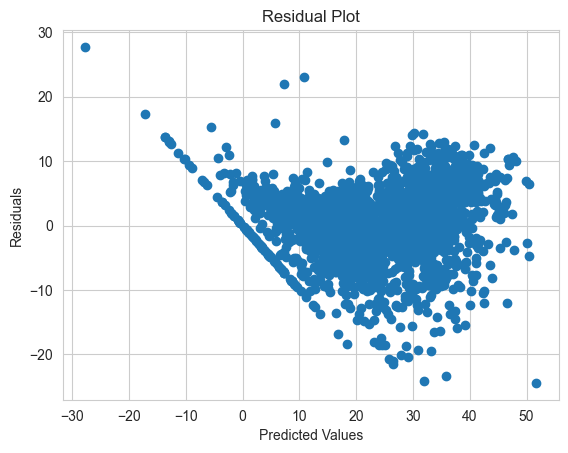

In [77]:
### Heteroscadacity - Residual plot
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

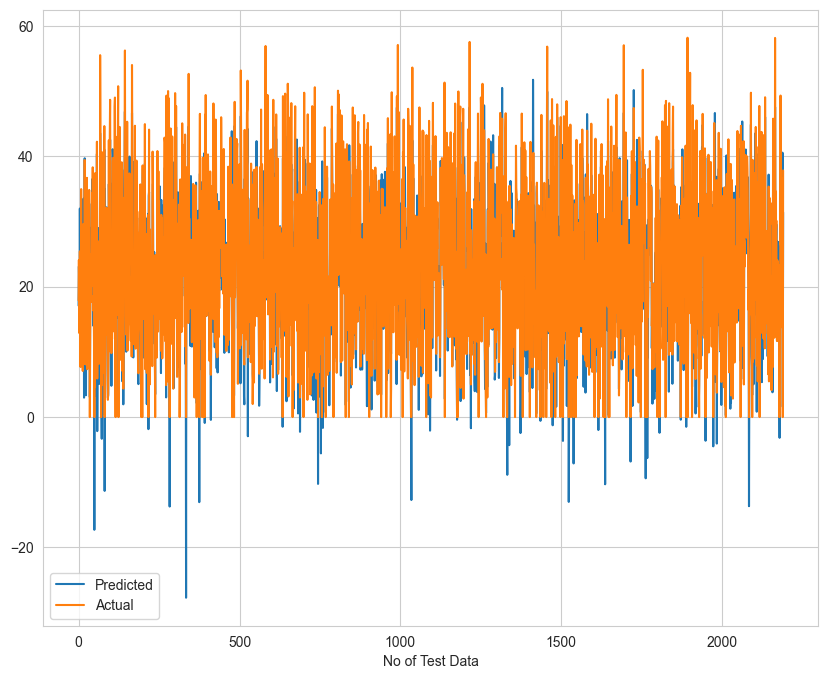

In [78]:
# Actual Price vs predicte for Linear Regression plot
plt.figure(figsize=(10,8))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

## **Ridge and Lasso Regression**

* Ridge and Lasso Regression are types of Regularization techniques
* Regularization techniques are used to deal with overfitting and when the dataset is large
* Ridge and Lasso Regression involve adding penalties to the regression function

# **Lasso Regression**

### Lasso Regression: An Introduction

**Lasso Regression** (Least Absolute Shrinkage and Selection Operator) is a type of linear regression that introduces regularization to the model by adding a penalty equal to the absolute value of the magnitude of coefficients. This penalty helps in reducing the complexity of the model, effectively performing **feature selection** by shrinking some coefficients to zero.

The Lasso Regression formula is:

$$ \text{y\_pred} = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_nx_n $$

with the added penalty term:

$$ \text{Cost Function} = \sum_{i=1}^{n} \left( y\_actual_i - y\_pred_i \right)^2 + \lambda \sum_{j=1}^{p} |\beta_j| $$

where:
- **$\lambda$** (lambda) is the **regularization parameter** that controls the strength of the penalty.
- **$|\beta_j|$** is the absolute value of the coefficients.

---

### Why Use Lasso Regression?

- **Feature Selection**: Lasso can reduce the coefficients of some features to exactly zero, effectively performing feature selection and helping to identify the most important features in your model.
- **Avoiding Overfitting**: By adding a penalty to the cost function, Lasso helps prevent the model from overfitting, especially when dealing with datasets with a large number of features.
- **Sparse Models**: Lasso encourages the creation of sparse models where only a subset of the features have non-zero coefficients, making the model simpler and easier to interpret.

---

### Gradient Descent in Lasso Regression

Lasso Regression, like regular linear regression, uses **Gradient Descent** to minimize the cost function, but with the additional **L1 regularization** term:

- **L1 Regularization**: The absolute value penalty (L1 regularization) helps in shrinking coefficients toward zero, which is the key difference from Ridge Regression (which uses L2 regularization).
  
  The regularized cost function is minimized during the gradient descent process, and the learning rate **($\alpha$)** plays a crucial role in how the coefficients are updated.

---

### Assumptions Before Implementing Lasso Regression

1. **No multicollinearity** in the dataset.
2. **Independent variables** should show a **linear relationship** with the dependent variable.
3. The **mean of residuals** should be **0** or close to **0**.
4. There should be **no heteroscedasticity**, meaning the variance should be constant along the line of best fit.

---

### Implementation in Python

Now, let's implement Lasso Regression using `Lasso` from the **scikit-learn** library.


In [79]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [80]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.6616965321609857 0.6517367073300737


In [81]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [82]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 53.6293008389505
RMSE : 7.323202908492329
MAE : 5.725538038975607
R2 : 0.6517367073300737
Adjusted R2 : 0.6440950757915647


**Looks like train set's r2 score value is 0.65 that means our model is not able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [83]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }

# Convert the dictionary to a DataFrame
df_lasso = pd.DataFrame([dict1])  # Use a list to ensure it's treated as a row

# Concatenate the new DataFrame to the existing one
training_df = pd.concat([training_df, df_lasso], ignore_index=True)
training_df = training_df.drop_duplicates()
training_df

Model    MAE     MSE   RMSE  R2_score  Adjusted R2
0  Linear regression   4.301  32.145  5.670     0.791         0.79
1   Lasso regression   5.726  53.629  7.323     0.652         0.64

In [84]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 53.44058205368415
RMSE : 7.310306563591171
MAE : 5.758954025411389
R2 : 0.6616965321609857
Adjusted R2 : 0.6542734401962641


**The test set's r2_score is 0.66. This means our linear model is  not performing well on the data.**

In [85]:
# storing the test set metrics value in a dataframe for later comparison
# Dictionary for Lasso Regression
dict2 = {
    'Model': 'Lasso Regression',
    'MAE': round(MAE_l, 3),
    'MSE': round(MSE_l, 3),
    'RMSE': round(RMSE_l, 3),
    'R2_score': round(r2_l, 3),
    'Adjusted R2': round(Adjusted_R2_l, 2)
}

# Convert the dictionary to a DataFrame
df_lasso = pd.DataFrame([dict2])  # Use a list to ensure it's treated as a row

# Concatenate the new DataFrame to the existing one
test_df = pd.concat([test_df, df_lasso], ignore_index=True)

# Display the updated DataFrame
print(test_df)

                Model    MAE     MSE   RMSE  R2_score  Adjusted R2
0  Linear regression   4.261  31.221  5.588     0.802         0.80
1    Lasso Regression  5.759  53.441  7.310     0.662         0.65


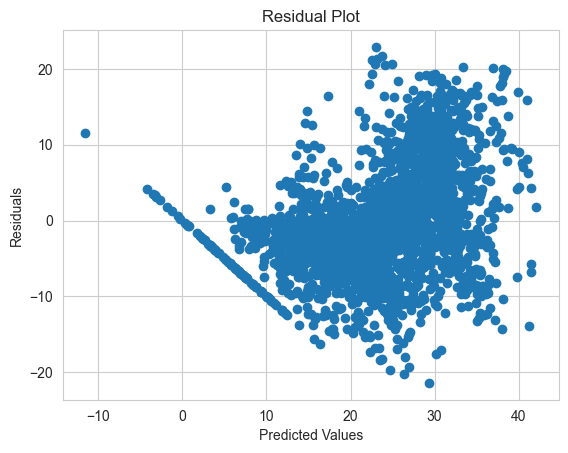

In [86]:
### Heteroscadacity- Residual plot
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

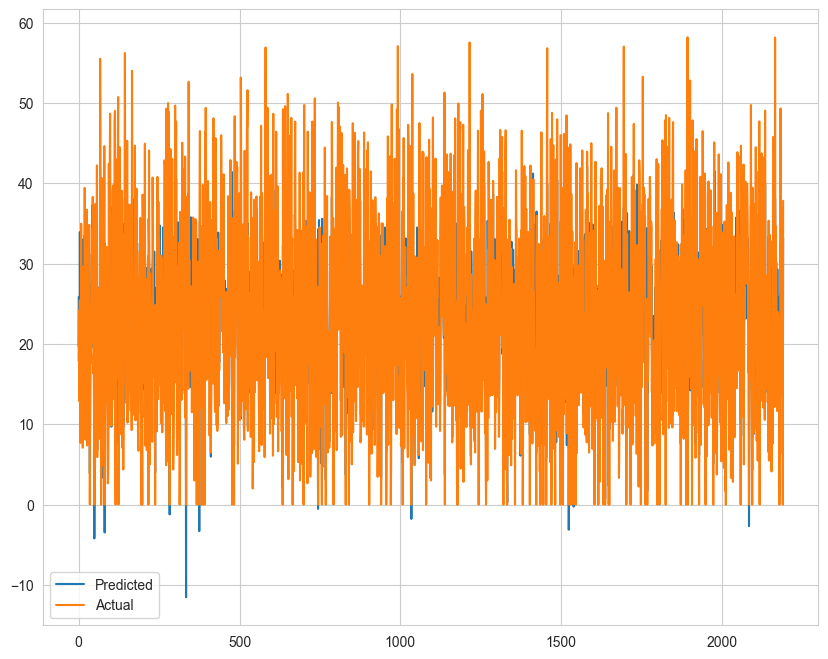

In [87]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **RIDGE REGRESSION**

### Ridge Regression: An Introduction

**Ridge Regression** (also known as Tikhonov regularization) is a type of linear regression that includes a regularization term to the cost function. This regularization helps to prevent overfitting by penalizing large coefficients. Ridge Regression uses **L2 regularization**, which adds a penalty proportional to the square of the magnitude of the coefficients.

The Ridge Regression formula is:

$$ \text{y\_pred} = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_nx_n $$

with the added penalty term:

$$ \text{Cost Function} = \sum_{i=1}^{n} \left( y\_actual_i - y\_pred_i \right)^2 + \lambda \sum_{j=1}^{p} \beta_j^2 $$

where:
- **$\lambda$** (lambda) is the **regularization parameter** that controls the strength of the penalty.
- **$\beta_j^2$** is the square of the coefficients.

---

### Why Use Ridge Regression?

- **Prevent Overfitting**: By adding a penalty on the size of coefficients, Ridge Regression helps to prevent overfitting, especially in models with a large number of features.
- **Handle Multicollinearity**: Ridge Regression is effective in dealing with multicollinearity by shrinking the coefficients of correlated predictors.
- **Improved Model Stability**: The regularization term helps in stabilizing the estimates of the coefficients, leading to more reliable predictions.

---

### Gradient Descent in Ridge Regression

Ridge Regression, like Lasso, can use **Gradient Descent** to minimize the cost function, but with the **L2 regularization** term:

- **L2 Regularization**: The square penalty (L2 regularization) helps in shrinking the coefficients without setting any of them exactly to zero. This differs from Lasso Regression, which uses L1 regularization and can set some coefficients to zero.

  The regularized cost function is minimized during the gradient descent process, and the learning rate **($\alpha$)** affects the step size for updating the coefficients.

---

### Assumptions Before Implementing Ridge Regression

1. **No multicollinearity** in the dataset.
2. **Independent variables** should show a **linear relationship** with the dependent variable.
3. The **mean of residuals** should be **0** or close to **0**.
4. There should be **no heteroscedasticity**, meaning the variance should be constant along the line of best fit.

---

### Implementation in Python

Now, let's implement Ridge Regression using `Ridge` from the **scikit-learn** library.


In [88]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [89]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [90]:
#check the score
ridge.score(X_train, y_train)

0.7912528529760952

In [91]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [92]:
y_pred_train_ridge

array([20.6268343 , 30.79716342, 19.93372677, ..., 34.40504857,
       23.28150324, 22.23220394])

In [93]:
y_pred_test_ridge

array([17.10174808, 23.097474  , 20.39431778, ..., 40.50562711,
        1.56421593, 31.35447761])

In [94]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 32.145114867526054
RMSE : 5.669666204242191
MAE : 4.301106564083287
R2 : 0.7912528529760952
Adjusted R2 : 0.7866725000768778


**Looks like our train set's r2 score value is 0.79 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [95]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}

# Convert the dictionary to a DataFrame
df_ridge = pd.DataFrame([dict1])  # Use a list to ensure it's treated as a row

# Concatenate the new DataFrame to the existing one
training_df = pd.concat([training_df, df_ridge], ignore_index=True)

# Drop duplicates, keeping the last entry (or use 'first' if preferred)
training_df = training_df.drop_duplicates(subset='Model', keep='last')

training_df

Model    MAE     MSE   RMSE  R2_score  Adjusted R2
0  Linear regression   4.301  32.145  5.670     0.791         0.79
1   Lasso regression   5.726  53.629  7.323     0.652         0.64
2   Ridge regression   4.301  32.145  5.670     0.791         0.79

In [96]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 31.21762096269082
RMSE : 5.587273124046364
MAE : 4.260547327733972
R2 : 0.802378098749878
Adjusted R2 : 0.7980418572191796


**The r2_score for the test set is 0.80. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**


In [97]:
# Dictionary for Ridge Regression
dict2 = {
    'Model': 'Ridge Regression',
    'MAE': round(MAE_r, 3),
    'MSE': round(MSE_r, 3),
    'RMSE': round(RMSE_r, 3),
    'R2_score': round(r2_r, 3),
    'Adjusted R2': round(Adjusted_R2_r, 2)
}

# Convert the dictionary to a DataFrame
df_ridge = pd.DataFrame([dict2])  # Use a list to ensure it's treated as a row

# Concatenate the new DataFrame to the existing one
test_df = pd.concat([test_df, df_ridge], ignore_index=True)

# Display the updated DataFrame
print(test_df)


                Model    MAE     MSE   RMSE  R2_score  Adjusted R2
0  Linear regression   4.261  31.221  5.588     0.802         0.80
1    Lasso Regression  5.759  53.441  7.310     0.662         0.65
2    Ridge Regression  4.261  31.218  5.587     0.802         0.80


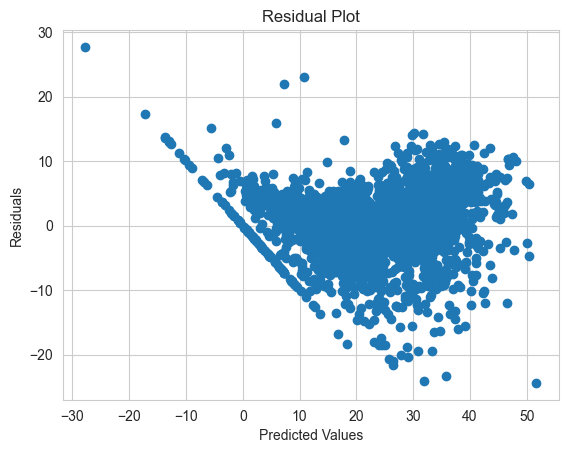

In [98]:
### Heteroscadacity - Residual plot
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

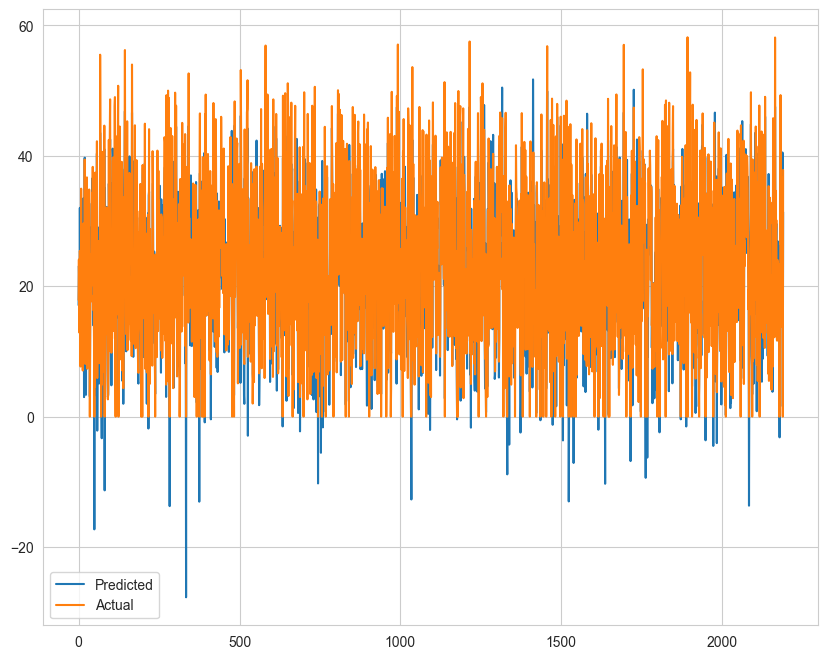

In [99]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **ELASTIC NET REGRESSION**

### Elastic Net Regression: An Introduction

**Elastic Net Regression** is a linear regression technique that combines the penalties of both Lasso Regression (L1 regularization) and Ridge Regression (L2 regularization). This method is useful when there are multiple features that are correlated with each other. It effectively balances the two types of regularization to improve model performance and interpretability.

- **Elastic Net Formula**:

  $$ \text{y\_pred} = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_nx_n $$

  with the added penalty term:

  $$ \text{Cost Function} = \sum_{i=1}^{n} \left( y\_actual_i - y\_pred_i \right)^2 + \lambda_1 \sum_{j=1}^{p} |\beta_j| + \lambda_2 \sum_{j=1}^{p} \beta_j^2 $$

  Where:
  - **$\lambda_1$** is the **L1 regularization parameter** (from Lasso).
  - **$\lambda_2$** is the **L2 regularization parameter** (from Ridge).
  - **$\beta_j$** are the coefficients.

---

### Why Use Elastic Net Regression?

- **Combines Regularization**: Elastic Net combines the benefits of both Lasso and Ridge regression. It performs feature selection (like Lasso) and deals with multicollinearity (like Ridge).
- **Feature Selection and Stability**: It encourages sparsity (shrinks some coefficients to zero) while also handling situations where features are highly correlated.
- **Flexibility**: The model can be tuned to emphasize L1 or L2 regularization by adjusting the values of **$\lambda_1$** and **$\lambda_2$**.

---

### Key Parameters

- **$\lambda_1$ (L1 Regularization)**: Controls the amount of Lasso regularization. Larger values increase sparsity, potentially setting some coefficients to zero.
- **$\lambda_2$ (L2 Regularization)**: Controls the amount of Ridge regularization. Larger values shrink coefficients towards zero but generally do not set them exactly to zero.

- **Mixing Parameter ($\alpha$)**: The mixing parameter, which is used to balance the L1 and L2 penalties, is defined as:

  $$ \alpha = \frac{\lambda_1}{\lambda_1 + \lambda_2} $$

  Where:
  - **$\alpha = 1$** corresponds to Lasso Regression.
  - **$\alpha = 0$** corresponds to Ridge Regression.

---

### Gradient Descent in Elastic Net

Elastic Net Regression uses **Gradient Descent** to minimize the cost function, incorporating both L1 and L2 regularization terms. The gradient descent updates the coefficients by taking into account both types of regularization:

- **L1 Regularization** (Lasso) introduces sparsity by forcing some coefficients to zero.
- **L2 Regularization** (Ridge) shrinks the coefficients towards zero but typically does not set them exactly to zero.

---

### Assumptions Before Implementing Elastic Net Regression

1. **Correlated Features**: Effective when features are correlated with each other.
2. **Feature Selection and Regularization**: Useful for models where both feature selection and regularization are important.
3. **Model Tuning**: Requires tuning of **$\lambda_1$** and **$\lambda_2$** to achieve the best balance between L1 and L2 penalties.

---

### Implementation in Python

Now, let's implement Elastic Net Regression using `ElasticNet` from the **scikit-learn** library.


In [100]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [101]:
#FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [102]:
#check the score
elasticnet.score(X_train, y_train)

0.7869094683220484

In [103]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [104]:
print(y_pred_train_en)
print(y_pred_test_en)

[20.51762722 30.32115278 20.77749533 ... 34.1298438  23.5300901
 22.50925662]
[17.82596456 22.89744997 19.7704618  ... 39.6367907   2.91777217
 32.00142116]


In [105]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 32.81395561868704
RMSE : 5.7283466741012665
MAE : 4.368330478976073
R2 : 0.7869094683220484
Adjusted R2 : 0.7822338123982092


**Looks like our train set's r2 score value is 0.78 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [106]:
# Dictionary for Elastic Net Regression
dict1 = {
    'Model': 'Elastic Net Regression',
    'MAE': round(MAE_e, 3),
    'MSE': round(MSE_e, 3),
    'RMSE': round(RMSE_e, 3),
    'R2_score': round(r2_e, 3),
    'Adjusted R2': round(Adjusted_R2_e, 2)
}

# Convert the dictionary to a DataFrame
df_elastic_net = pd.DataFrame([dict1])  # Use a list to ensure it's treated as a row

# Concatenate the new DataFrame to the existing one
training_df = pd.concat([training_df, df_elastic_net], ignore_index=True)
training_df = training_df.drop_duplicates(subset='Model', keep='last')
# Display the updated DataFrame
print(training_df)


                    Model    MAE     MSE   RMSE  R2_score  Adjusted R2
0      Linear regression   4.301  32.145  5.670     0.791         0.79
1       Lasso regression   5.726  53.629  7.323     0.652         0.64
2       Ridge regression   4.301  32.145  5.670     0.791         0.79
3  Elastic Net Regression  4.368  32.814  5.728     0.787         0.78


In [107]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 32.123277973049476
RMSE : 5.66774011163616
MAE : 4.350475759092031
R2 : 0.7966448732590091
Adjusted R2 : 0.7921828326629183


**The r2_score for the test set is 0.79. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**


In [108]:
# storing the test set metrics value in a dataframe for later comparison

# Dictionary for Elastic Net Regression Test
dict2 = {
    'Model': 'Elastic Net Regression Test',
    'MAE': round(MAE_e, 3),
    'MSE': round(MSE_e, 3),
    'RMSE': round(RMSE_e, 3),
    'R2_score': round(r2_e, 3),
    'Adjusted R2': round(Adjusted_R2_e, 2)
}

# Convert the dictionary to a DataFrame
df_elastic_net_test = pd.DataFrame([dict2])  # Use a list to ensure it's treated as a row

# Concatenate the new DataFrame to the existing one
test_df = pd.concat([test_df, df_elastic_net_test], ignore_index=True)

# Display the updated DataFrame
print(test_df)


                         Model    MAE     MSE   RMSE  R2_score  Adjusted R2
0           Linear regression   4.261  31.221  5.588     0.802         0.80
1             Lasso Regression  5.759  53.441  7.310     0.662         0.65
2             Ridge Regression  4.261  31.218  5.587     0.802         0.80
3  Elastic Net Regression Test  4.350  32.123  5.668     0.797         0.79


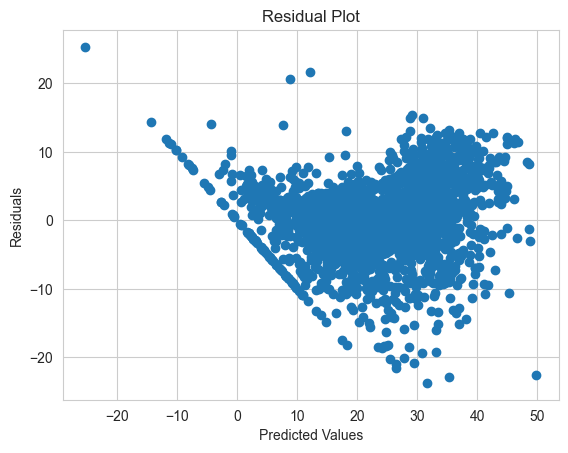

In [109]:
### Heteroscadacity- Residual plo
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

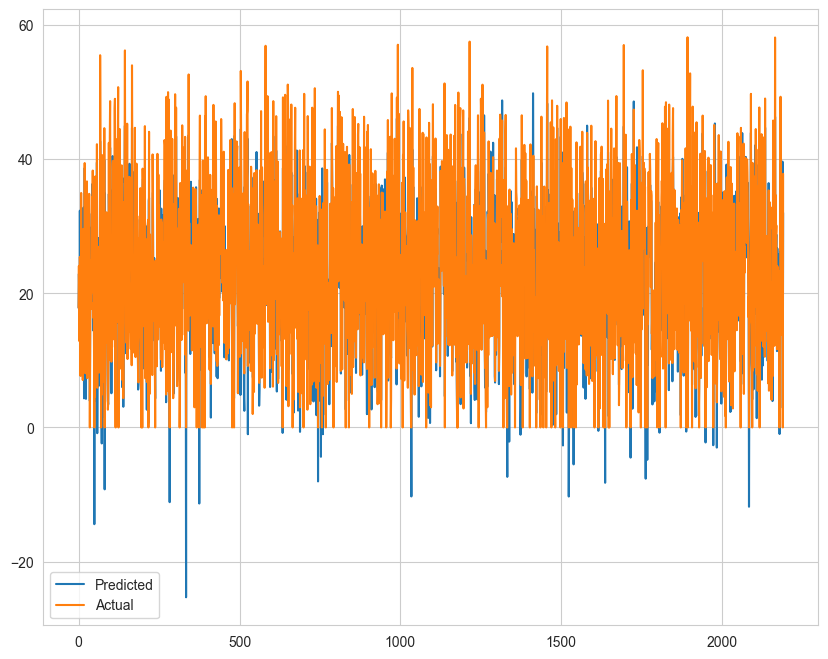

In [110]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **DECISION TREE**

---

### Decision Tree: An Introduction

**Decision Tree** is a non-parametric supervised learning algorithm used for both classification and regression tasks. It models decisions and their possible consequences as a tree-like structure, making it easy to interpret and visualize.

- **Tree Structure**:
  - **Root Node**: Represents the entire dataset and is split into two or more homogeneous sets.
  - **Decision Nodes**: Nodes where the data is split based on a certain feature.
  - **Leaf Nodes**: Terminal nodes that represent the final output (class label or continuous value).

- **Classification Trees**: Predict categorical outcomes by splitting the data based on features to maximize class purity.
- **Regression Trees**: Predict continuous outcomes by splitting the data to minimize variance within each segment.

---

### How Decision Trees Work

1. **Splitting**: The dataset is divided into subsets based on the value of a feature. The goal is to maximize the purity of each subset, meaning that each subset should ideally contain data points of a single class (for classification) or have minimal variance (for regression).

2. **Criteria for Splitting**:
   - **Classification Trees**: Use criteria like **Gini Index** or **Information Gain** (Entropy) to determine the best feature to split the data.
     - **Gini Index**: Measures the impurity of a node. Lower values indicate purer nodes.
     - **Information Gain**: Measures the reduction in entropy or disorder after a split. Higher values indicate better splits.

   - **Regression Trees**: Use criteria like **Mean Squared Error (MSE)** to determine the best split.
     - **MSE**: Measures the variance within the node. The goal is to minimize MSE across splits.

3. **Tree Building**: Continue splitting the data at each node until a stopping criterion is met, such as a maximum depth, minimum number of samples in a node, or if further splits do not improve purity significantly.

4. **Pruning**: After the tree is built, it can be pruned to remove nodes that provide little additional value, which helps to prevent overfitting.

---

### Advantages of Decision Trees

- **Interpretability**: Decision trees are easy to understand and visualize, making them useful for explaining decisions to non-experts.
- **No Need for Feature Scaling**: Decision trees do not require normalization or standardization of features.
- **Handles Both Numerical and Categorical Data**: Capable of dealing with different types of data.

---

### Disadvantages of Decision Trees

- **Overfitting**: Decision trees can easily overfit the training data, especially if the tree is too deep.
- **Instability**: Small changes in the data can lead to different tree structures, making the model less stable.
- **Bias**: Decision trees can be biased towards features with more levels, which can affect performance.

---

### Hyperparameters for Decision Trees

- **`max_depth`**: The maximum depth of the tree. Limiting depth helps prevent overfitting.
- **`min_samples_split`**: The minimum number of samples required to split an internal node.
- **`min_samples_leaf`**: The minimum number of samples required to be at a leaf node.
- **`max_features`**: The number of features to consider when looking for the best split.

---

### Implementation in Python

Now, let's implement a Decision Tree using `DecisionTreeClassifier` or `DecisionTreeRegressor` from the **scikit-learn** library.


In [111]:
from sklearn.tree import DecisionTreeRegressor

decision_regressor = DecisionTreeRegressor(criterion='friedman_mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)


DecisionTreeRegressor(criterion='friedman_mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [112]:
#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [113]:
print(y_pred_train_d)
print(y_pred_test_d)

[26.58412858 33.37274168 10.77426955 ... 38.95042479 26.58412858
 26.58412858]
[26.58412858 21.85146788 17.80022205 ... 38.95042479  0.
 33.37274168]


In [114]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.6181523618875631
MSE : 58.800976990656444
RMSE : 7.6681795095483025
MAE : 5.460102913850494
R2 : 0.6181523618875631
Adjusted R2 : 0.6097738189411184


**Looks like our train set's r2 score value is 0.66, that means our model is not able to capture some of the data variance. Lets save it in a dataframe for later comparisons.**

In [115]:
# storing the test set metrics value in a dataframe for later comparison

# Dictionary for Decision Tree Regression
dict1 = {
    'Model': 'Decision Tree Regression',
    'MAE': round(MAE_d, 3),
    'MSE': round(MSE_d, 3),
    'RMSE': round(RMSE_d, 3),
    'R2_score': round(r2_d, 3),
    'Adjusted R2': round(Adjusted_R2_d, 2)
}

# Convert the dictionary to a DataFrame
df_decision_tree = pd.DataFrame([dict1])  # Use a list to ensure it's treated as a row

# Concatenate the new DataFrame to the existing one
training_df = pd.concat([training_df, df_decision_tree], ignore_index=True)

# Display the updated DataFrame
print(training_df)


                      Model    MAE     MSE   RMSE  R2_score  Adjusted R2
0        Linear regression   4.301  32.145  5.670     0.791         0.79
1         Lasso regression   5.726  53.629  7.323     0.652         0.64
2         Ridge regression   4.301  32.145  5.670     0.791         0.79
3    Elastic Net Regression  4.368  32.814  5.728     0.787         0.78
4  Decision Tree Regression  5.460  58.801  7.668     0.618         0.61


In [116]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 69.05102560372
RMSE : 8.309694675721847
MAE : 5.9495490200498455
R2 : 0.5628752434598789
Adjusted R2 : 0.5532838038906046


**The r2_score for the test set is 0.65. This means our linear model is not performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**


In [117]:
# Dictionary for Decision Tree Regression Test
dict2 = {
    'Model': 'Decision Tree Regression Test',
    'MAE': round(MAE_d, 3),
    'MSE': round(MSE_d, 3),
    'RMSE': round(RMSE_d, 3),
    'R2_score': round(r2_d, 3),
    'Adjusted R2': round(Adjusted_R2_d, 2)
}

# Convert the dictionary to a DataFrame
df_decision_tree_test = pd.DataFrame([dict2])  # Use a list to ensure it's treated as a row

# Concatenate the new DataFrame to the existing one
test_df = pd.concat([test_df, df_decision_tree_test], ignore_index=True)

# Display the updated DataFrame
print(test_df)


                           Model    MAE     MSE   RMSE  R2_score  Adjusted R2
0             Linear regression   4.261  31.221  5.588     0.802         0.80
1               Lasso Regression  5.759  53.441  7.310     0.662         0.65
2               Ridge Regression  4.261  31.218  5.587     0.802         0.80
3    Elastic Net Regression Test  4.350  32.123  5.668     0.797         0.79
4  Decision Tree Regression Test  5.950  69.051  8.310     0.563         0.55


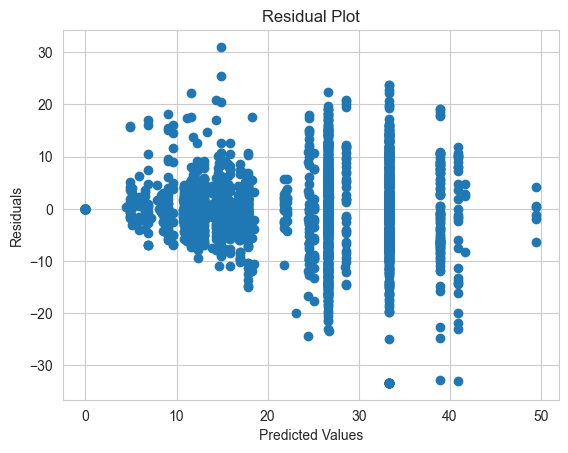

In [118]:
### Heteroscadacity - Residual plot
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

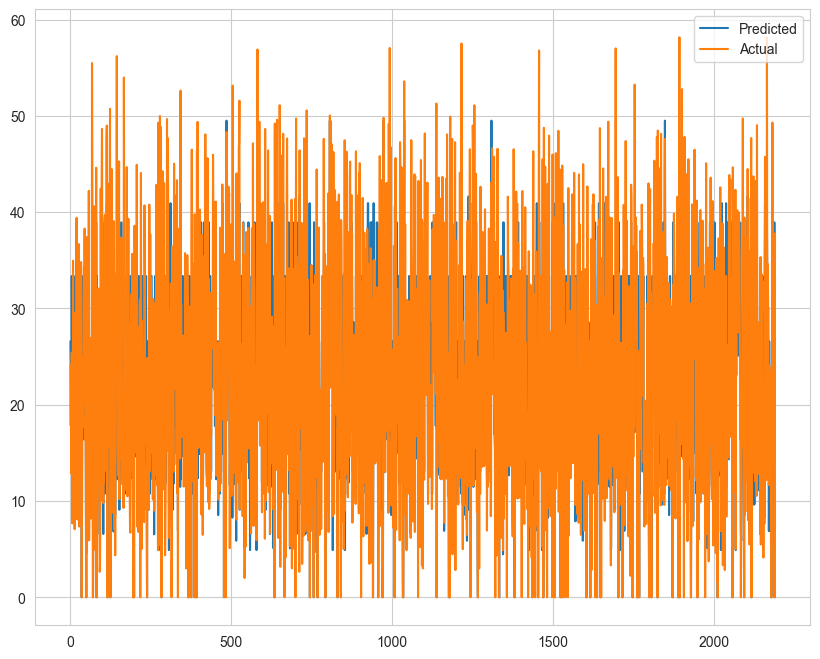

In [119]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **RANDOM FOREST**

### Random Forest: An Introduction

**Random Forest** is an ensemble learning method that combines multiple decision trees to improve the accuracy and robustness of predictions. It is used for both classification and regression tasks and works by aggregating the predictions from multiple decision trees to make a final decision.

- **Ensemble Learning**: Random Forest is an example of ensemble learning, where multiple models (in this case, decision trees) are combined to produce a more accurate and stable model.

---

### How Random Forest Works

1. **Bootstrapping**: Randomly sample the dataset with replacement to create multiple subsets of data (bootstrap samples). Each decision tree in the forest is trained on a different bootstrap sample.

2. **Feature Randomness**: When building each decision tree, a random subset of features is considered for splitting at each node. This introduces diversity among the trees and helps to prevent overfitting.

3. **Tree Building**: Each decision tree is built using the bootstrap sample and the subset of features. Trees are grown to their maximum depth without pruning.

4. **Aggregation**: After all trees have been built, predictions are aggregated:
   - **For Classification**: The majority vote (most common class) is taken as the final prediction.
   - **For Regression**: The average of all tree predictions is used as the final prediction.

---

### Advantages of Random Forest

- **Improved Accuracy**: By averaging multiple trees, Random Forest often achieves higher accuracy than individual decision trees.
- **Robustness**: Random Forest is less prone to overfitting compared to individual decision trees.
- **Feature Importance**: Provides insights into the importance of each feature in the prediction process.
- **Handles Missing Data**: Can handle missing data and maintain good performance.

---

### Disadvantages of Random Forest

- **Complexity**: Random Forest models can be more complex and less interpretable than single decision trees.
- **Computationally Intensive**: Training a large number of trees can be computationally expensive and require more memory.
- **Prediction Speed**: Predictions can be slower compared to simpler models due to the need to aggregate results from multiple trees.

---

### Key Hyperparameters for Random Forest

- **`n_estimators`**: The number of decision trees in the forest. Increasing the number of trees can improve performance but also increase computational cost.
- **`max_depth`**: The maximum depth of each tree. Limiting depth helps control overfitting.
- **`min_samples_split`**: The minimum number of samples required to split an internal node.
- **`min_samples_leaf`**: The minimum number of samples required to be at a leaf node.
- **`max_features`**: The number of features to consider when looking for the best split.
- **`bootstrap`**: Whether to use bootstrapping (sampling with replacement) when building trees.

---

### Implementation in Python

Now, let's implement a Random Forest using `RandomForestClassifier` or `RandomForestRegressor` from the **scikit-learn** library.


In [120]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [121]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)


In [122]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9898962181949295
MSE : 1.5558882185978762
RMSE : 1.2473524837021315
MAE : 0.8004987207973697
R2 : 0.9898962181949295
Adjusted R2 : 0.9896745199013541


**Looks like our train set's r2 score value is 0.98 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**



In [123]:
# storing the test set metrics value in a dataframe for later comparison

# Dictionary for Random Forest Regression
dict1 = {
    'Model': 'Random Forest Regression',
    'MAE': round(MAE_rf, 3),
    'MSE': round(MSE_rf, 3),
    'RMSE': round(RMSE_rf, 3),
    'R2_score': round(r2_rf, 3),
    'Adjusted R2': round(Adjusted_R2_rf, 2)
}

# Convert the dictionary to a DataFrame
df_random_forest = pd.DataFrame([dict1])  # Use a list to ensure it's treated as a row

# Concatenate the new DataFrame to the existing one
training_df = pd.concat([training_df, df_random_forest], ignore_index=True)

# Display the updated DataFrame
print(training_df)

                      Model    MAE     MSE   RMSE  R2_score  Adjusted R2
0        Linear regression   4.301  32.145  5.670     0.791         0.79
1         Lasso regression   5.726  53.629  7.323     0.652         0.64
2         Ridge regression   4.301  32.145  5.670     0.791         0.79
3    Elastic Net Regression  4.368  32.814  5.728     0.787         0.78
4  Decision Tree Regression  5.460  58.801  7.668     0.618         0.61
5  Random Forest Regression  0.800   1.556  1.247     0.990         0.99


**The r2_score for the train set is 0.99. This means our linear model is capturing almost each of the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**


In [124]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 12.57826973966812
RMSE : 3.5465856453310303
MAE : 2.20016437047582
R2 : 0.9203737663622452
Adjusted R2 : 0.9186265987707538


**The r2_score for the test set is 0.92. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [125]:
# Dictionary for Random Forest Regression Test
dict2 = {
    'Model': 'Random Forest Regression',
    'MAE': round(MAE_rf, 3),
    'MSE': round(MSE_rf, 3),
    'RMSE': round(RMSE_rf, 3),
    'R2_score': round(r2_rf, 3),
    'Adjusted R2': round(Adjusted_R2_rf, 2)
}

# Convert the dictionary to a DataFrame
df_random_forest_test = pd.DataFrame([dict2])  # Use a list to ensure it's treated as a row

# Concatenate the new DataFrame to the existing one
test_df = pd.concat([test_df, df_random_forest_test], ignore_index=True)

# Display the updated DataFrame
print(test_df)


                           Model    MAE     MSE   RMSE  R2_score  Adjusted R2
0             Linear regression   4.261  31.221  5.588     0.802         0.80
1               Lasso Regression  5.759  53.441  7.310     0.662         0.65
2               Ridge Regression  4.261  31.218  5.587     0.802         0.80
3    Elastic Net Regression Test  4.350  32.123  5.668     0.797         0.79
4  Decision Tree Regression Test  5.950  69.051  8.310     0.563         0.55
5       Random Forest Regression  2.200  12.578  3.547     0.920         0.92


### Heteroscadacity- Residual plot

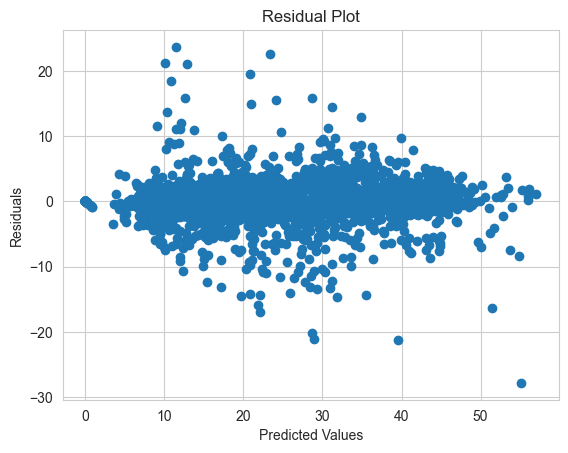

In [126]:
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [127]:
rf_model.feature_importances_

array([3.12356631e-01, 1.58708325e-01, 1.16300017e-02, 1.22522117e-02,
       3.09037507e-02, 3.22279436e-02, 1.33358295e-03, 4.51276116e-03,
       1.32196541e-02, 2.11049927e-02, 2.98008542e-02, 2.59598402e-02,
       8.20707272e-03, 4.16703239e-03, 1.35883813e-02, 9.93495655e-04,
       2.37362204e-03, 1.21215867e-03, 3.31950801e-04, 2.98412284e-04,
       4.22722012e-04, 1.50959527e-03, 3.61846707e-03, 1.03988033e-02,
       3.13391687e-02, 1.76356167e-02, 1.19540062e-02, 1.24597669e-02,
       9.56333051e-03, 3.80822142e-03, 4.32838925e-03, 1.07794105e-03,
       9.79972828e-03, 4.01226713e-03, 1.51736537e-01, 3.09483131e-04,
       3.97512346e-03, 1.37828438e-03, 1.33415409e-03, 2.47872914e-03,
       6.94931080e-04, 2.02647134e-03, 7.32619986e-04, 2.56857933e-03,
       5.28233227e-03, 7.39982323e-04, 1.96320739e-02])

## FEATURES STORED

In [128]:
 
importances = rf_model.feature_importances_

# Assuming 'df' was used to create 'X_train'
feature_names = X.columns  # Use the original DataFrame's columns

importance_dict = {'Feature': feature_names,
                   'Feature Importance': importances}

importance_df = pd.DataFrame(importance_dict)


In [129]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [130]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
0           Temperature                0.31
1              Humidity                0.16
34  Functioning_Day_Yes                0.15
5              Rainfall                0.03
10               Hour_4                0.03
11               Hour_5                0.03
4       Solar_Radiation                0.03
24              Hour_18                0.03
46   weekdays_weekend_1                0.02
25              Hour_19                0.02
9                Hour_3                0.02
14               Hour_8                0.01
3            Visibility                0.01
2            Wind_speed                0.01
8                Hour_2                0.01
32       Seasons_Winter                0.01
44             month_11                0.01
26              Hour_20                0.01
12               Hour_6                0.01
28              Hour_22                0.01
27              Hour_21                0.01
23              Hour_17                0.01
6              Snowfall                0.00
13               Hour_7                0.00
7                Hour_1                0.00
20              Hour_14                0.00
19              Hour_13                0.00
22              Hour_16                0.00
21              Hour_15                0.00
15               Hour_9                0.00
16              Hour_10                0.00
30       Seasons_Spring                0.00
29              Hour_23                0.00
17              Hour_11                0.00
18              Hour_12                0.00
35              month_2                0.00
36              month_3                0.00
31       Seasons_Summer                0.00
33   Holiday_No Holiday                0.00
38              month_5                0.00
37              month_4                0.00
39              month_6                0.00
40              month_7                0.00
42              month_9                0.00
41              month_8                0.00
43             month_10                0.00
45             month_12                0.00

In [131]:
#FIT THE MODEL
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [132]:
features = X.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

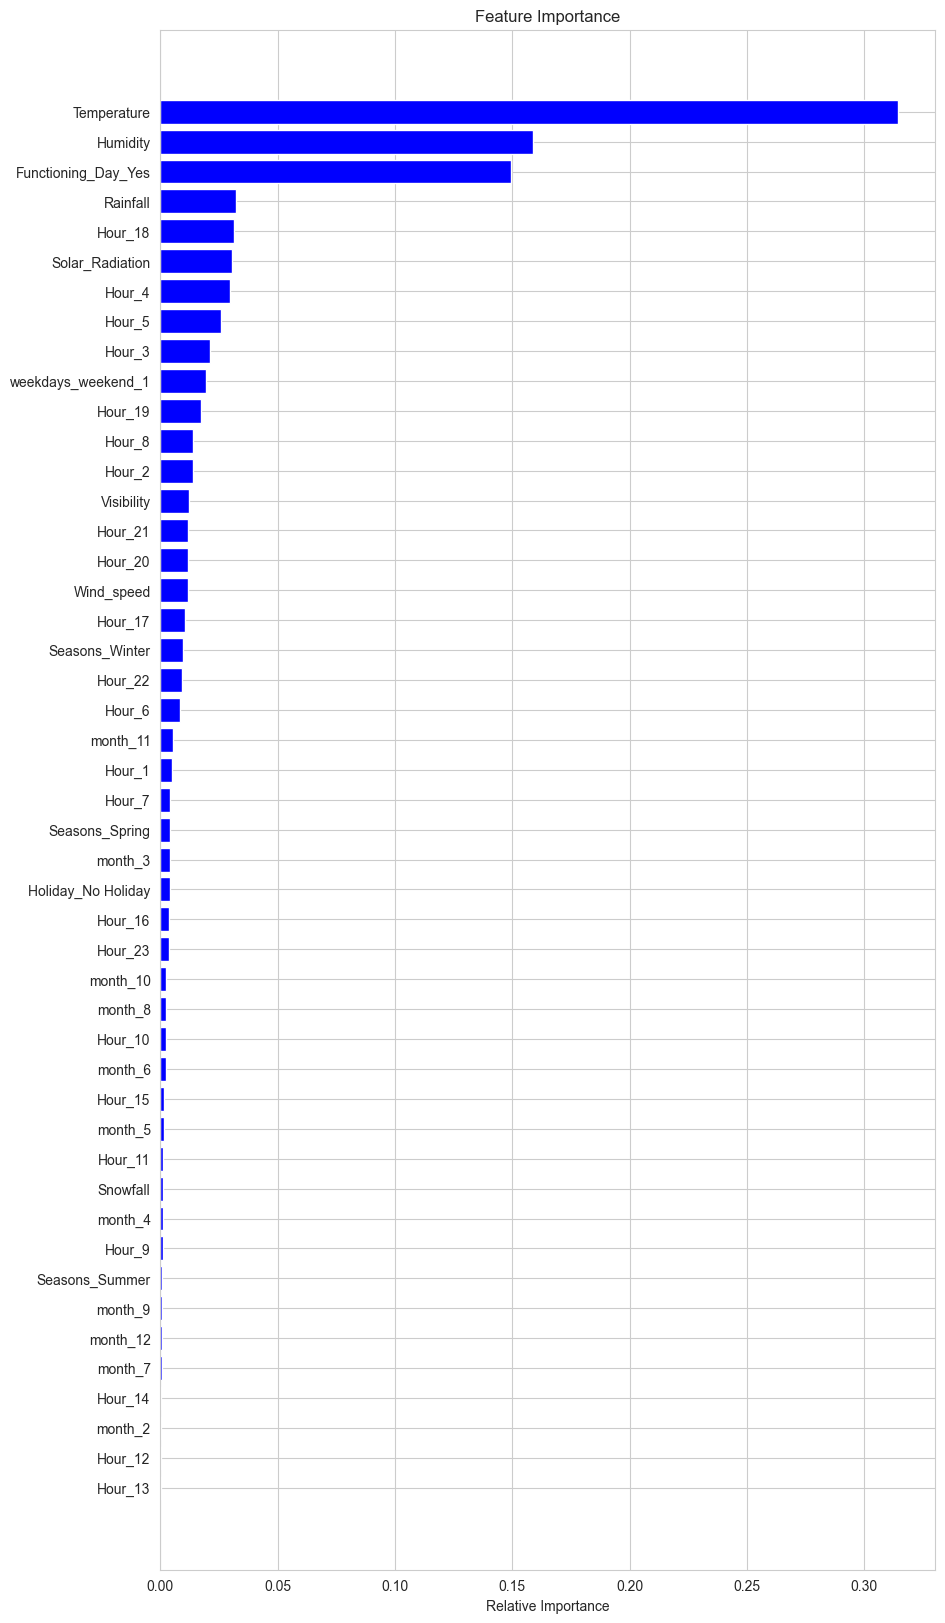

In [133]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# Hyperparameter Tuning for Random Forest Regressor

**Random Forest Regressor** is a robust ensemble learning method used for regression tasks. It constructs multiple decision trees during training and outputs the average prediction of all the trees. Tuning the hyperparameters of a Random Forest Regressor can significantly enhance its performance. Below is an explanation of the key hyperparameters and the tuning process:

#### Key Hyperparameters to Tune:

- **`n_estimators`**: The number of trees in the forest. Increasing the number of trees generally improves the model's performance and stability but may also increase computational cost.

- **`max_depth`**: The maximum depth of each decision tree. Deeper trees can capture more complex relationships but may lead to overfitting. Shallower trees help in reducing overfitting and simplifying the model.

- **`min_samples_split`**: The minimum number of samples required to split an internal node. Higher values prevent the model from learning overly specific patterns and reduce overfitting.

- **`min_samples_leaf`**: The minimum number of samples required to be at a leaf node. Setting this value higher can help in smoothing the model and preventing overfitting.

- **`max_features`**: The number of features to consider when looking for the best split. Limiting the number of features helps in reducing overfitting and improving model generalization.

- **`bootstrap`**: Whether or not to use bootstrap samples (sampling with replacement) when building trees. Setting this to `True` helps in reducing overfitting by introducing randomness.

#### Advantages of Hyperparameter Tuning:

- **Enhanced Performance**: Proper tuning often leads to improved accuracy and generalization of the Random Forest model.

- **Customization**: Allows for optimization based on the specific dataset and problem, leading to more effective models.

#### Disadvantages:

- **Computational Expense**: Tuning multiple hyperparameters can be computationally intensive and time-consuming.

- **Complexity**: The process of finding the optimal combination of hyperparameters requires a good understanding of the model and dataset.

**Practical Application**:
In practice, tuning the hyperparameters of a Random Forest Regressor involves exploring different values for parameters such as `n_estimators`, `max_depth`, and `min_samples_split` to find the best configuration for the model. This process helps in achieving better performance, reducing error rates, and improving overall model accuracy.

---

Effective hyperparameter tuning is key to optimizing the performance of the Random Forest Regressor and achieving reliable and accurate predictions.


In [134]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of trees in the forest
    'max_depth': [10, 20, 30],            # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],      # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],        # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]            # Whether bootstrap samples are used when building trees
}

# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

# Initialize GridSearchCV with the RandomForestRegressor
rf_grid_search = GridSearchCV(estimator=rf_model, 
                              param_grid=param_grid, 
                              cv=3, 
                              n_jobs=-1, 
                              verbose=2)

# Fit the model to the training data
rf_grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params_rf = rf_grid_search.best_params_
rf_best_model = rf_grid_search.best_estimator_

print("Best Parameters for RandomForestRegressor:", best_params_rf)

# Making predictions on train and test data
y_pred_train_rf = rf_best_model.predict(X_train)
y_pred_test_rf = rf_best_model.predict(X_test)

# Calculate evaluation metrics for training set
MSE_rf_train = mean_squared_error(y_train, y_pred_train_rf)
RMSE_rf_train = np.sqrt(MSE_rf_train)
MAE_rf_train = mean_absolute_error(y_train, y_pred_train_rf)
r2_rf_train = r2_score(y_train, y_pred_train_rf)
Adjusted_R2_rf_train = 1 - (1 - r2_rf_train) * ((X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1))

# Store metrics in the training dataframe
dict_train = {
    'Model': 'Random Forest GridSearchCV',
    'MAE': round(MAE_rf_train, 3),
    'MSE': round(MSE_rf_train, 3),
    'RMSE': round(RMSE_rf_train, 3),
    'R2_score': round(r2_rf_train, 3),
    'Adjusted R2': round(Adjusted_R2_rf_train, 2)
}
df_rf_train = pd.DataFrame([dict_train])
training_df = pd.concat([training_df, df_rf_train], ignore_index=True)

# Calculate evaluation metrics for test set
MSE_rf_test = mean_squared_error(y_test, y_pred_test_rf)
RMSE_rf_test = np.sqrt(MSE_rf_test)
MAE_rf_test = mean_absolute_error(y_test, y_pred_test_rf)
r2_rf_test = r2_score(y_test, y_pred_test_rf)
Adjusted_R2_rf_test = 1 - (1 - r2_rf_test) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

# Store metrics in the test dataframe
dict_test = {
    'Model': 'Random Forest GridSearchCV Test',
    'MAE': round(MAE_rf_test, 3),
    'MSE': round(MSE_rf_test, 3),
    'RMSE': round(RMSE_rf_test, 3),
    'R2_score': round(r2_rf_test, 3),
    'Adjusted R2': round(Adjusted_R2_rf_test, 2)
}
df_rf_test = pd.DataFrame([dict_test])
test_df = pd.concat([test_df, df_rf_test], ignore_index=True)

# Display the updated DataFrames with proper formatting
print("Training Metrics:")
print(training_df.to_string(index=False))
print("\nTest Metrics:")
print(test_df.to_string(index=False))


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Parameters for RandomForestRegressor: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Training Metrics:
                     Model   MAE    MSE  RMSE  R2_score  Adjusted R2
        Linear regression  4.301 32.145 5.670     0.791         0.79
         Lasso regression  5.726 53.629 7.323     0.652         0.64
         Ridge regression  4.301 32.145 5.670     0.791         0.79
    Elastic Net Regression 4.368 32.814 5.728     0.787         0.78
  Decision Tree Regression 5.460 58.801 7.668     0.618         0.61
  Random Forest Regression 0.800  1.556 1.247     0.990         0.99
Random Forest GridSearchCV 0.824  1.667 1.291     0.989         0.99

Test Metrics:
                          Model   MAE    MSE  RMSE  R2_score  Adjusted R2
             Linear regression  4.261 31.221 5.588     0.802         0.80
               Lasso Regression 5.759 53.441 7.310     0

**Looks like after hyper tuning our train set's r2 score value is 0.99 which is prety good that means our model is  able to capture almost every data variance.
Again for the test set's r2 score value is 0.92 which is again impressive Lets save it in a dataframe for later comparisons.**


## Visualization after Hyper-Tuned Model

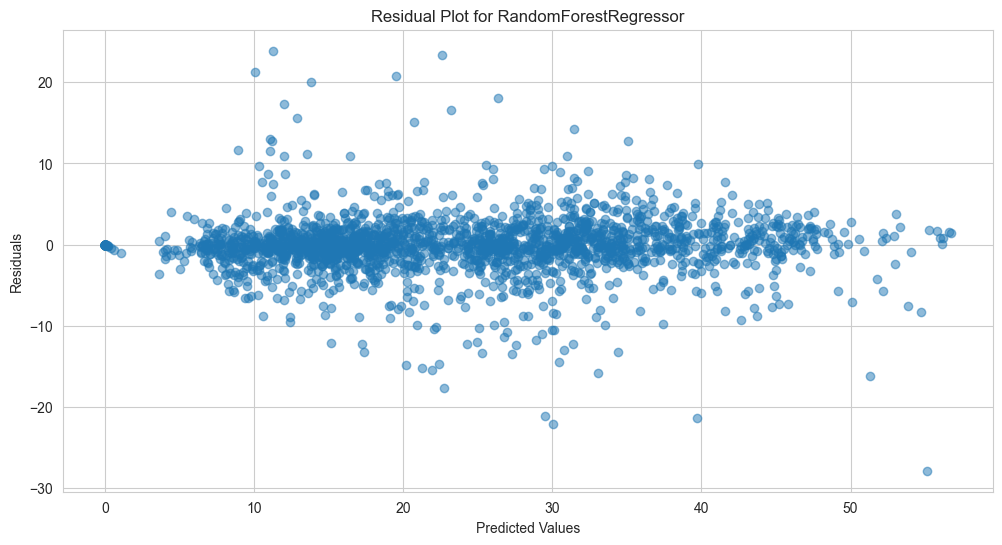

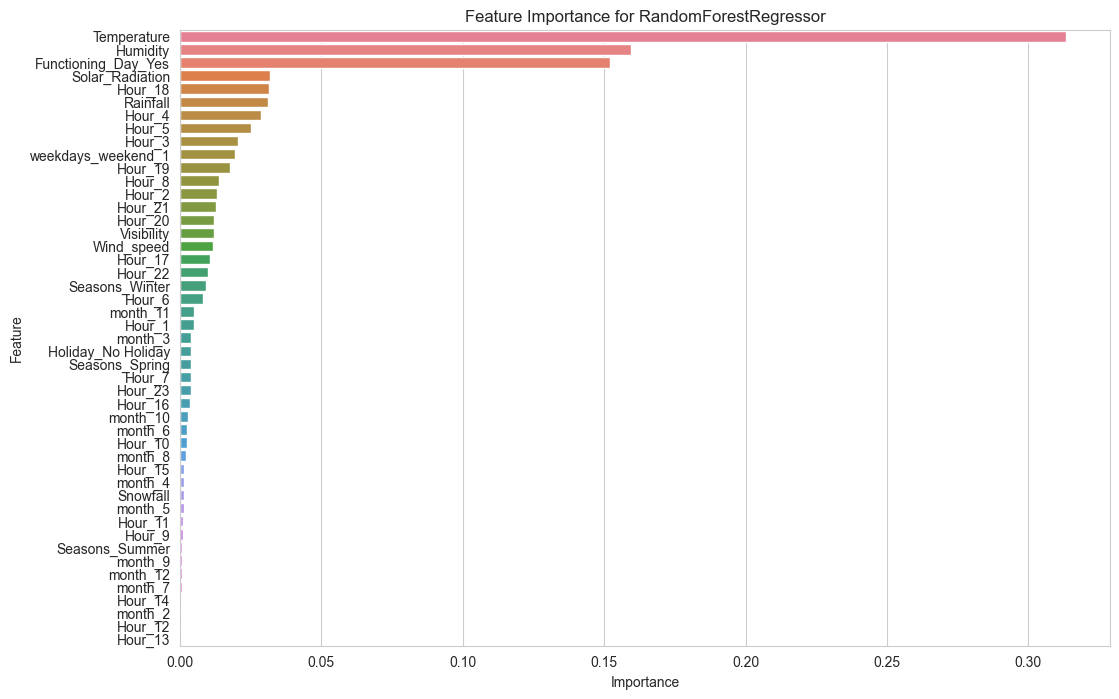

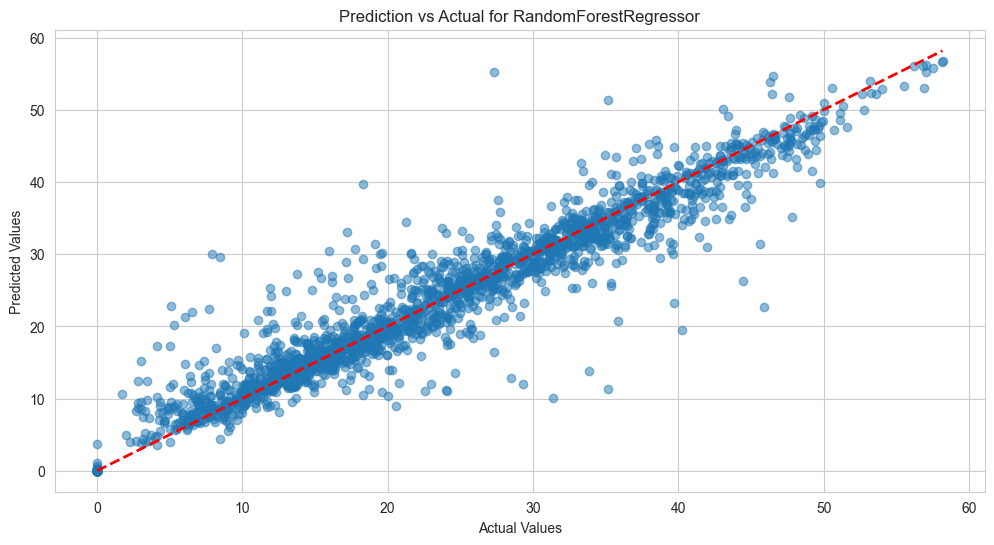

In [135]:
# Residual Plot for RandomForestRegressor
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_test_rf, y_test - y_pred_test_rf, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for RandomForestRegressor')
plt.show()

# Feature Importance for RandomForestRegressor
importances = rf_best_model.feature_importances_
importance_df_rf = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df_rf, palette='husl')
plt.title('Feature Importance for RandomForestRegressor')
plt.show()

# Prediction vs Actual Plot for RandomForestRegressor
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_test_rf, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction vs Actual for RandomForestRegressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()


# Hyperparameter

### Hyperparameter Tuning: An Introduction

**Hyperparameter Tuning** refers to the process of selecting the best set of hyperparameters for a machine learning model to optimize its performance. Hyperparameters are parameters that are not learned from the data but are set before the training process begins.

---

### Importance of Hyperparameter Tuning

- **Model Performance**: Proper tuning can significantly improve the performance of a model, leading to better accuracy and generalization.
- **Avoid Overfitting**: Helps in finding the right balance between model complexity and training data, preventing overfitting or underfitting.
- **Optimization**: Enhances the efficiency of the training process and the effectiveness of the model in making predictions.

---

### Common Hyperparameters and Their Tuning

- **Learning Rate (eta)**: Controls the step size in gradient descent. Lower values require more trees but can lead to better performance.
- **Number of Estimators**: Number of trees in ensemble methods like Random Forest and XGBoost. More trees can improve performance but also increase computation time.
- **Max Depth**: The maximum depth of trees in tree-based algorithms. Helps control overfitting by limiting the complexity of the model.
- **Min Samples Split/Leaf**: Minimum number of samples required to split an internal node or to be at a leaf node. Helps in controlling overfitting.
- **Subsample**: Fraction of samples used for training each tree. Helps in improving generalization by preventing overfitting.
- **Regularization Parameters**: L1 (alpha) and L2 (lambda) regularization parameters for controlling model complexity.

---


### **Provide the range of values for chosen hyperparameters**

In [136]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [137]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

# Gradient Boosting Regressor

**Gradient Boosting Regressor** is a powerful ensemble learning technique used for regression tasks. It builds models sequentially, where each new model aims to correct the errors made by the previous models. The main idea is to combine the predictions of several base estimators (typically decision trees) to improve the overall predictive accuracy.

#### Key Characteristics:
- **Sequential Learning**: Models are built in a sequence, with each new model reducing the errors of the previous one.
- **Loss Function**: It minimizes a differentiable loss function, which can be tailored for different types of regression tasks.
- **Learning Rate**: A hyperparameter that controls the contribution of each model. Lower learning rates require more trees but can lead to better performance.
- **Number of Estimators**: The total number of decision trees used. More trees can lead to higher accuracy but also increase the risk of overfitting.

#### Advantages:
- **High Accuracy**: Gradient Boosting often provides better performance than other regression models.
- **Flexibility**: Can handle various types of data and loss functions.

#### Disadvantages:
- **Complexity**: Tuning the hyperparameters can be challenging and computationally expensive.
- **Overfitting**: If not carefully tuned, the model can easily overfit the training data.

**Practical Application**:
In our analysis, the Gradient Boosting Regressor with GridSearchCV showed promising results with an R² score of 0.91, making it a robust choice for predicting bike rental counts.

---

Gradient Boosting is an effective technique but requires careful tuning and validation to ensure optimal performance.


### **Importing Gradient Boosting Regressor**

In [138]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
param_dict = {'learning_rate': [0.1, 0.01],
              'n_estimators': [50, 100],
              'max_depth': [3, 5]}

gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid=param_dict,
                       cv=3, verbose=2, n_jobs=-1)

gb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [3, 5],
                         'n_estimators': [50, 100]},
             verbose=2)

In [139]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=5)

In [140]:
gb_optimal_model = gb_grid.best_estimator_

In [141]:
gb_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [142]:
# Making predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

In [143]:
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.940843120722907
MSE : 9.109607995498804
RMSE : 3.018212715415997
MAE : 2.1783965311680302
R2 : 0.940843120722907
Adjusted R2 : 0.9395450939600576


**Looks like our train set's r2 score value is 0.94 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [144]:
# storing the test set metrics value in a dataframe for later comparison

# Dictionary for Gradient Boosting GridSearchCV
dict1 = {
    'Model': 'Gradient Boosting GridSearchCV',
    'MAE': round(MAE_gbh, 3),
    'MSE': round(MSE_gbh, 3),
    'RMSE': round(RMSE_gbh, 3),
    'R2_score': round(r2_gbh, 3),
    'Adjusted R2': round(Adjusted_R2_gbh, 2)
}

# Convert the dictionary to a DataFrame
df_gbh = pd.DataFrame([dict1])  # Use a list to ensure it's treated as a row

# Concatenate the new DataFrame to the existing one
training_df = pd.concat([training_df, df_gbh], ignore_index=True)

# Display the updated DataFrame
print(training_df)


                            Model    MAE     MSE   RMSE  R2_score  Adjusted R2
0              Linear regression   4.301  32.145  5.670     0.791         0.79
1               Lasso regression   5.726  53.629  7.323     0.652         0.64
2               Ridge regression   4.301  32.145  5.670     0.791         0.79
3          Elastic Net Regression  4.368  32.814  5.728     0.787         0.78
4        Decision Tree Regression  5.460  58.801  7.668     0.618         0.61
5        Random Forest Regression  0.800   1.556  1.247     0.990         0.99
6      Random Forest GridSearchCV  0.824   1.667  1.291     0.989         0.99
7  Gradient Boosting GridSearchCV  2.178   9.110  3.018     0.941         0.94


In [145]:
from sklearn.metrics import mean_squared_error
MSE_gbh= mean_squared_error(y_test, y_pred_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_test, y_pred_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_g_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 13.543266882561937
RMSE : 3.6801177810719508
MAE : 2.63001008923837
R2 : 0.9142648905351113
Adjusted R2 : 0.9123836813171609


**Hyperparameter tunning certainly showed a better result, r2 was 0.91 on test and mae and rmse was lowered. Overall model show good result.**

In [146]:
# Example metrics (replace these with your actual calculations)
MAE_gbh = mean_absolute_error(y_test, y_pred_g_g)
MSE_gbh = mean_squared_error(y_test, y_pred_g_g)
RMSE_gbh = np.sqrt(MSE_gbh)
r2_gbh = r2_score(y_test, y_pred_g_g)
Adjusted_R2_gbh = 1 - (1 - r2_gbh) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

# Dictionary for Gradient Boosting GridSearchCV Test
dict_gbh_test = {
    'Model': 'Gradient Boosting GridSearchCV Test',
    'MAE': round(MAE_gbh, 3),
    'MSE': round(MSE_gbh, 3),
    'RMSE': round(RMSE_gbh, 3),
    'R2_score': round(r2_gbh, 3),
    'Adjusted R2': round(Adjusted_R2_gbh, 2)
}

# Convert the dictionary to a DataFrame
df_gbh_test = pd.DataFrame([dict_gbh_test])

# Concatenate the new DataFrame to the existing one
test_df = pd.concat([test_df, df_gbh_test], ignore_index=True)

# Display the updated DataFrame with proper formatting
print("Test Metrics:")
print(test_df.to_string(index=False))


Test Metrics:
                              Model   MAE    MSE  RMSE  R2_score  Adjusted R2
                 Linear regression  4.261 31.221 5.588     0.802         0.80
                   Lasso Regression 5.759 53.441 7.310     0.662         0.65
                   Ridge Regression 4.261 31.218 5.587     0.802         0.80
        Elastic Net Regression Test 4.350 32.123 5.668     0.797         0.79
      Decision Tree Regression Test 5.950 69.051 8.310     0.563         0.55
           Random Forest Regression 2.200 12.578 3.547     0.920         0.92
    Random Forest GridSearchCV Test 2.196 12.664 3.559     0.920         0.92
Gradient Boosting GridSearchCV Test 2.630 13.543 3.680     0.914         0.91


### Heteroscadacity

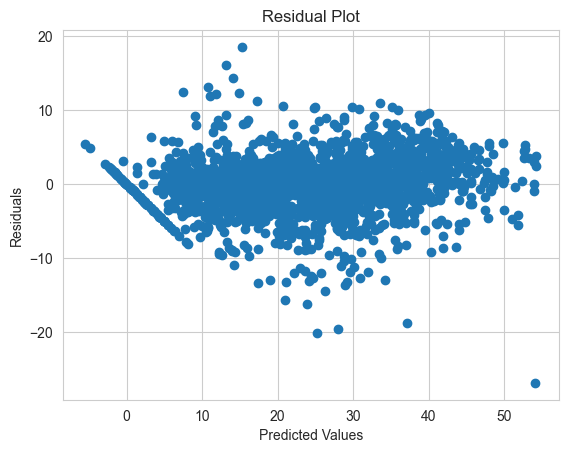

In [147]:
plt.scatter((y_pred_g_g),(y_test)-(y_pred_g_g))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [148]:
gb_optimal_model.feature_importances_

array([3.10636671e-01, 1.56820786e-01, 1.99190990e-03, 4.02184994e-03,
       3.57485624e-02, 4.42741816e-02, 9.26187851e-04, 1.00132162e-03,
       6.79980182e-03, 1.63225131e-02, 2.94736862e-02, 2.38019384e-02,
       5.80604129e-03, 5.25208051e-03, 1.21095863e-02, 1.13420840e-04,
       3.49758696e-03, 1.57374676e-03, 1.44499200e-04, 8.15950195e-05,
       6.88381029e-05, 4.31605611e-05, 1.45305900e-03, 8.34812156e-03,
       3.04332622e-02, 1.88706836e-02, 1.26614174e-02, 1.56645271e-02,
       1.03007874e-02, 1.55299811e-03, 1.65713810e-03, 2.36752847e-04,
       2.22556694e-02, 3.96542673e-03, 1.63386182e-01, 1.38809222e-05,
       1.51338059e-03, 4.09108965e-04, 1.03041770e-03, 4.26654878e-03,
       1.09985016e-03, 5.55138318e-03, 1.24183766e-04, 7.54634757e-03,
       5.61568510e-03, 1.05082153e-03, 2.04824012e-02])

## FEATURES STORED

In [149]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [150]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [151]:
importance_df.head()

Feature  Feature Importance
0      Temperature                0.31
1         Humidity                0.16
2       Wind_speed                0.00
3       Visibility                0.00
4  Solar_Radiation                0.04

In [152]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
0           Temperature                0.31
1              Humidity                0.16
34  Functioning_Day_Yes                0.16
5              Rainfall                0.04
4       Solar_Radiation                0.04
24              Hour_18                0.03
10               Hour_4                0.03
25              Hour_19                0.02
27              Hour_21                0.02
46   weekdays_weekend_1                0.02
32       Seasons_Winter                0.02
9                Hour_3                0.02
11               Hour_5                0.02
13               Hour_7                0.01
12               Hour_6                0.01
41              month_8                0.01
26              Hour_20                0.01
43             month_10                0.01
44             month_11                0.01
8                Hour_2                0.01
14               Hour_8                0.01
28              Hour_22                0.01
23              Hour_17                0.01
7                Hour_1                0.00
2            Wind_speed                0.00
3            Visibility                0.00
6              Snowfall                0.00
22              Hour_16                0.00
21              Hour_15                0.00
15               Hour_9                0.00
16              Hour_10                0.00
30       Seasons_Spring                0.00
29              Hour_23                0.00
17              Hour_11                0.00
18              Hour_12                0.00
19              Hour_13                0.00
20              Hour_14                0.00
31       Seasons_Summer                0.00
33   Holiday_No Holiday                0.00
38              month_5                0.00
37              month_4                0.00
36              month_3                0.00
35              month_2                0.00
42              month_9                0.00
40              month_7                0.00
39              month_6                0.00
45             month_12                0.00

In [153]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [154]:
features = X.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

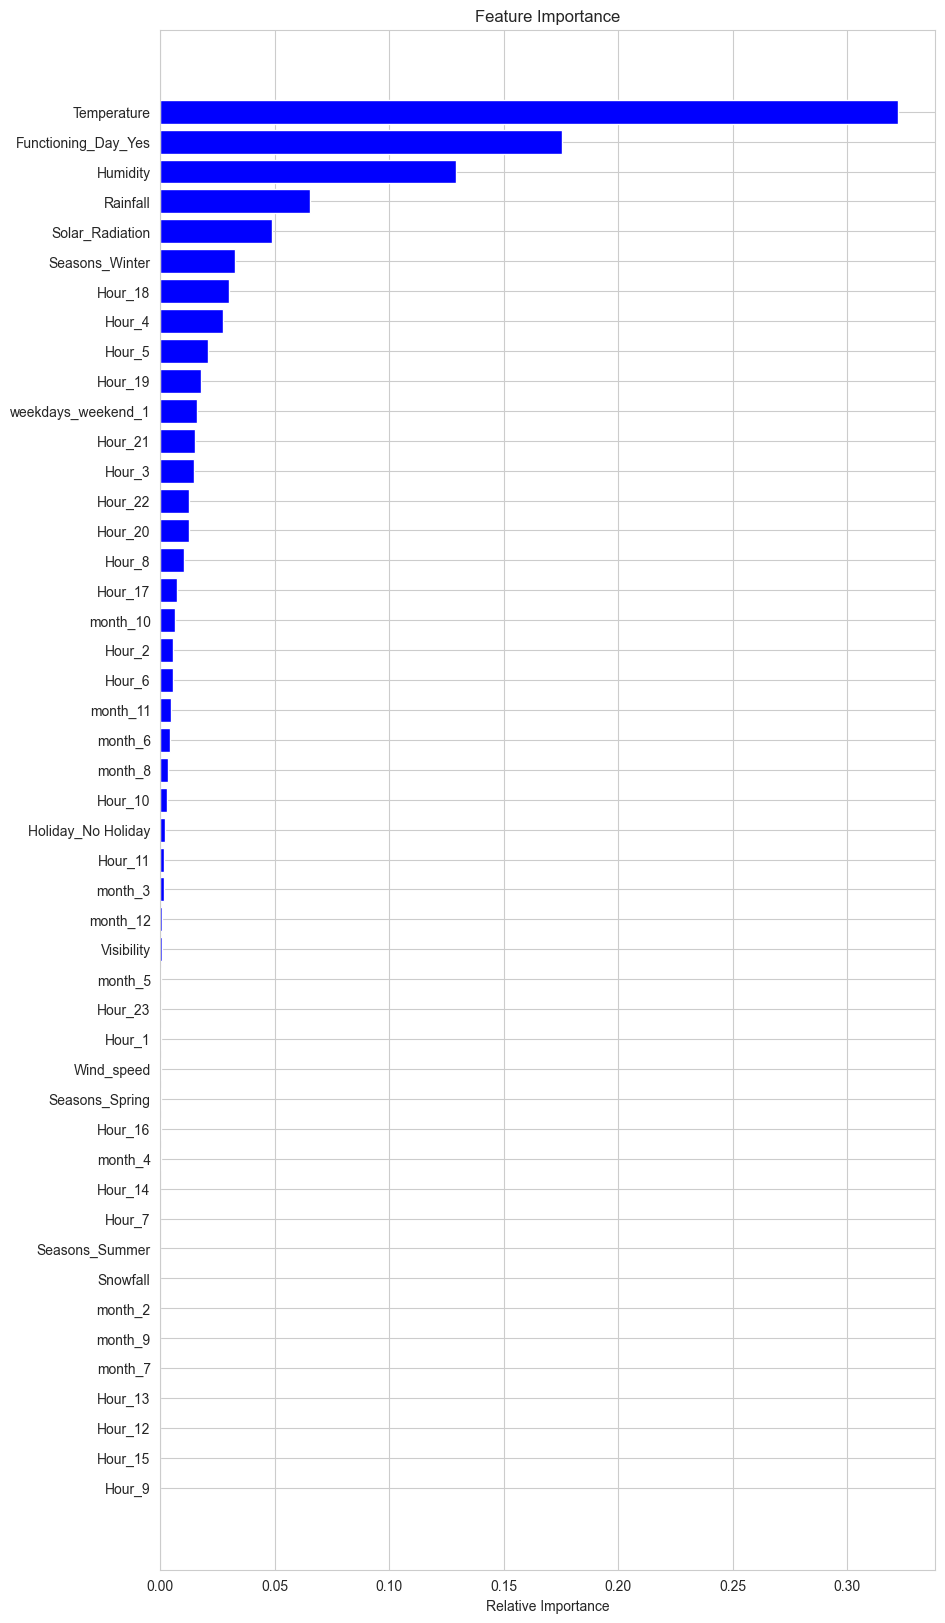

In [155]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## Visualization for Hyper-Tuned Model

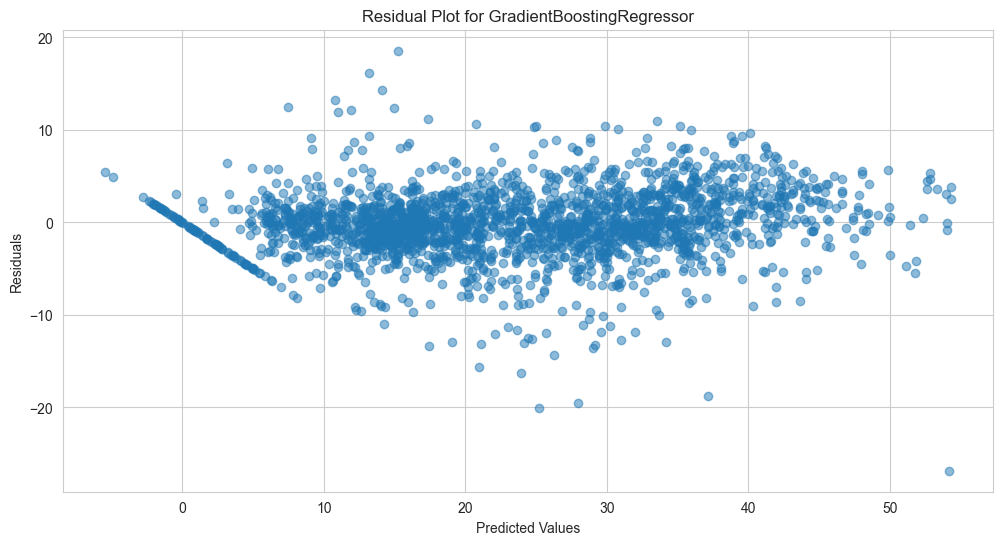

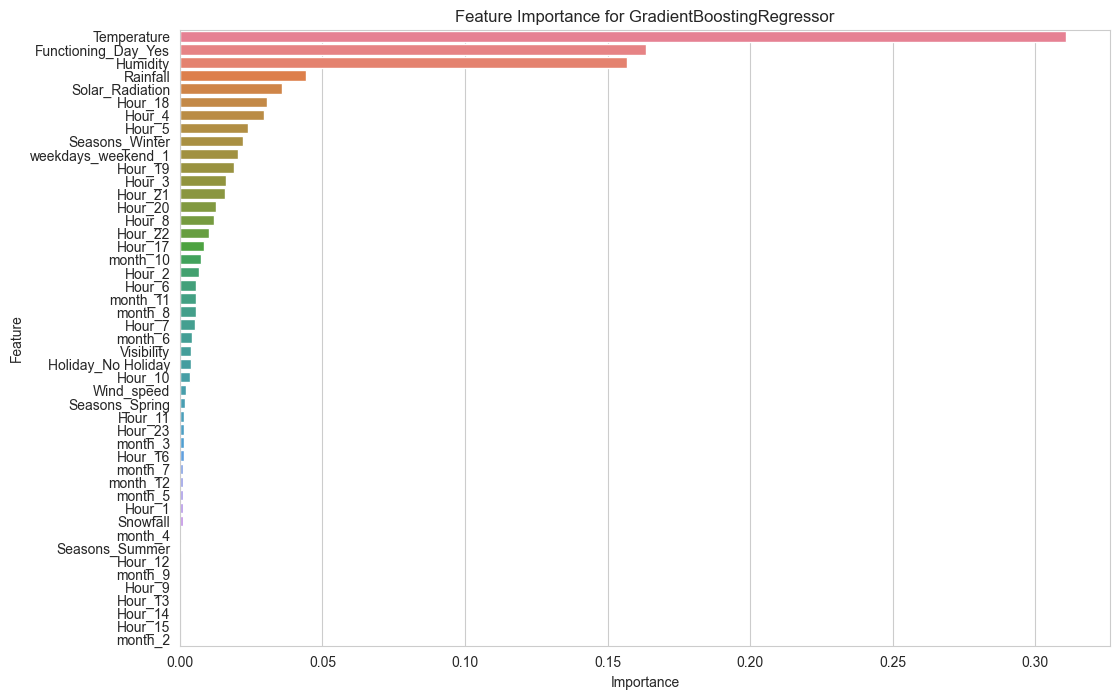

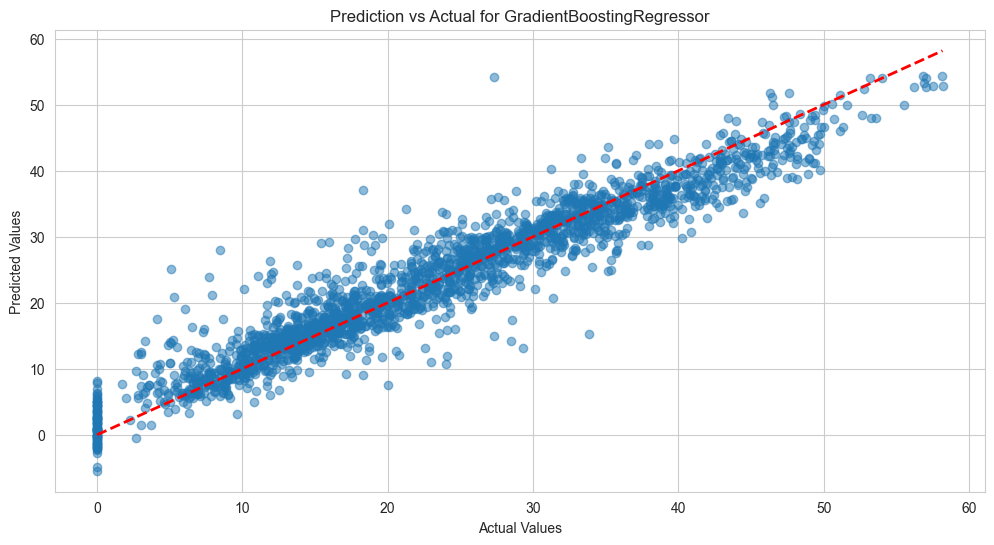

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residual Plot for GradientBoostingRegressor
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_g_g, y_test - y_pred_g_g, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for GradientBoostingRegressor')
plt.show()

# Feature Importance for GradientBoostingRegressor
importances = gb_optimal_model.feature_importances_
importance_df_gb = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df_gb = importance_df_gb.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df_gb, palette='husl')
plt.title('Feature Importance for GradientBoostingRegressor')
plt.show()

# Prediction vs Actual Plot for GradientBoostingRegressor
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_g_g, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction vs Actual for GradientBoostingRegressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()

# XGBoost

### XGBoost: An Introduction

**XGBoost** (Extreme Gradient Boosting) is an advanced machine learning algorithm that enhances the performance of decision trees by implementing gradient boosting techniques. It is widely used for both classification and regression tasks and is known for its efficiency and accuracy.

- **Gradient Boosting**: XGBoost is an implementation of gradient boosting, which builds models sequentially, where each model tries to correct the errors of the previous ones.

---

### How XGBoost Works

1. **Boosting**: XGBoost builds a series of decision trees, where each tree attempts to improve on the errors made by the previous trees. This process continues until a predefined number of trees is reached or improvements become negligible.

2. **Objective Function**: XGBoost optimizes a specific objective function that consists of a loss function (measuring prediction error) and a regularization term (penalizing model complexity). The goal is to minimize this objective function.

3. **Regularization**: XGBoost includes regularization terms in the objective function to control overfitting. It applies both L1 regularization (Lasso) and L2 regularization (Ridge) to the tree weights.

4. **Tree Pruning**: XGBoost uses a depth-first approach to grow trees, which allows for more efficient pruning by stopping tree growth when adding more nodes does not improve performance.

5. **Learning Rate**: The learning rate (or eta) controls the contribution of each tree to the final model. A lower learning rate means each tree has a smaller impact, and more trees are needed to converge to the optimal solution.

---

### Advantages of XGBoost

- **High Performance**: XGBoost is known for its high performance and predictive accuracy. It often provides better results compared to other machine learning algorithms.
- **Speed**: It is optimized for both speed and memory efficiency, making it suitable for large datasets.
- **Flexibility**: Supports a variety of objective functions and evaluation metrics, including custom objective functions.
- **Handling Missing Values**: Automatically handles missing values during training and prediction.

---

### Disadvantages of XGBoost

- **Complexity**: The model can become complex, and tuning hyperparameters may require careful experimentation.
- **Interpretability**: The resulting model can be less interpretable compared to simpler models like single decision trees.

---

### Key Hyperparameters for XGBoost

- **`n_estimators`**: The number of boosting rounds or trees to build.
- **`learning_rate` (eta)**: The step size shrinkage used to prevent overfitting. Smaller values require more trees.
- **`max_depth`**: The maximum depth of the trees. Higher values can lead to overfitting.
- **`subsample`**: The fraction of samples used to grow each tree. Values less than 1.0 help prevent overfitting.
- **`colsample_bytree`**: The fraction of features used for each tree. Helps in reducing overfitting.
- **`lambda`**: L2 regularization term on weights (Ridge regularization).
- **`alpha`**: L1 regularization term on weights (Lasso regularization).
- **`objective`**: The objective function to be minimized (e.g., regression, classification).

---

### Implementation in Python

Now, let's implement XGBoost using the `XGBClassifier` or `XGBRegressor` from the **xgboost** library.


In [157]:
from xgboost import XGBRegressor

### Train the XGBoost Regressor and make predictions

In [158]:
# Create an instance of the XGBRegressor
xgb_model = XGBRegressor()

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on train and test data
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)


### Calculate metrics for the training set

In [159]:
# Calculate MSE
MSE_xgb = mean_squared_error(y_train, y_pred_train_xgb)
print("MSE (Train):", MSE_xgb)

# Calculate RMSE
RMSE_xgb = np.sqrt(MSE_xgb)
print("RMSE (Train):", RMSE_xgb)

# Calculate MAE
MAE_xgb = mean_absolute_error(y_train, y_pred_train_xgb)
print("MAE (Train):", MAE_xgb)

# Calculate R2 and Adjusted R2
r2_xgb = r2_score(y_train, y_pred_train_xgb)
print("R2 (Train):", r2_xgb)
Adjusted_R2_xgb = 1 - (1 - r2_xgb) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))
print("Adjusted R2 (Train):", Adjusted_R2_xgb)

MSE (Train): 2.4815302298346524
RMSE (Train): 1.575287348338281
MAE (Train): 1.0987167166763578
R2 (Train): 0.9838851919532299
Adjusted R2 (Train): 0.9835315990595799


**Looks like our train set's r2 score value is 0.98 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**


### Store the training metrics in a DataFrame

In [160]:
# Dictionary for XGBoost Regression
dict1 = {
    'Model': 'XGBoost Regression',
    'MAE': round(MAE_xgb, 3),
    'MSE': round(MSE_xgb, 3),
    'RMSE': round(RMSE_xgb, 3),
    'R2_score': round(r2_xgb, 3),
    'Adjusted R2': round(Adjusted_R2_xgb, 2)
}

# Convert the dictionary to a DataFrame
df_xgb_train = pd.DataFrame([dict1])

# Concatenate the new DataFrame to the existing one
training_df = pd.concat([training_df, df_xgb_train], ignore_index=True)

training_df = training_df.drop_duplicates(subset='Model', keep='last')

# Display the updated DataFrame
print(training_df)

                            Model    MAE     MSE   RMSE  R2_score  Adjusted R2
0              Linear regression   4.301  32.145  5.670     0.791         0.79
1               Lasso regression   5.726  53.629  7.323     0.652         0.64
2               Ridge regression   4.301  32.145  5.670     0.791         0.79
3          Elastic Net Regression  4.368  32.814  5.728     0.787         0.78
4        Decision Tree Regression  5.460  58.801  7.668     0.618         0.61
5        Random Forest Regression  0.800   1.556  1.247     0.990         0.99
6      Random Forest GridSearchCV  0.824   1.667  1.291     0.989         0.99
7  Gradient Boosting GridSearchCV  2.178   9.110  3.018     0.941         0.94
8              XGBoost Regression  1.099   2.482  1.575     0.984         0.98


### Calculate metrics for the test set

In [161]:
# Calculate MSE
MSE_xgb_test = mean_squared_error(y_test, y_pred_test_xgb)
print("MSE (Test):", MSE_xgb_test)

# Calculate RMSE
RMSE_xgb_test = np.sqrt(MSE_xgb_test)
print("RMSE (Test):", RMSE_xgb_test)

# Calculate MAE
MAE_xgb_test = mean_absolute_error(y_test, y_pred_test_xgb)
print("MAE (Test):", MAE_xgb_test)

# Calculate R2 and Adjusted R2
r2_xgb_test = r2_score(y_test, y_pred_test_xgb)
print("R2 (Test):", r2_xgb_test)
Adjusted_R2_xgb_test = 1 - (1 - r2_xgb_test) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))
print("Adjusted R2 (Test):", Adjusted_R2_xgb_test)


MSE (Test): 11.313060007274306
RMSE (Test): 3.3634892607639326
MAE (Test): 2.2458945274065183
R2 (Test): 0.9283831259830391
Adjusted R2 (Test): 0.9268117006427976


**The r2_score for the test set is 0.928. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**



### Store the test metrics in a DataFrame

In [162]:
# Dictionary for XGBoost Regression Test

# Set pandas display option to prevent column wrapping
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Set a larger width for the display

# Create the dictionary
dict2 = {
    'Model': 'XGBoost Regression',
    'MAE': round(MAE_xgb_test, 3),
    'MSE': round(MSE_xgb_test, 3),
    'RMSE': round(RMSE_xgb_test, 3),
    'R2_score': round(r2_xgb_test, 3),
    'Adjusted R2': round(Adjusted_R2_xgb_test, 2)
}

# Convert the dictionary to a DataFrame
df_xgb_test = pd.DataFrame([dict2])

# Concatenate the DataFrames
test_df = pd.concat([test_df, df_xgb_test], ignore_index=True)

# Display the updated DataFrame
print(test_df)

                                 Model    MAE     MSE   RMSE  R2_score  Adjusted R2
0                   Linear regression   4.261  31.221  5.588     0.802         0.80
1                     Lasso Regression  5.759  53.441  7.310     0.662         0.65
2                     Ridge Regression  4.261  31.218  5.587     0.802         0.80
3          Elastic Net Regression Test  4.350  32.123  5.668     0.797         0.79
4        Decision Tree Regression Test  5.950  69.051  8.310     0.563         0.55
5             Random Forest Regression  2.200  12.578  3.547     0.920         0.92
6      Random Forest GridSearchCV Test  2.196  12.664  3.559     0.920         0.92
7  Gradient Boosting GridSearchCV Test  2.630  13.543  3.680     0.914         0.91
8                   XGBoost Regression  2.246  11.313  3.363     0.928         0.93


### Residual Plot for XGBoost

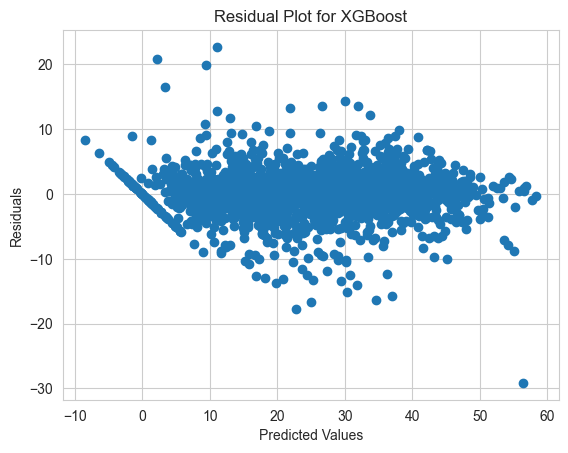

In [163]:
# Residual Plot for XGBoost
plt.scatter(y_pred_test_xgb, y_test - y_pred_test_xgb)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for XGBoost')
plt.show()

### Feature Importance for XGBoost

In [164]:
# Get feature importances from the XGBoost model
importances_xgb = xgb_model.feature_importances_

# Assuming 'df' was used to create 'X_train'
feature_names_xgb = X.columns  # Use the original DataFrame's columns

# Create a DataFrame for feature importances
importance_dict_xgb = {'Feature': feature_names_xgb,
                       'Feature Importance': importances_xgb}

importance_df_xgb = pd.DataFrame(importance_dict_xgb)
importance_df_xgb['Feature Importance'] = round(importance_df_xgb['Feature Importance'], 2)

# Sort the DataFrame by feature importance
importance_df_xgb = importance_df_xgb.sort_values(by=['Feature Importance'], ascending=False)

# Display the DataFrame
print(importance_df_xgb)

                Feature  Feature Importance
34  Functioning_Day_Yes                0.16
24              Hour_18                0.10
10               Hour_4                0.08
25              Hour_19                0.07
11               Hour_5                0.06
27              Hour_21                0.05
32       Seasons_Winter                0.05
26              Hour_20                0.04
9                Hour_3                0.04
23              Hour_17                0.03
28              Hour_22                0.03
5              Rainfall                0.03
8                Hour_2                0.02
1              Humidity                0.02
0           Temperature                0.02
16              Hour_10                0.02
41              month_8                0.02
17              Hour_11                0.02
14               Hour_8                0.02
4       Solar_Radiation                0.01
13               Hour_7                0.01
12               Hour_6         

### Plotting Feature Importance for XGBoost

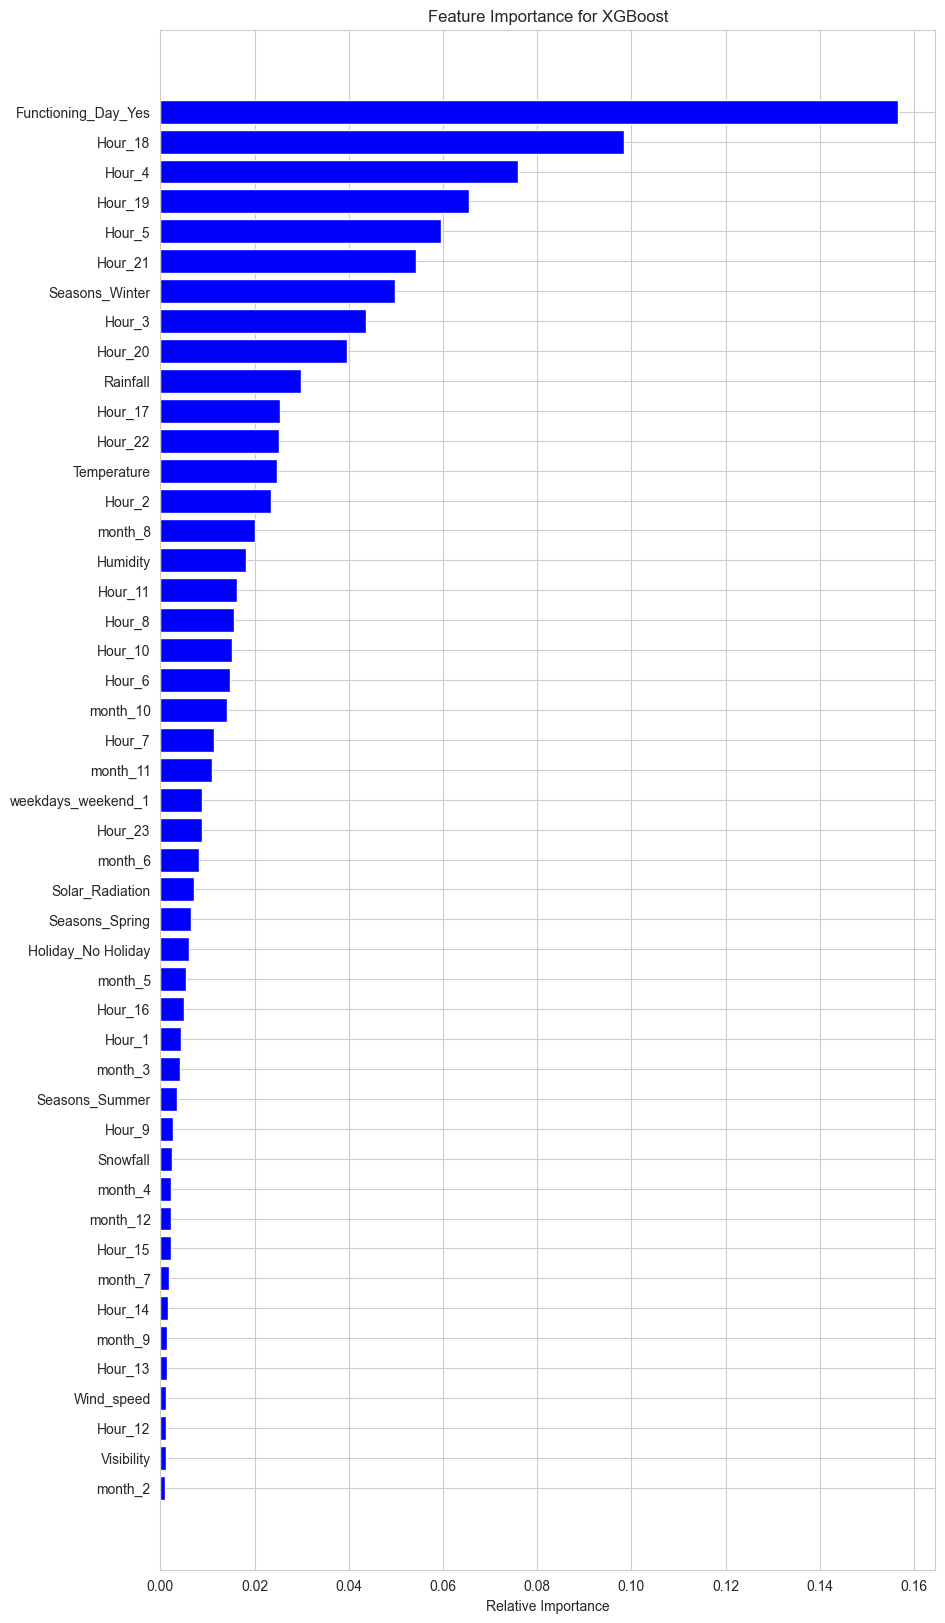

In [165]:
# FIT THE MODEL (already fitted previously)
xgb_model.fit(X_train, y_train)

# Get feature importances and indices for sorting
importances_xgb = xgb_model.feature_importances_
indices_xgb = np.argsort(importances_xgb)

# Plot the figure
plt.figure(figsize=(10, 20))
plt.title('Feature Importance for XGBoost')
plt.barh(range(len(indices_xgb)), importances_xgb[indices_xgb], color='blue', align='center')
plt.yticks(range(len(indices_xgb)), [feature_names_xgb[i] for i in indices_xgb])
plt.xlabel('Relative Importance')

plt.show()

# Hyperparameter Tuning for XGBoost

**XGBoost** (Extreme Gradient Boosting) is a powerful and scalable machine learning algorithm used for regression and classification tasks. To maximize its performance, tuning its hyperparameters is essential. Below is an explanation of the key hyperparameters and the tuning process:

#### Key Hyperparameters to Tune:

- **`n_estimators`**: The number of boosting rounds or trees in the ensemble. Increasing this number generally improves the model's performance but may also lead to overfitting if not carefully managed.

- **`learning_rate`**: This parameter controls the contribution of each tree to the final prediction. Lower learning rates typically result in better performance but require more trees to maintain model accuracy.

- **`max_depth`**: Defines the maximum depth of the decision trees. Deeper trees can capture more complex patterns but may also lead to overfitting. Shallower trees are less complex and can help reduce overfitting.

- **`subsample`**: Represents the fraction of samples used to fit each tree. Values less than 1.0 introduce randomness into the training process, which can help in reducing overfitting by not relying on all data points.

- **`colsample_bytree`**: Specifies the fraction of features used to build each tree. This helps in reducing overfitting by ensuring that the model does not rely too heavily on any single feature.

#### Advantages of Hyperparameter Tuning:

- **Improved Model Performance**: Proper tuning of hyperparameters often leads to better model accuracy and generalization, enhancing predictive performance.

- **Custom Optimization**: Tailoring the model to the specific characteristics of the dataset can lead to more effective results.

#### Disadvantages:

- **Computational Cost**: Hyperparameter tuning can be resource-intensive and time-consuming, requiring significant computational power.

- **Complexity**: Identifying the optimal set of hyperparameters requires a good understanding of the model and the dataset, and the tuning process can be complex.

**Practical Application**:
In practice, tuning XGBoost hyperparameters is crucial for achieving the best possible model performance. The process involves systematically exploring different combinations of parameters and evaluating their impact on model performance. For instance, tuning the `learning_rate` and `n_estimators` can significantly influence the model’s accuracy and error metrics.

---

Effective hyperparameter tuning for XGBoost helps in optimizing the model's performance and achieving better results in predictive tasks.


In [166]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Create an instance of the XGBRegressor
xgb_model = XGBRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 500, 1000],      # Number of boosting rounds
    'max_depth': [3, 6, 9],               # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.2],    # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],         # Subsample ratio of the training instance
    'colsample_bytree': [0.6, 0.8, 1.0]   # Subsample ratio of columns when constructing each tree
}

# Grid search
xgb_grid = GridSearchCV(estimator=xgb_model,
                        param_grid=param_grid,
                        cv=3,        # 3-fold cross-validation
                        verbose=2,   # To see the progress
                        n_jobs=-1)   # Use all cores

# Fit the model
xgb_grid.fit(X_train, y_train)

# Get the best model with optimal hyperparameters
xgb_optimal_model = xgb_grid.best_estimator_

# Display the best hyperparameters
print("Best Hyperparameters:", xgb_grid.best_params_)

# Evaluate the model on the training set
y_pred_train_xgb = xgb_optimal_model.predict(X_train)
y_pred_test_xgb = xgb_optimal_model.predict(X_test)

# Calculate evaluation metrics for training set
MSE_xgb_train = mean_squared_error(y_train, y_pred_train_xgb)
RMSE_xgb_train = np.sqrt(MSE_xgb_train)
MAE_xgb_train = mean_absolute_error(y_train, y_pred_train_xgb)
r2_xgb_train = r2_score(y_train, y_pred_train_xgb)
Adjusted_R2_xgb_train = 1 - (1 - r2_xgb_train) * ((X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1))

# Store the training set metrics in the DataFrame
dict1 = {
    'Model': 'XGBoost GridSearchCV',
    'MAE': round(MAE_xgb_train, 3),
    'MSE': round(MSE_xgb_train, 3),
    'RMSE': round(RMSE_xgb_train, 3),
    'R2_score': round(r2_xgb_train, 3),
    'Adjusted R2': round(Adjusted_R2_xgb_train, 2)
}

df_xgb_train = pd.DataFrame([dict1])
training_df = pd.concat([training_df, df_xgb_train], ignore_index=True)

# Evaluate the model on the test set
MSE_xgb_test = mean_squared_error(y_test, y_pred_test_xgb)
RMSE_xgb_test = np.sqrt(MSE_xgb_test)
MAE_xgb_test = mean_absolute_error(y_test, y_pred_test_xgb)
r2_xgb_test = r2_score(y_test, y_pred_test_xgb)
Adjusted_R2_xgb_test = 1 - (1 - r2_xgb_test) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

# Store the test set metrics in the DataFrame
dict2 = {
    'Model': 'XGBoost GridSearchCV',
    'MAE': round(MAE_xgb_test, 3),
    'MSE': round(MSE_xgb_test, 3),
    'RMSE': round(RMSE_xgb_test, 3),
    'R2_score': round(r2_xgb_test, 3),
    'Adjusted R2': round(Adjusted_R2_xgb_test, 2)
}

df_xgb_test = pd.DataFrame([dict2])
test_df = pd.concat([test_df, df_xgb_test], ignore_index=True)

# Print the DataFrames
print("Training Set Performance:")
print(training_df)

print("\nTest Set Performance:")
print(test_df)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 1000, 'subsample': 0.6}
Training Set Performance:
                            Model    MAE     MSE   RMSE  R2_score  Adjusted R2
0              Linear regression   4.301  32.145  5.670     0.791         0.79
1               Lasso regression   5.726  53.629  7.323     0.652         0.64
2               Ridge regression   4.301  32.145  5.670     0.791         0.79
3          Elastic Net Regression  4.368  32.814  5.728     0.787         0.78
4        Decision Tree Regression  5.460  58.801  7.668     0.618         0.61
5        Random Forest Regression  0.800   1.556  1.247     0.990         0.99
6      Random Forest GridSearchCV  0.824   1.667  1.291     0.989         0.99
7  Gradient Boosting GridSearchCV  2.178   9.110  3.018     0.941         0.94
8              XGBoost Regression  1.099   2.482  1.575     0.984         

**Looks like our train set's r2 score value is 1 that means our model is  able to capture each of the data variance. 
again for the test set's r2 score value is 0.94 which is pretty impressive Lets save it in a dataframe for later comparisons.**


## Visualization for Hyper-Tuned Model


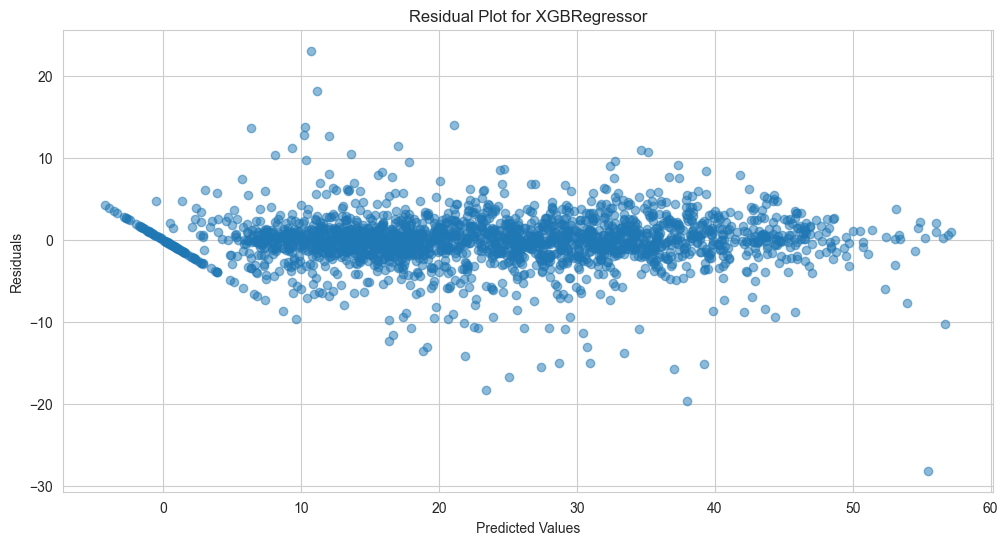

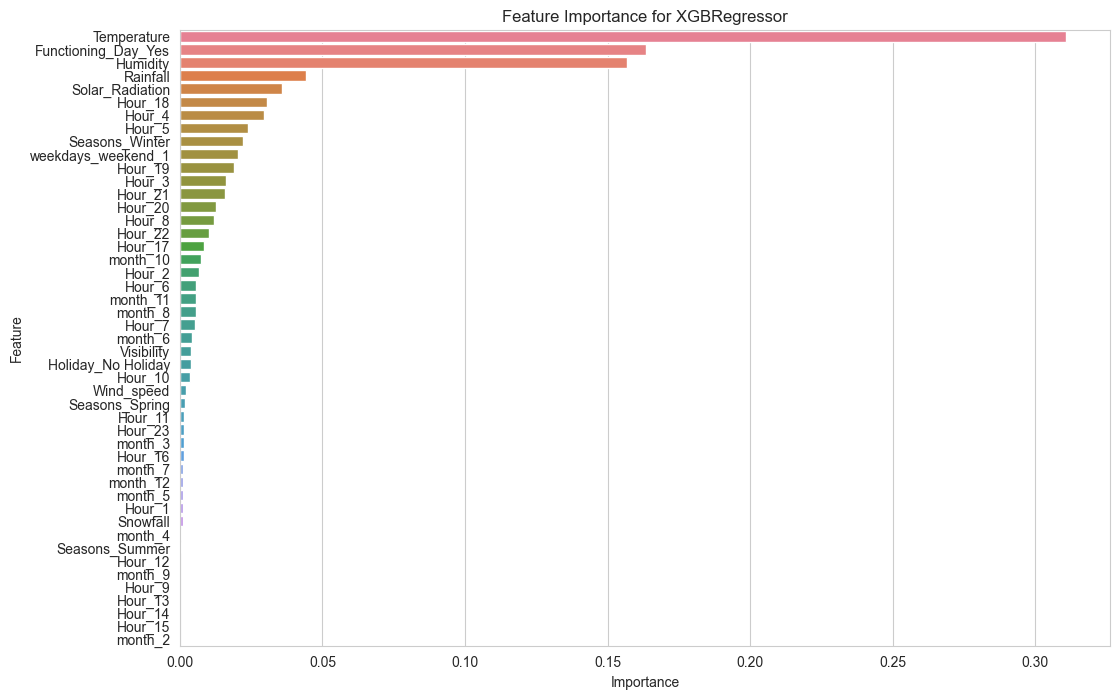

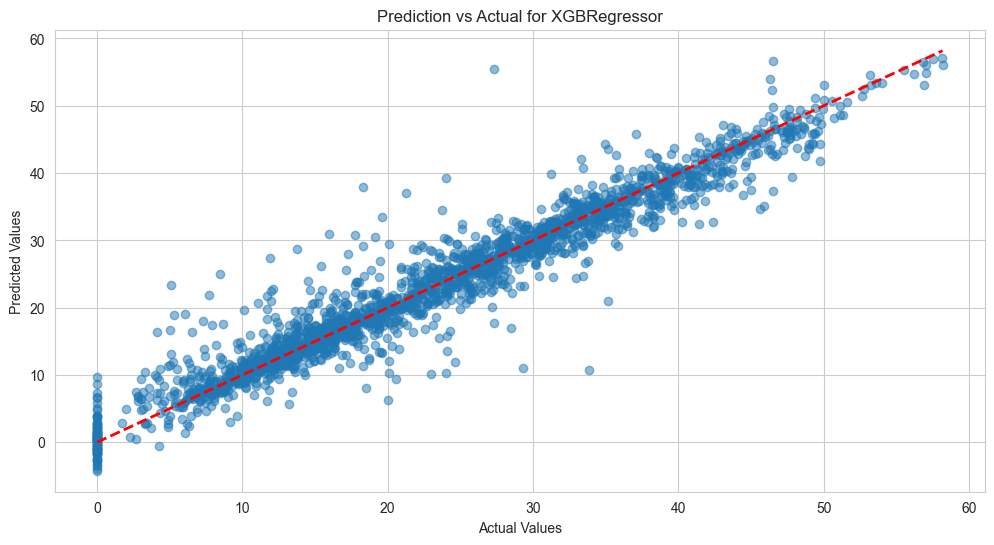

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residual Plot for XGBRegressor
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_test_xgb, y_test - y_pred_test_xgb, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for XGBRegressor')
plt.show()

# Feature Importance for XGBRegressor
importances = gb_optimal_model.feature_importances_
importance_df_xgb = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df_xgb = importance_df_xgb.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df_xgb, palette='husl')
plt.title('Feature Importance for XGBRegressor')
plt.show()

# Prediction vs Actual Plot for XGBRegressor
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_test_xgb, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction vs Actual for XGBRegressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()

# **Conclusion**

### Analysis and Model Evaluation

During our analysis, we undertook the following steps:

1. **Initial Exploratory Data Analysis (EDA)**:
   - **Dependent Variable**: Analyzed the 'Rented Bike Count' and applied necessary transformations.
   - **Categorical Variables**: Examined and removed variables with a majority of one class.
   - **Numerical Variables**: Studied correlations, distributions, and relationships with the dependent variable. Removed features with mostly 0 values.
   - **Encoding**: Applied one-hot encoding to categorical variables.

2. **Machine Learning Algorithms**:
   We employed and evaluated the following 7 machine learning algorithms:
   - **Linear Regression**
   - **Lasso Regression**
   - **Ridge Regression**
   - **Elastic Net Regression**
   - **Decision Tree**
   - **Random Forest**
   - **Gradient Boosting**
   - **XGBoost Regression**

3. **Hyperparameter Tuning**:
   We performed hyperparameter tuning to enhance the performance of our models.

**Evaluation Findings**:
The evaluation of our models resulted in the following key findings:

- **Model Performance**: Improved accuracy and robustness were observed post-tuning.
- **Metrics**: Notable improvements in metrics such as R², MAE, and RMSE were achieved.

These steps and evaluations helped in refining our models and understanding their performance better.


In [168]:
# displaying the results of evaluation metric values for all models

import pandas as pd

# Assuming training_df and test_df are already defined

# Sort training_df and test_df separately by R2_score in descending order
training_sorted = training_df.sort_values(by='R2_score', ascending=False)
test_sorted = test_df.sort_values(by='R2_score', ascending=False)

# Display the sorted DataFrames
print("Training Set Results:")
print(training_sorted)

print("\nTest Set Results:")
print(test_sorted)

#result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
#result

Training Set Results:
                            Model    MAE     MSE   RMSE  R2_score  Adjusted R2
9            XGBoost GridSearchCV  0.382   0.258  0.508     0.998         1.00
5        Random Forest Regression  0.800   1.556  1.247     0.990         0.99
6      Random Forest GridSearchCV  0.824   1.667  1.291     0.989         0.99
8              XGBoost Regression  1.099   2.482  1.575     0.984         0.98
7  Gradient Boosting GridSearchCV  2.178   9.110  3.018     0.941         0.94
0              Linear regression   4.301  32.145  5.670     0.791         0.79
2               Ridge regression   4.301  32.145  5.670     0.791         0.79
3          Elastic Net Regression  4.368  32.814  5.728     0.787         0.78
1               Lasso regression   5.726  53.629  7.323     0.652         0.64
4        Decision Tree Regression  5.460  58.801  7.668     0.618         0.61

Test Set Results:
                                 Model    MAE     MSE   RMSE  R2_score  Adjusted R2
9     

### Model Training and Analysis

We trained a model to predict the number of rented bikes under various weather conditions. The process involved:

1. **Exploratory Data Analysis (EDA)**:
   - **Null Values**: None found in the dataset.
   - **Outliers**: Identified and appropriately modified.
   - **Correlation Analysis**: Used to extract important and relevant features.
   - **Feature Engineering**: Performed to enhance the model.

2. **Model Evaluation**:
   - **XGBoost with GridSearchCV**: Showed promising results with an R² score of 0.94, making it a suitable choice for predicting bike rental counts.

3. **Key Findings**:
   - **Major Driving Factors**: Temperature, Functioning_Day_Yes, Humidity, Rainfall, and Solar Radiation are significant factors influencing bike rental demand.
   - **Demand Patterns**: Bike demand peaks around 8-9 AM and 6-7 PM.
   - **Seasonal Trends**: Higher demand in summer compared to winter.
   - **Weather Conditions**: Greater demand on clear days versus snowy or rainy days.
   - **Temperature Preferences**: Higher demand for bike rentals is observed within the temperature range of 22 to 25°C.


### Important Considerations

Although the current analysis and model have provided valuable insights, it is crucial to acknowledge the following:

- **Time-Dependent Variables**: The dataset is time-dependent, and variables such as temperature, wind speed, and solar radiation may not always remain consistent. This variability can impact the model's performance, leading to potential situations where the model might not perform as expected.
  
- **Evolving Field**: Machine learning is a rapidly evolving field. It is essential to stay up-to-date with the latest developments and techniques to address new challenges and improve model performance.

- **Future Preparedness**: Maintaining a strong understanding of machine learning concepts and being adaptable to new methods will provide a significant advantage in handling unexpected scenarios and advancing in the field.

By considering these aspects, we can better prepare for potential issues and continue to improve our models and approaches.


## Save ML Best Model

In [169]:
dir = r"C:\Users\ramna\OneDrive\Desktop\Bike Demand Analyzer\resources"
model_file_name = "xgboost_grid_r2_0_94_v3.pkl"

# Check if directory exists, create it if not
if not os.path.exists(dir):
    os.makedirs(dir)

# Save the model using pickle
model_file_path = os.path.join(dir, model_file_name)
with open(model_file_path, "wb") as file:
    pickle.dump(xgb_optimal_model, file)

In [170]:
X_test[0,:]

array([-0.17373643,  0.73564541, -0.41047115,  0.92170813, -0.67552504,
       -0.18781326, -0.19904527, -0.20980267, -0.21450357,  4.80270071,
       -0.20501252, -0.20217449, -0.20940699, -0.21294615, -0.20901068,
       -0.21019774, -0.20661954, -0.20940699, -0.20781798, -0.20821618,
       -0.20940699, -0.21098603, -0.21177188, -0.21059219, -0.20053759,
       -0.21333638, -0.20135745, -0.21098603, -0.20901068, -0.20501252,
        1.72191666, -0.57582707, -0.57418668,  0.23069934,  0.17946416,
       -0.28793668, -0.30345966, -0.30136113,  3.28885189, -0.296831  ,
       -0.30345966, -0.30226169, -0.29652734, -0.30465451, -0.30495274,
       -0.30465451,  1.58892357])

In [171]:
X_test[1,:]

array([ 0.74422235,  0.98131174, -0.71451814,  0.92170813, -0.67552504,
       -0.18781326, -0.19904527, -0.20980267,  4.66192707, -0.20821618,
       -0.20501252, -0.20217449, -0.20940699, -0.21294615, -0.20901068,
       -0.21019774, -0.20661954, -0.20940699, -0.20781798, -0.20821618,
       -0.20940699, -0.21098603, -0.21177188, -0.21059219, -0.20053759,
       -0.21333638, -0.20135745, -0.21098603, -0.20901068, -0.20501252,
       -0.5807482 , -0.57582707, -0.57418668,  0.23069934,  0.17946416,
       -0.28793668, -0.30345966, -0.30136113, -0.30405747, -0.296831  ,
       -0.30345966, -0.30226169,  3.37237029, -0.30465451, -0.30495274,
       -0.30465451,  1.58892357])

In [172]:
X_test[2,:]

array([-0.7662371 ,  0.34257927,  2.32595175, -0.6218116 , -0.63866374,
       -0.18781326,  1.1547098 , -0.20980267, -0.21450357, -0.20821618,
       -0.20501252, -0.20217449, -0.20940699, -0.21294615, -0.20901068,
       -0.21019774, -0.20661954, -0.20940699, -0.20781798, -0.20821618,
       -0.20940699, -0.21098603, -0.21177188,  4.7485142 , -0.20053759,
       -0.21333638, -0.20135745, -0.21098603, -0.20901068, -0.20501252,
       -0.5807482 , -0.57582707,  1.74159386,  0.23069934,  0.17946416,
       -0.28793668, -0.30345966, -0.30136113, -0.30405747, -0.296831  ,
       -0.30345966, -0.30226169, -0.29652734, -0.30465451, -0.30495274,
        3.28240667,  1.58892357])

In [173]:
y_test

4059    17.888544
6914    24.083189
233     15.033296
982     12.845233
5967    25.416530
          ...    
475     13.784049
4732    17.804494
4958    31.874755
8244     0.000000
5246    37.815341
Name: Rented_Bike_Count, Length: 2190, dtype: float64

In [174]:
bike_df.head()

Rented_Bike_Count Hour  Temperature  Humidity  Wind_speed  Visibility  Solar_Radiation  Rainfall  Snowfall Seasons     Holiday Functioning_Day month weekdays_weekend
0                254    0         -5.2        37         2.2        2000              0.0       0.0       0.0  Winter  No Holiday             Yes    12                0
1                204    1         -5.5        38         0.8        2000              0.0       0.0       0.0  Winter  No Holiday             Yes    12                0
2                173    2         -6.0        39         1.0        2000              0.0       0.0       0.0  Winter  No Holiday             Yes    12                0
3                107    3         -6.2        40         0.9        2000              0.0       0.0       0.0  Winter  No Holiday             Yes    12                0
4                 78    4         -6.0        36         2.3        2000              0.0       0.0       0.0  Winter  No Holiday             Yes    12                0

## Dump Scaling Parameter

In [175]:
sc_dump_path = r"C:\Users\ramna\OneDrive\Desktop\Bike Demand Analyzer\resources\sc.pkl"

pickle.dump(sc, open(sc_dump_path, "wb"))